In [1]:
# Importing the necessary packages

import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import seaborn                         as      sns
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Read the data.

In [2]:
dfr = pd.read_csv('Rose.csv',parse_dates=True,index_col='YearMonth')
dfr.head().to_csv('rose_head.csv')
dfr.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [3]:
dfs = pd.read_csv('Sparkling.csv',parse_dates=True,index_col='YearMonth')
dfs.head().to_csv('spark_head.csv')
dfs.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [4]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [5]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


# Check for Missing Values

In [6]:
dfs.isna().sum()

Sparkling    0
dtype: int64

In [7]:
dfr.isna().sum()

Rose    2
dtype: int64

# Fill Missing Values by Interpolation

In [8]:
dfr = dfr.interpolate()

In [9]:
dfr.isna().sum()

Rose    0
dtype: int64

# Plot the Time Series

In [10]:
rcParams['figure.figsize'] = 16,9

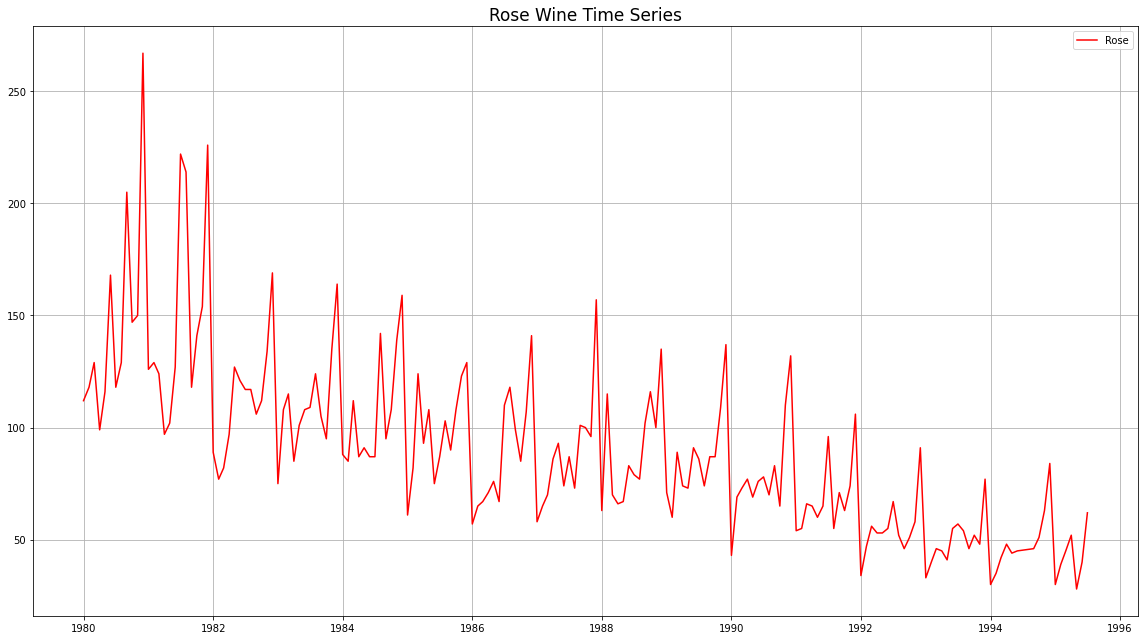

In [11]:
# ROSE TIME SERIES

plt.plot(dfr, color='red');
plt.title('Rose Wine Time Series', fontsize=17);
plt.grid();
plt.legend(['Rose'], loc='best');
plt.tight_layout()
plt.savefig('rose_ts.jpg', bbox_inches='tight');

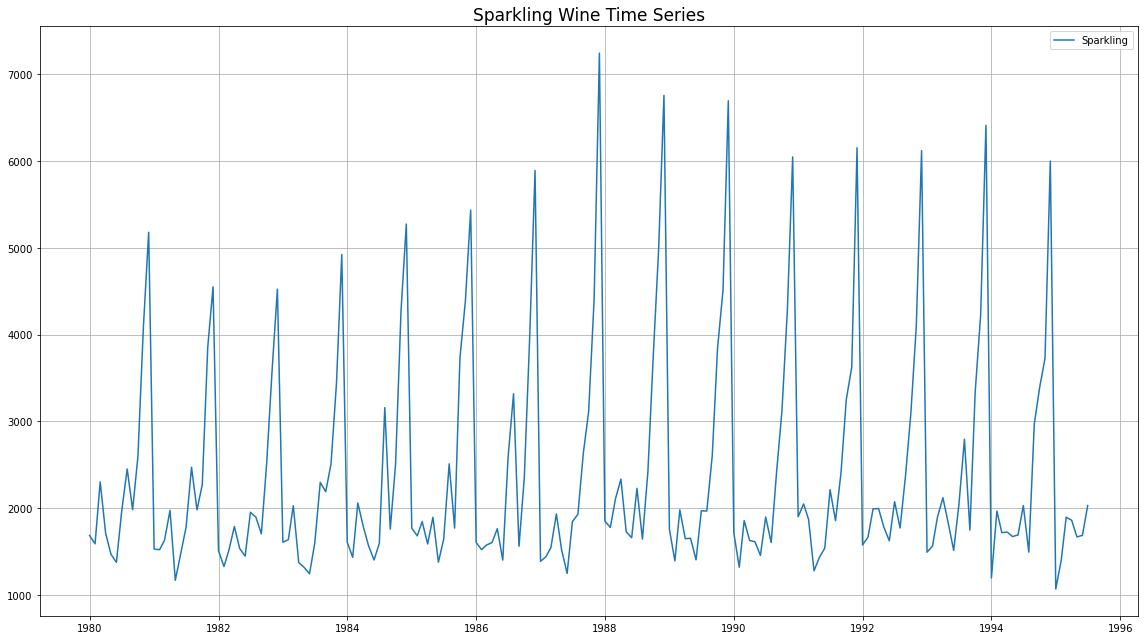

In [12]:
# SPARKLING TIME SERIES

plt.plot(dfs);
plt.title('Sparkling Wine Time Series', fontsize=17);
plt.grid();
plt.legend(['Sparkling']);
plt.tight_layout()
plt.savefig('spark_ts.jpg', bbox_inches='tight');

# Check the basic measures of descriptive statistics of the Time Series

In [13]:
round(dfr.describe().T,3).to_csv('rose_describe.csv')
round(dfr.describe().T,3)

count    mean     std   min   25%   50%    75%    max
Rose  187.0  89.914  39.238  28.0  62.5  85.0  111.0  267.0

In [14]:
round(dfs.describe().T,3).to_csv('spark_describe.csv')
round(dfs.describe().T,3)

count      mean       std     min     25%     50%     75%     max
Sparkling  187.0  2402.417  1295.112  1070.0  1605.0  1874.0  2549.0  7242.0

# Plot Box-plot Monthwise

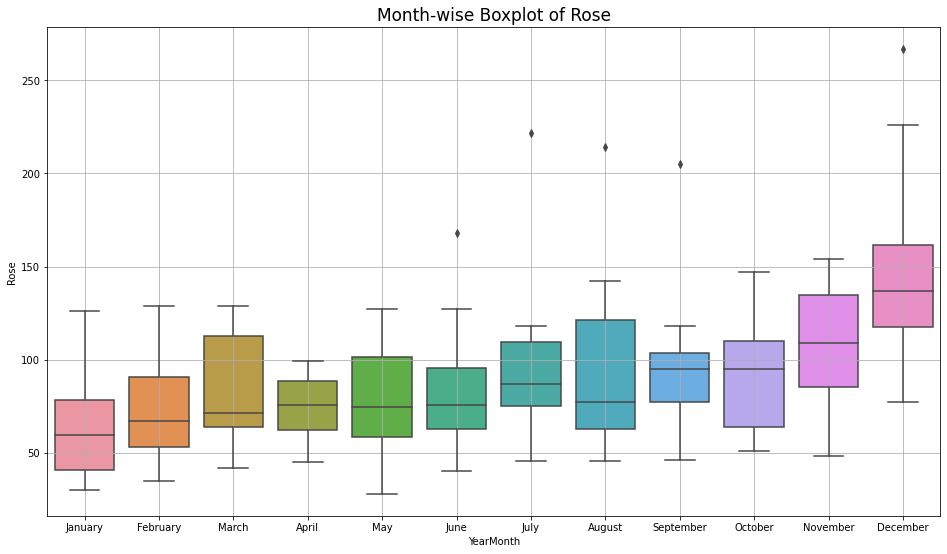

In [15]:
sns.boxplot(x = dfr.index.month_name(), y = dfr['Rose']);
plt.grid();
plt.title('Month-wise Boxplot of Rose', fontsize=17);
plt.savefig('rose_monthwise_box.jpg', bbox_inches='tight');

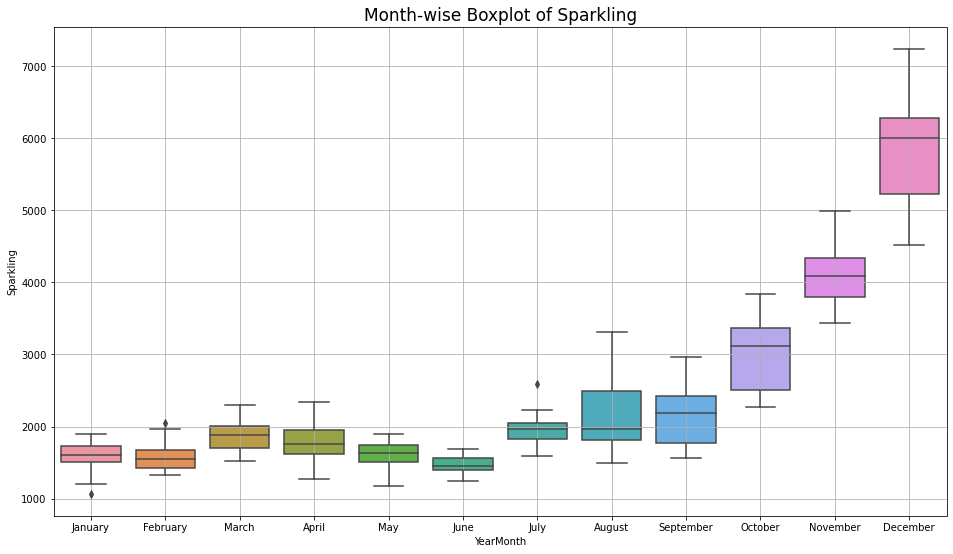

In [16]:
sns.boxplot(x = dfs.index.month_name(), y = dfs['Sparkling']);
plt.grid();
plt.title('Month-wise Boxplot of Sparkling', fontsize=17);
plt.savefig('spark_monthwise_box.jpg', bbox_inches='tight');

# Decompose the Time Series and plot the different components.

In [17]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

# Additive Decomposition of Rose

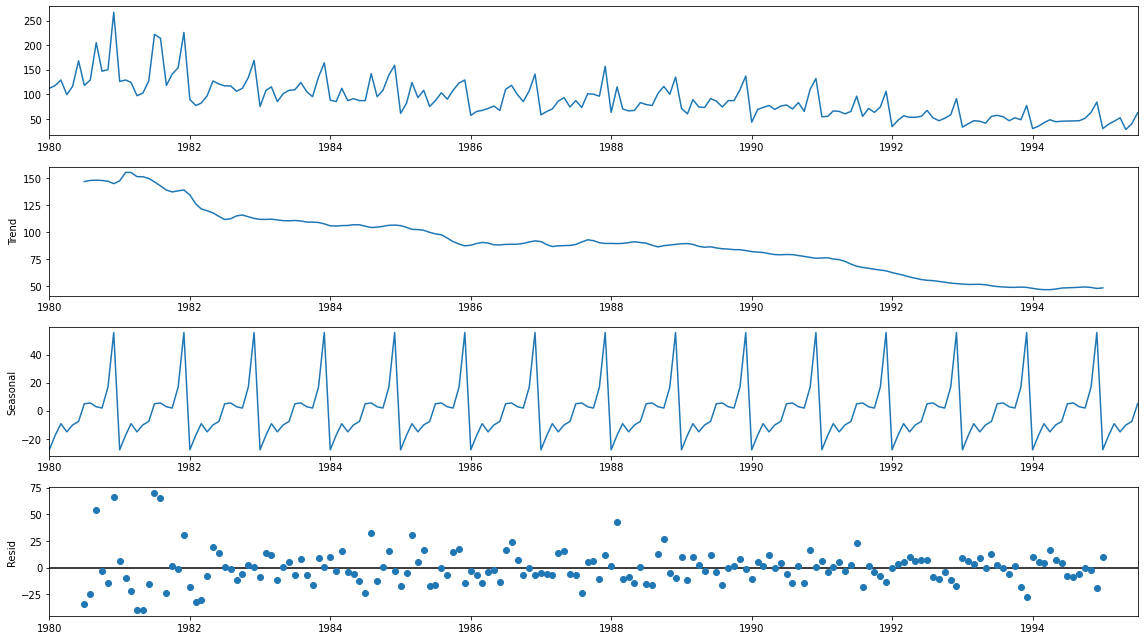

In [18]:
decompositionr = seasonal_decompose(dfr,model='additive')

decompositionr.plot()
plt.savefig('decomposer.jpg', bbox_inches='tight');

In [19]:
trend = decompositionr.trend
seasonality = decompositionr.seasonal
residual = decompositionr.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

trend.head(12).to_csv('rose_trend.csv')
seasonality.head(12).to_csv('rose_season.csv')
residual.head(12).to_csv('rose_resid.csv')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -27.908647
1980-02-01   -17.435632
1980-03-01    -9.285830
1980-04-01   -15.098330
1980-05-01   -10.196544
1980-06-01    -7.678687
1980-07-01     4.896908
1980-08-01     5.499686
1980-09-01     2.774686
1980-10-01     1.871908
1980-11-01    16.846908
1980-12-01    55.713575
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -33.980241
1980-08-01   -24.624686
1980-09-01    53.850314
1980-10-01    -2.955241
1980-11-01   -14.263575
1980-12-01    66.16142

<AxesSubplot:xlabel='YearMonth'>

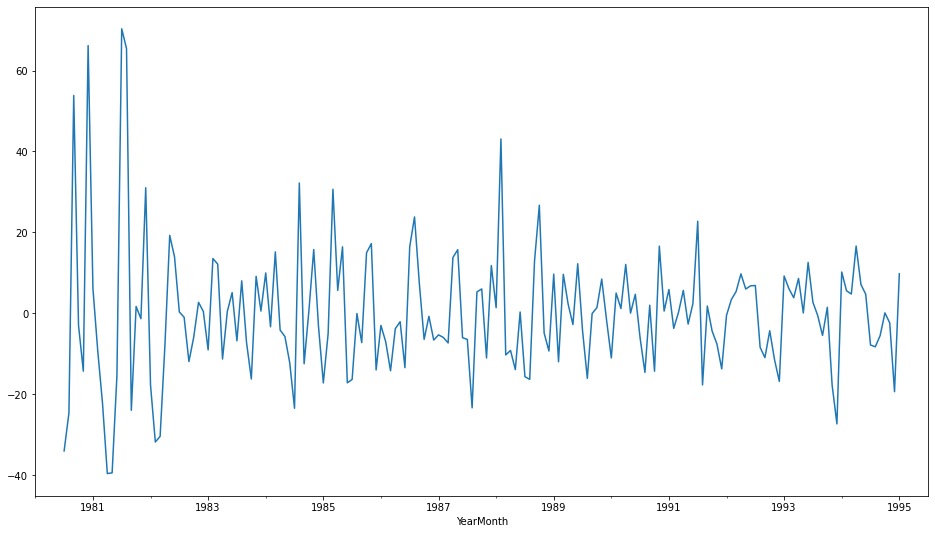

In [20]:
residual.plot()

# Additive Decomposition of Sparkling

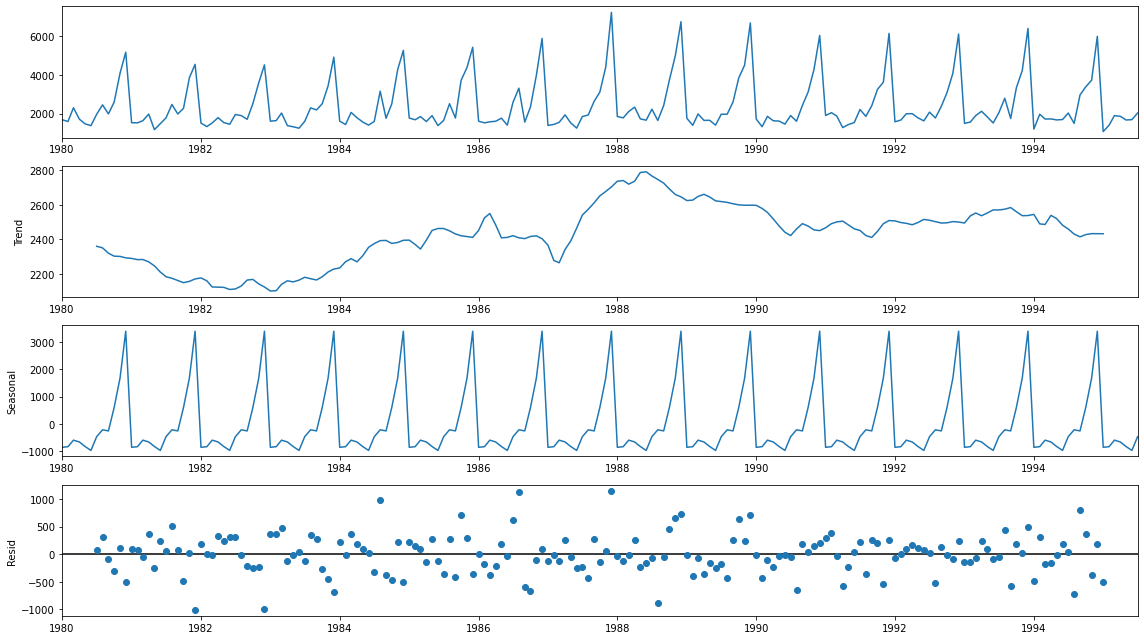

In [21]:
decompositions = seasonal_decompose(dfs,model='additive')
decompositions.plot();
plt.savefig('decomposes.jpg', bbox_inches='tight');

In [22]:
trend = decompositions.trend
seasonality = decompositions.seasonal
residual = decompositions.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

trend.head(12).to_csv('spark_trend.csv')
seasonality.head(12).to_csv('spark_season.csv')
residual.head(12).to_csv('spark_resid.csv')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -854.260599
1980-02-01    -830.350678
1980-03-01    -592.356630
1980-04-01    -658.490559
1980-05-01    -824.416154
1980-06-01    -967.434011
1980-07-01    -465.502265
1980-08-01    -214.332821
1980-09-01    -254.677265
1980-10-01     599.769957
1980-11-01    1675.067179
1980-12-01    3386.983846
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.864401
1980-10-01   -307.353290


In [23]:
cvsa = residual.std()/residual.mean()
cvsa

-296.08335294142995

# Multiplicative Decomposition of Rose

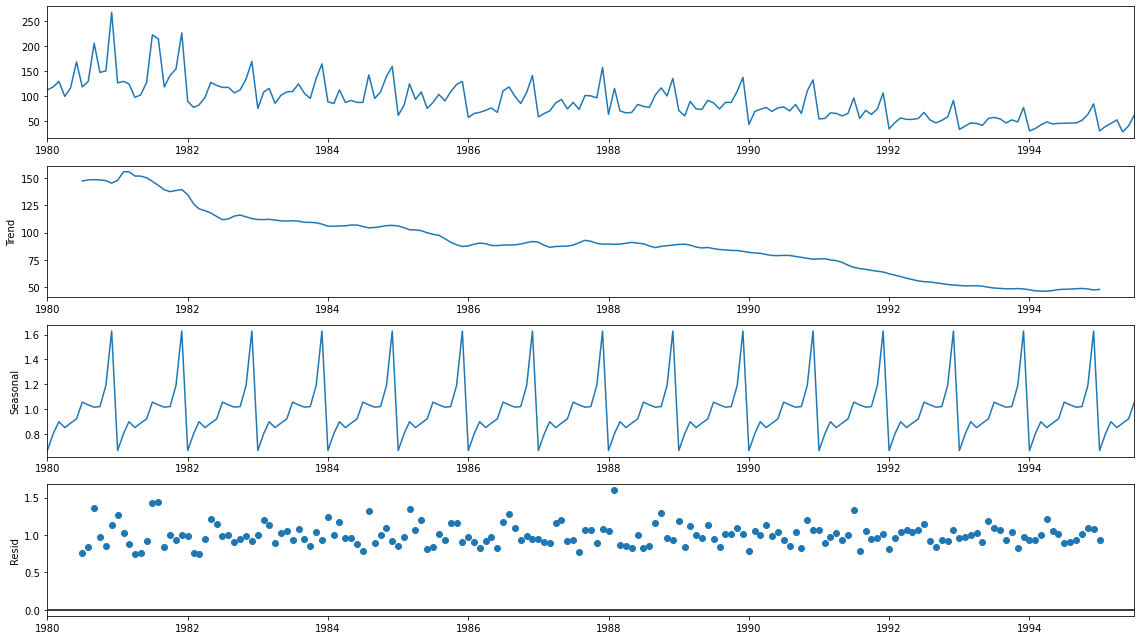

In [24]:
decompositionmr = seasonal_decompose(dfr,model='multiplicative')
decompositionmr.plot();
plt.savefig('decomposemr.jpg', bbox_inches='tight');

In [25]:
trend = decompositionmr.trend
seasonality = decompositionmr.seasonal
residual = decompositionmr.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

trend.head(12).to_csv('rose_trend_m.csv')
seasonality.head(12).to_csv('rose_season_m.csv')
residual.head(12).to_csv('rose_resid_m.csv')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.670111
1980-02-01    0.806163
1980-03-01    0.901164
1980-04-01    0.854024
1980-05-01    0.889415
1980-06-01    0.923985
1980-07-01    1.058038
1980-08-01    1.035881
1980-09-01    1.017648
1980-10-01    1.022573
1980-11-01    1.192349
1980-12-01    1.628646
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.758258
1980-08-01    0.840720
1980-09-01    1.357674
1980-10-01    0.970771
1980-11-01    0.853378
1980-12-01    1.129646
Name: resid, dtype: fl

<AxesSubplot:xlabel='YearMonth'>

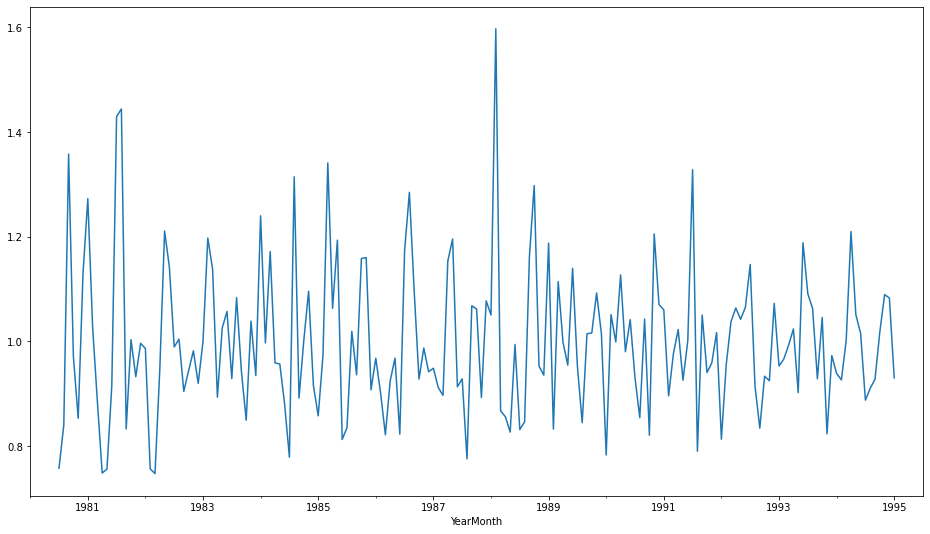

In [26]:
residual.plot()

# Multiplicative Decomposition of Sparkling

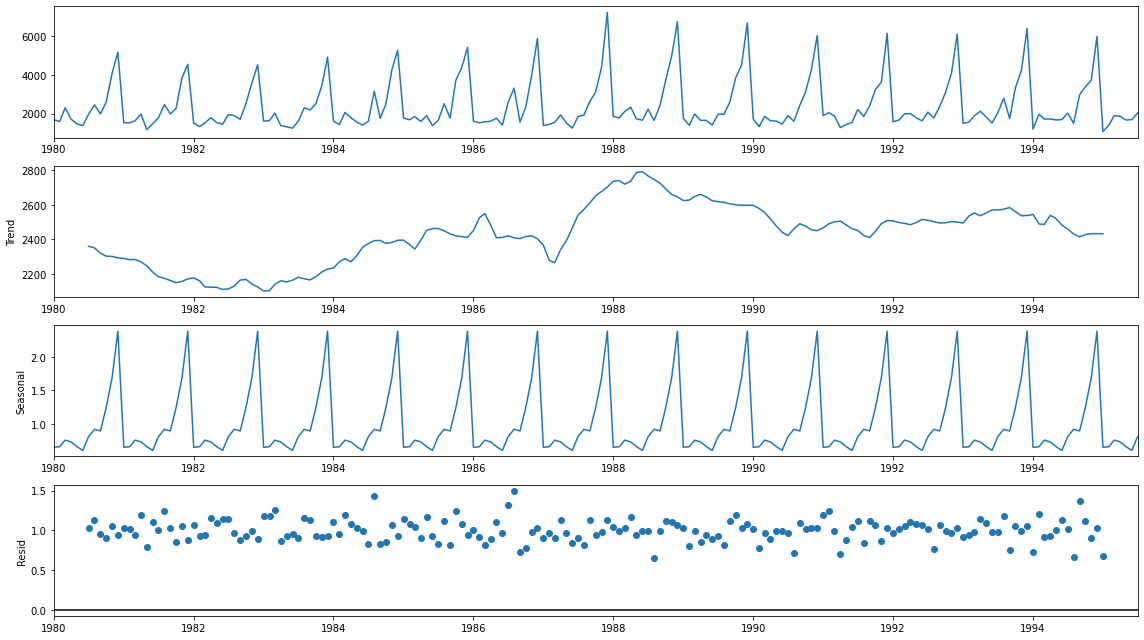

In [27]:
decompositionms = seasonal_decompose(dfs,model='multiplicative')
decompositionms.plot();
plt.savefig('decomposems.jpg', bbox_inches='tight');

In [28]:
trend = decompositionms.trend
seasonality = decompositionms.seasonal
residual = decompositionms.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

trend.head(12).to_csv('spark_trend_m.csv')
seasonality.head(12).to_csv('spark_season_m.csv')
residual.head(12).to_csv('spark_resid_m.csv')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
1980-11-01    1.050423
1980-12-01    0.946770
Name: resi

In [29]:
cvsm = residual.std()/residual.mean()
cvsm

0.13886244212828963

# Split the data into train and test and plot the training and test data. [Test Data should start from 1991]

In [30]:
# ROSE DATA SPLIT

rtrain = dfr[dfr.index<'1991'] 
rtest = dfr[dfr.index>='1991']

In [31]:
# SPARKLING DATA SPLIT

strain = dfs[dfs.index<'1991'] 
stest = dfs[dfs.index>='1991']

In [32]:
print(rtrain.shape)
print(rtest.shape)

(132, 1)
(55, 1)


In [33]:
print(strain.shape)
print(stest.shape)

(132, 1)
(55, 1)


In [34]:
from IPython.display import display

In [35]:
# ROSE DATA TRAIN AND TEST

print('First few rows of Rose Training Data')
display(rtrain.head())
print('Last few rows of Rose Training Data')
display(rtrain.tail())
print('First few rows of Rose Test Data')
display(rtest.head())
print('Last few rows of Rose Test Data')
display(rtest.tail())

rtrain.to_csv('rose_train.csv')
rtest.to_csv('rose_test.csv')

First few rows of Rose Training Data


Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

Last few rows of Rose Training Data


Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0

First few rows of Rose Test Data


Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0

Last few rows of Rose Test Data


Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

In [36]:
# SPARKLING DATA TRAIN AND TEST

print('First few rows of Sparkling Training Data')
display(strain.head())
print('Last few rows of Sparkling Training Data')
display(strain.tail())
print('First few rows of Sparkling Test Data')
display(stest.head())
print('Last few rows of Sparkling Test Data')
display(stest.tail())

strain.to_csv('spark_train.csv')
stest.to_csv('spark_test.csv')

First few rows of Sparkling Training Data


Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

Last few rows of Sparkling Training Data


Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

First few rows of Sparkling Test Data


Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432

Last few rows of Sparkling Test Data


Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

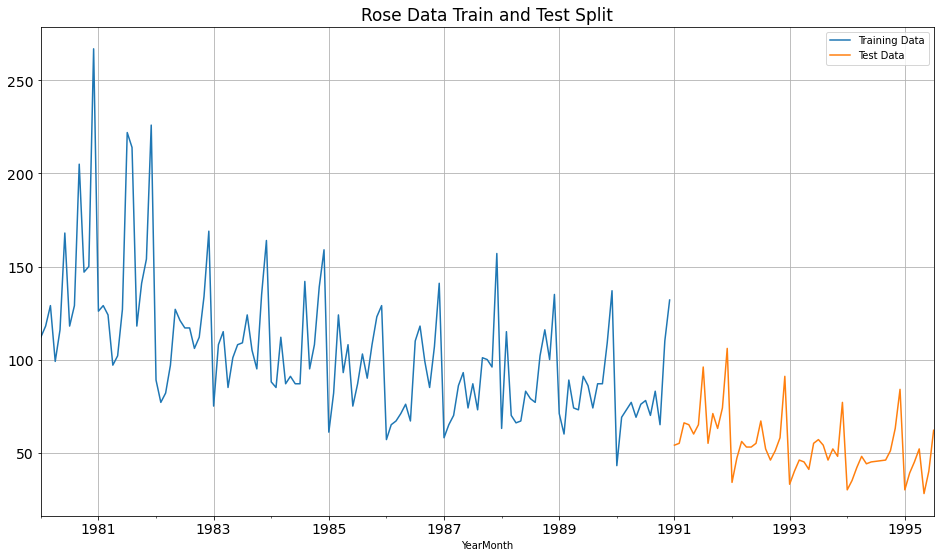

In [37]:
# ROSE DATA TRAIN TEST SPLIT TIME SERIES

rtrain['Rose'].plot(fontsize=14)
rtest['Rose'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.title('Rose Data Train and Test Split', fontsize=17)
plt.savefig('rose_split_ts.jpg', bbox_inches='tight')
plt.show();

<AxesSubplot:xlabel='YearMonth'>

<AxesSubplot:xlabel='YearMonth'>

Text(0.5, 1.0, 'Sparkling Data Train and Test Split')

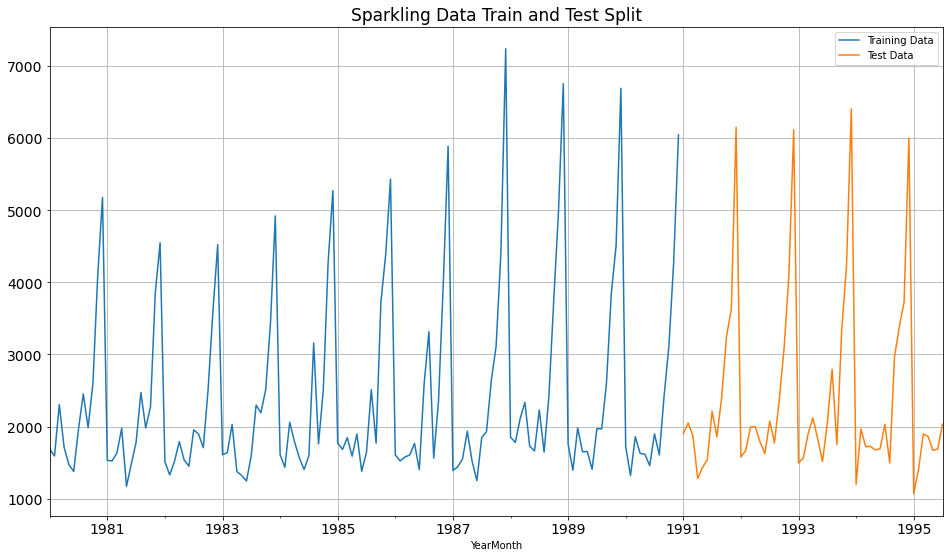

In [38]:
# SPARKLING DATA TRAIN TEST SPLIT TIME SERIES

strain['Sparkling'].plot(fontsize=14)
stest['Sparkling'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.title('Sparkling Data Train and Test Split', fontsize=17)
plt.savefig('spark_split_ts.jpg', bbox_inches='tight')
plt.show()

# Building different models and comparing the accuracy metrics.

# Model 1: Linear Regression on Rose

In [39]:
rtrain.shape
rtest.shape

(132, 1)

(55, 1)

In [40]:
train_time = [i+1 for i in range(len(rtrain))]
test_time = [i+133 for i in range(len(rtest))]
print('Training Time Instance :','\n',train_time)
print('Test Time Instance :','\n',test_time)

Training Time Instance : 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time Instance : 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [41]:
LinearRegression_train = rtrain.copy()
LinearRegression_test = rtest.copy()

In [42]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5

Last few rows of Training Data


Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132

First few rows of Test Data


Rose  time
YearMonth             
1991-01-01  54.0   133
1991-02-01  55.0   134
1991-03-01  66.0   135
1991-04-01  65.0   136
1991-05-01  60.0   137

Last few rows of Test Data


Rose  time
YearMonth             
1995-03-01  45.0   183
1995-04-01  52.0   184
1995-05-01  28.0   185
1995-06-01  40.0   186
1995-07-01  62.0   187

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lr = LinearRegression()

In [45]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'])

LinearRegression()

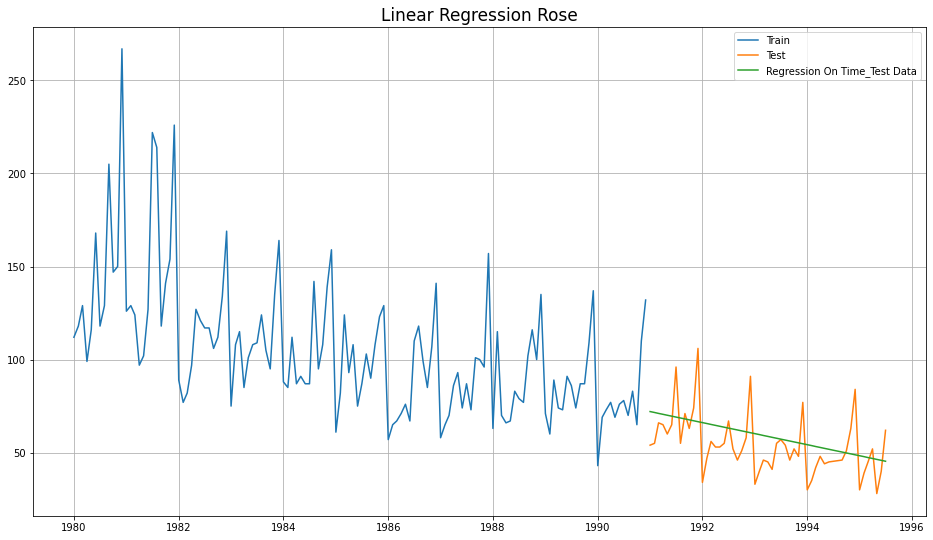

In [46]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot(rtrain['Rose'], label='Train')
plt.plot(rtest['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.title('Linear Regression Rose', fontsize=17)
plt.legend(loc='best')
plt.grid();
plt.savefig('lr_rose.jpg', bbox_inches='tight');

In [47]:
from sklearn import metrics

# Model Evaluation

In [48]:
rmse_model11_test = metrics.mean_squared_error(rtest['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model11_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.269 


In [49]:
resultsDf = pd.DataFrame({'Test RMSE Rose': [rmse_model11_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE Rose
RegressionOnTime       15.268955

# Model 1: Linear Regression Sparkling

In [50]:
train_time = [i+1 for i in range(len(strain))]
test_time = [i+133 for i in range(len(stest))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [51]:
LinearRegression_train = strain.copy()
LinearRegression_test = stest.copy()

In [52]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5

Last few rows of Training Data


Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132

First few rows of Test Data


Sparkling  time
YearMonth                  
1991-01-01       1902   133
1991-02-01       2049   134
1991-03-01       1874   135
1991-04-01       1279   136
1991-05-01       1432   137

Last few rows of Test Data


Sparkling  time
YearMonth                  
1995-03-01       1897   183
1995-04-01       1862   184
1995-05-01       1670   185
1995-06-01       1688   186
1995-07-01       2031   187

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
lr = LinearRegression()

In [55]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])

LinearRegression()

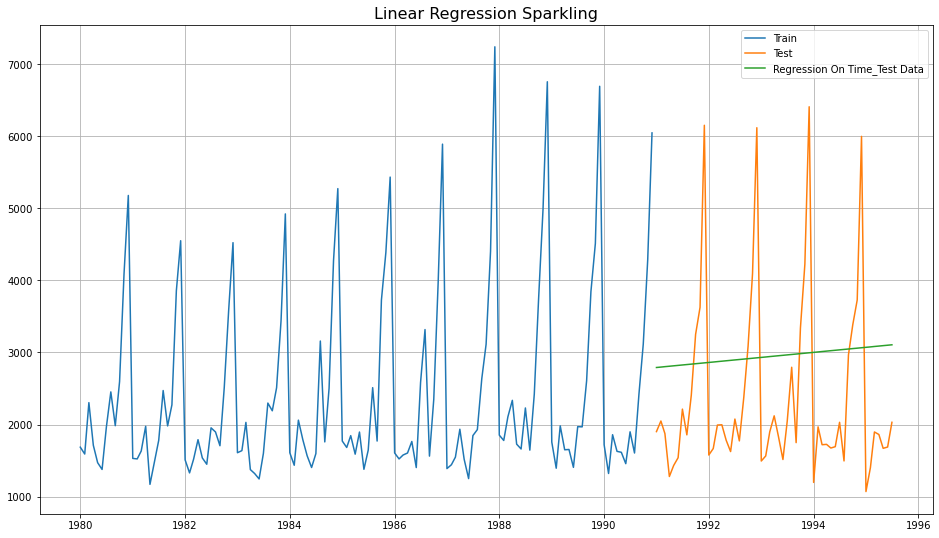

In [56]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot(strain['Sparkling'], label='Train')
plt.plot(stest['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.title('Linear Regression Sparkling', fontsize=16)
plt.grid();
plt.savefig('spark_lr.jpg', bbox_inches='tight');

In [57]:
from sklearn import metrics

# Model Evaluation

In [59]:
rmse_model12_test = metrics.mean_squared_error(stest['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model12_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135 


In [60]:
resultsDf_12 = pd.DataFrame({'Test RMSE Sparkling': [rmse_model12_test]},index=['RegressionOnTime'])

resultsDf = pd.merge(resultsDf, resultsDf_12, left_index=True, right_index=True)
resultsDf.to_csv('results_lr.csv')
resultsDf

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime       15.268955          1389.135175

# Model 2: Naive Approach Rose

In [61]:
NaiveModel_train = rtrain.copy()
NaiveModel_test = rtest.copy()

In [62]:
rtrain.tail()

Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0

In [63]:
NaiveModel_test['naive'] = np.asarray(rtrain['Rose'])[len(np.asarray(rtrain['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

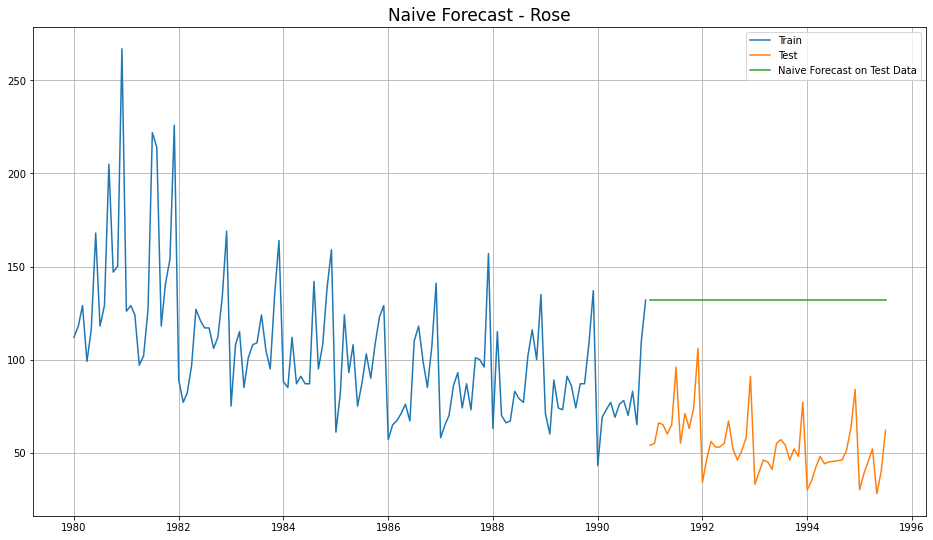

In [64]:
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(rtest['Rose'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast - Rose", fontsize=17)
plt.grid();
plt.savefig('rose_naive.jpg', bbox_inches='tight');

# Model Evaluation

In [65]:
rmse_model21_test = metrics.mean_squared_error(rtest['Rose'],NaiveModel_test['naive'],squared=False)
print("For NaiveModel forecast on the Test Data,  RMSE is %3.3f" %(rmse_model21_test))

For NaiveModel forecast on the Test Data,  RMSE is 79.719


In [66]:
resultsDf

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime       15.268955          1389.135175

In [67]:
resultsDf_21 = pd.DataFrame({'Test RMSE Rose': [rmse_model21_test]},index=['NaiveModel'])

# resultsDf = pd.concat([resultsDf, resultsDf_3], ignore_index=True)
# resultsDf

# resultsDf_3 = pd.DataFrame({'Test RMSE Rose': [rmse_model2_test]},index=['NaiveModel'])

# resultsDf.join(resultsDf_3, how='inner')

# resultsDf = pd.merge(resultsDf, resultsDf_21, left_index=True, right_index=True)
# resultsDf

# Model 2: Naive Approach Sparkling

In [68]:
NaiveModel_train = strain.copy()
NaiveModel_test = stest.copy()

In [69]:
strain.tail()

Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

In [70]:
NaiveModel_test['naive'] = np.asarray(strain['Sparkling'])[len(np.asarray(strain['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

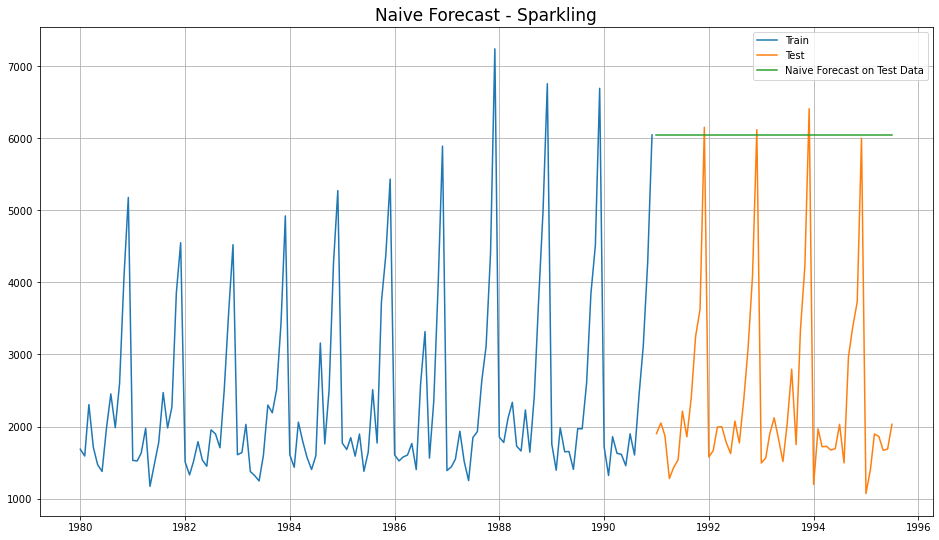

In [71]:
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(stest['Sparkling'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast - Sparkling", fontsize=17)
plt.grid();
plt.savefig('Sparkling_naive.jpg', bbox_inches='tight');

# Model Evaluation

In [72]:
rmse_model22_test = metrics.mean_squared_error(stest['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For NaiveModel forecast on the Test Data,  RMSE is %3.3f" %(rmse_model22_test))

For NaiveModel forecast on the Test Data,  RMSE is 3864.279


In [73]:
resultsDf

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime       15.268955          1389.135175

In [74]:
resultsDf_21

Test RMSE Rose
NaiveModel       79.718773

In [75]:
resultsDf_22 = pd.DataFrame({'Test RMSE Sparkling': [rmse_model22_test]},index=['NaiveModel'])

# resultsDf = pd.concat([resultsDf, resultsDf_3], ignore_index=True)
# resultsDf

# resultsDf_3 = pd.DataFrame({'Test RMSE Rose': [rmse_model2_test]},index=['NaiveModel'])

# resultsDf.join(resultsDf_3, how='inner')

resultsDf1 = resultsDf_21.join(resultsDf_22, how='outer')
resultsDf1

Test RMSE Rose  Test RMSE Sparkling
NaiveModel       79.718773          3864.279352

In [76]:
resultsDf3 = pd.concat([resultsDf, resultsDf1], axis=0)
resultsDf3

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime       15.268955          1389.135175
NaiveModel             79.718773          3864.279352

In [77]:
resultsDf = resultsDf3.copy()
resultsDf.to_csv('results_nb.csv')
resultsDf

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime       15.268955          1389.135175
NaiveModel             79.718773          3864.279352

# Model 3: Simple Average Rose

In [78]:
SimpleAverage_train = rtrain.copy()
SimpleAverage_test = rtest.copy()

In [79]:
SimpleAverage_test['mean_forecast'] = rtrain['Rose'].mean()
SimpleAverage_test.head()

Rose  mean_forecast
YearMonth                      
1991-01-01  54.0     104.939394
1991-02-01  55.0     104.939394
1991-03-01  66.0     104.939394
1991-04-01  65.0     104.939394
1991-05-01  60.0     104.939394

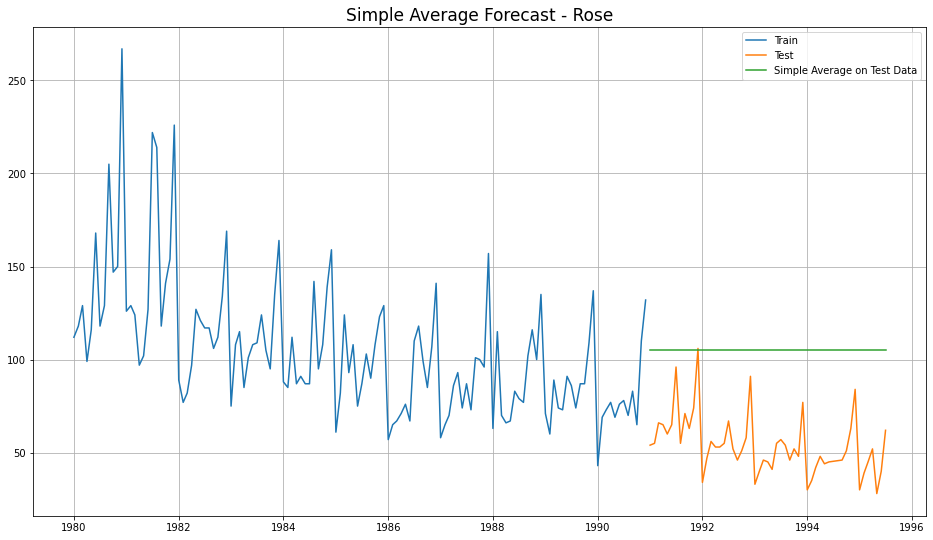

In [80]:
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast - Rose", fontsize=17)
plt.grid();
plt.savefig('rose_simpleaverage.jpg', bbox_inches='tight');

# Model Evaluation

In [81]:
rmse_model31_test = metrics.mean_squared_error(rtest['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on Rose Test Data,  RMSE is %3.3f" %(rmse_model31_test))

For Simple Average forecast on Rose Test Data,  RMSE is 53.461


In [82]:
resultsDf_31 = pd.DataFrame({'Test RMSE Rose': [rmse_model31_test]}
                           ,index=['SimpleAverageModel'])
resultsDf_31
# resultsDf = pd.concat([resultsDf, resultsDf_3])
# resultsDf

Test RMSE Rose
SimpleAverageModel        53.46057

# Model 3: Simple Average Sparkling

In [83]:
SimpleAverage_train = strain.copy()
SimpleAverage_test = stest.copy()

In [84]:
SimpleAverage_test['mean_forecast'] = strain['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
YearMonth                           
1991-01-01       1902    2403.780303
1991-02-01       2049    2403.780303
1991-03-01       1874    2403.780303
1991-04-01       1279    2403.780303
1991-05-01       1432    2403.780303

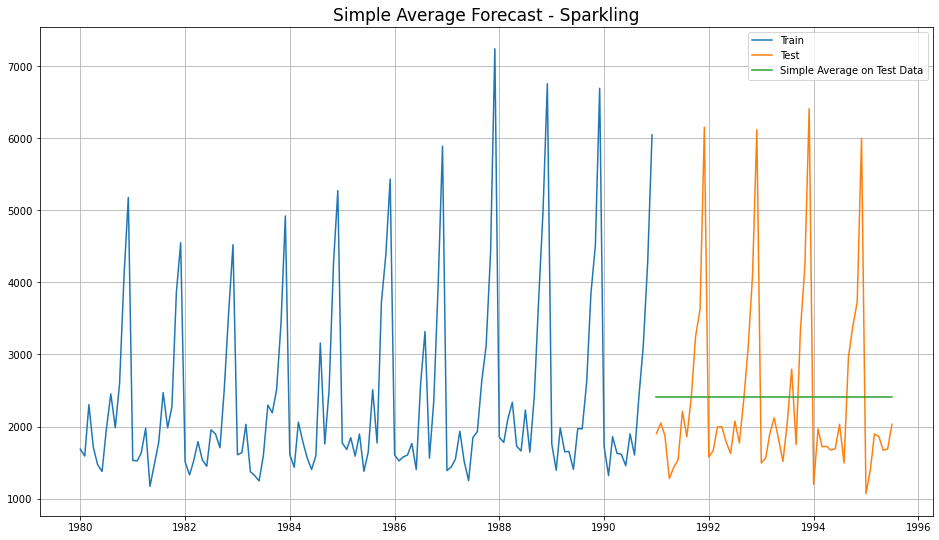

In [85]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast - Sparkling", fontsize=17)
plt.grid();
plt.savefig('Sparkling_simpleaverage.jpg', bbox_inches='tight');

# Model Evaluation

In [86]:
rmse_model32_test = metrics.mean_squared_error(stest['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on Sparkling Test Data,  RMSE is %3.3f" %(rmse_model32_test))

For Simple Average forecast on Sparkling Test Data,  RMSE is 1275.082


In [87]:
resultsDf_32 = pd.DataFrame({'Test RMSE Sparkling': [rmse_model32_test]}
                           ,index=['SimpleAverageModel'])
resultsDf_32
# resultsDf = pd.concat([resultsDf, resultsDf_3])
# resultsDf

Test RMSE Sparkling
SimpleAverageModel          1275.081804

In [88]:
resultsDf4 = resultsDf_31.join(resultsDf_32, how='outer')
resultsDf4

Test RMSE Rose  Test RMSE Sparkling
SimpleAverageModel        53.46057          1275.081804

In [89]:
resultsDf5 = pd.concat([resultsDf, resultsDf4], axis=0)
resultsDf5

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime         15.268955          1389.135175
NaiveModel               79.718773          3864.279352
SimpleAverageModel       53.460570          1275.081804

In [90]:
resultsDf = resultsDf5.copy()
resultsDf.to_csv('results_sa.csv')
resultsDf

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime         15.268955          1389.135175
NaiveModel               79.718773          3864.279352
SimpleAverageModel       53.460570          1275.081804

# Model 4: Moving Average(MA) - Rose

In [91]:
MovingAverage = dfr.copy()
MovingAverage.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [92]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                        
1980-01-01  112.0         NaN         NaN         NaN         NaN
1980-02-01  118.0       115.0         NaN         NaN         NaN
1980-03-01  129.0       123.5         NaN         NaN         NaN
1980-04-01   99.0       114.0       114.5         NaN         NaN
1980-05-01  116.0       107.5       115.5         NaN         NaN

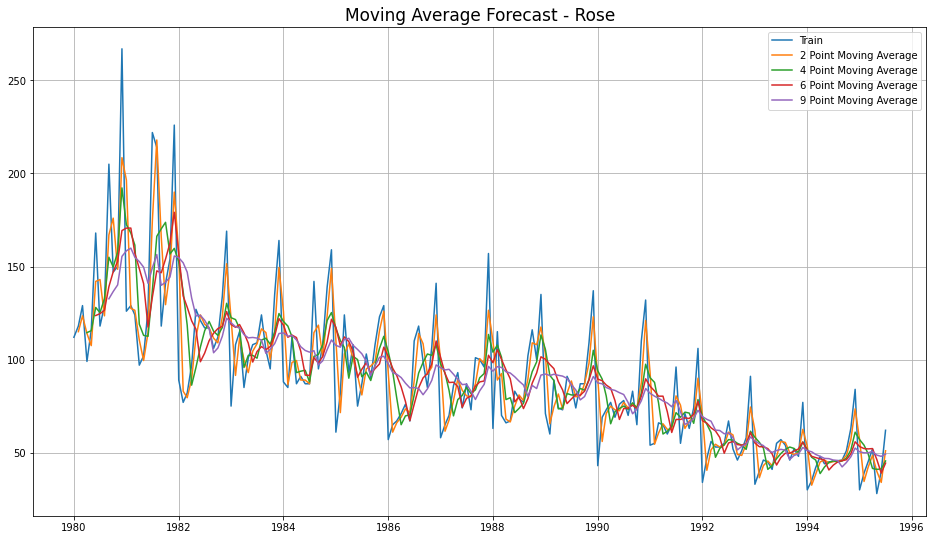

In [93]:
## Plotting on the whole data

plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average Forecast - Rose', fontsize=17)
plt.savefig('rose_ma.jpg', bbox_inches='tight');

In [94]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

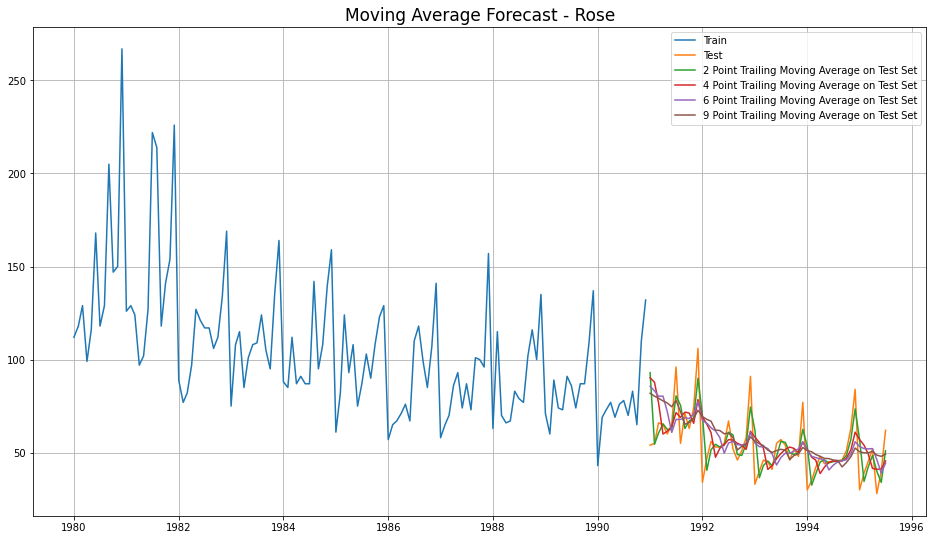

In [95]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,9))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average Forecast - Rose', fontsize=17);
plt.savefig('rose_ma_test.jpg', bbox_inches='tight');

# Model Evaluation

In [96]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(rtest['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(rtest['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(rtest['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(rtest['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on Rose Training Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on Rose Training Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on Rose Training Data,  RMSE is 14.566
For 9 point Moving Average Model forecast on Rose Training Data,  RMSE is 14.728


In [97]:
resultsDf_41 = pd.DataFrame({'Test RMSE Rose': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf_41.to_csv('rose_ma.csv')
resultsDf_41

Test RMSE Rose
2pointTrailingMovingAverage       11.529278
4pointTrailingMovingAverage       14.451403
6pointTrailingMovingAverage       14.566327
9pointTrailingMovingAverage       14.727630

# Method 4: Moving Average(MA) - Sparkling

In [98]:
MovingAverage = dfs.copy()
MovingAverage.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [99]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                            
1980-01-01       1686         NaN         NaN         NaN         NaN
1980-02-01       1591      1638.5         NaN         NaN         NaN
1980-03-01       2304      1947.5         NaN         NaN         NaN
1980-04-01       1712      2008.0     1823.25         NaN         NaN
1980-05-01       1471      1591.5     1769.50         NaN         NaN

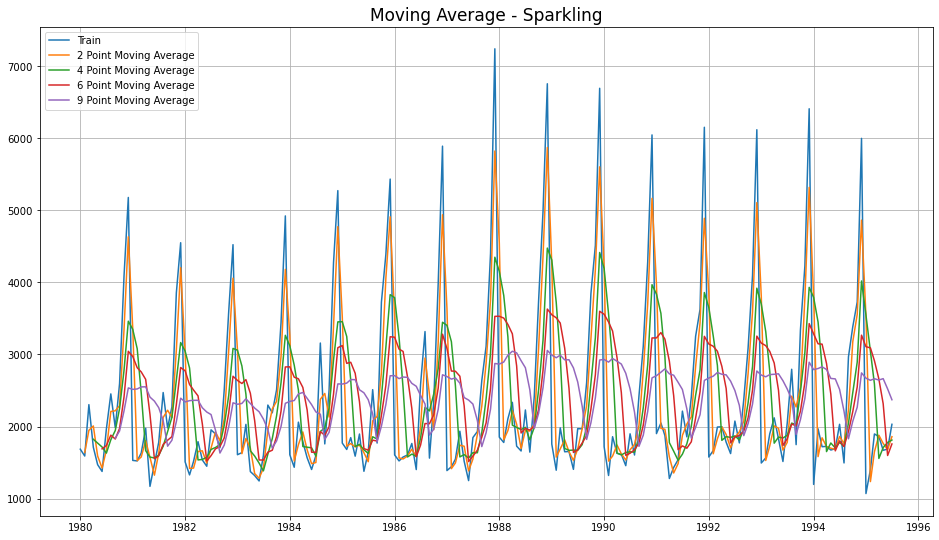

In [100]:
## Plotting on the whole data

plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average - Sparkling', fontsize=17)
plt.savefig('spark_ma.jpg', bbox_inches='tight');

In [101]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

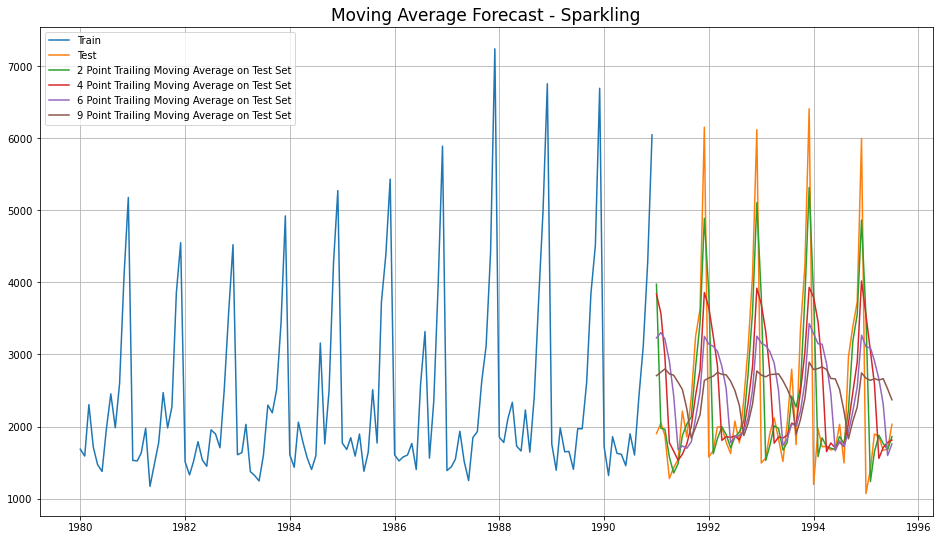

In [102]:
## Plotting on Test data

plt.figure(figsize=(16,9))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average Forecast - Sparkling', fontsize=17)
plt.savefig('spark_ma_test.jpg', bbox_inches='tight');

# Model Evaluation

In [103]:
# Done only on the test data.
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(stest['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on Sparkling Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(stest['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on Sparkling Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(stest['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on Sparkling Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(stest['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on Sparkling Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on Sparkling Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on Sparkling Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on Sparkling Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on Sparkling Training Data,  RMSE is 1346.278


In [104]:
resultsDf_42 = pd.DataFrame({'Test RMSE Sparkling': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf_42.to_csv('spark_ma.csv')
resultsDf_42

Test RMSE Sparkling
2pointTrailingMovingAverage           813.400684
4pointTrailingMovingAverage          1156.589694
6pointTrailingMovingAverage          1283.927428
9pointTrailingMovingAverage          1346.278315

In [105]:
resultsDf6 = resultsDf_41.join(resultsDf_42, how='outer')
resultsDf6

Test RMSE Rose  Test RMSE Sparkling
2pointTrailingMovingAverage       11.529278           813.400684
4pointTrailingMovingAverage       14.451403          1156.589694
6pointTrailingMovingAverage       14.566327          1283.927428
9pointTrailingMovingAverage       14.727630          1346.278315

In [106]:
resultsDf7 = pd.concat([resultsDf, resultsDf6], axis=0)
resultsDf7

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime                  15.268955          1389.135175
NaiveModel                        79.718773          3864.279352
SimpleAverageModel                53.460570          1275.081804
2pointTrailingMovingAverage       11.529278           813.400684
4pointTrailingMovingAverage       14.451403          1156.589694
6pointTrailingMovingAverage       14.566327          1283.927428
9pointTrailingMovingAverage       14.727630          1346.278315

In [107]:
resultsDf = resultsDf7.copy()
resultsDf.to_csv('results_ma.csv')
resultsDf

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime                  15.268955          1389.135175
NaiveModel                        79.718773          3864.279352
SimpleAverageModel                53.460570          1275.081804
2pointTrailingMovingAverage       11.529278           813.400684
4pointTrailingMovingAverage       14.451403          1156.589694
6pointTrailingMovingAverage       14.566327          1283.927428
9pointTrailingMovingAverage       14.727630          1346.278315

# Consolidated plots of All Models- Rose

In [108]:
# LR on Rose
train_time = [i+1 for i in range(len(rtrain))]
test_time = [i+133 for i in range(len(rtest))]
LinearRegression_train = rtrain.copy()
LinearRegression_test = rtest.copy()
LinearRegression_test['time'] = test_time
LinearRegression_train['time'] = train_time
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'])
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

# NB on Rose
NaiveModel_train = rtrain.copy()
NaiveModel_test = rtest.copy()
NaiveModel_test['naive'] = np.asarray(rtrain['Rose'])[len(np.asarray(rtrain['Rose']))-1]

# SA on Rose
SimpleAverage_train = rtrain.copy()
SimpleAverage_test = rtest.copy()
SimpleAverage_test['mean_forecast'] = rtrain['Rose'].mean()

# MA on Rose

MovingAverage = dfr.copy()
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
trailing_MovingAverage_test = MovingAverage[MovingAverage.index>='1991']

LinearRegression()

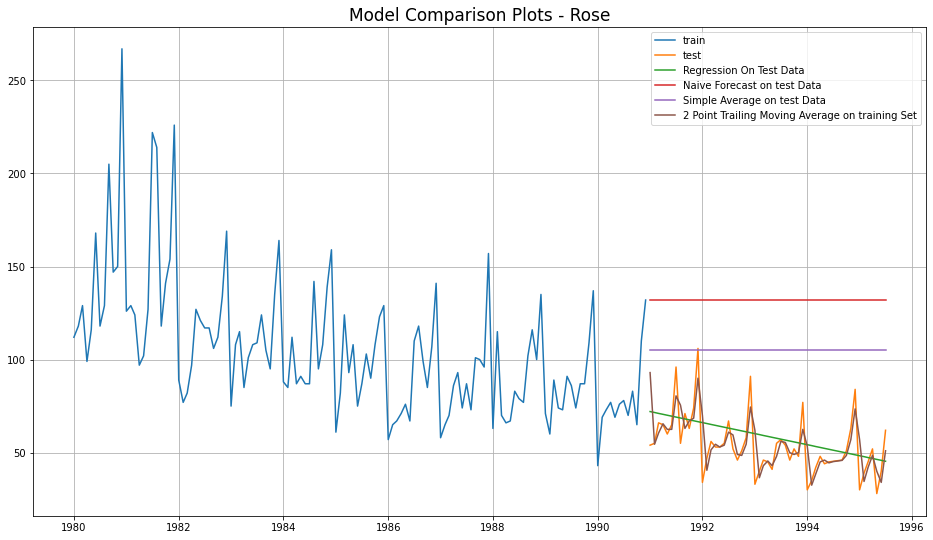

In [109]:
## Plotting on both rtraining and rtest data

plt.plot(rtrain['Rose'], label='train')
plt.plot(rtest['Rose'], label='test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots - Rose", fontsize=17)
plt.grid();

# Consolidated plots of All Models- Sparkling

In [110]:
# LR on Sparkling
train_time = [i+1 for i in range(len(strain))]
test_time = [i+133 for i in range(len(stest))]
LinearRegression_train = strain.copy()
LinearRegression_test = stest.copy()
LinearRegression_test['time'] = test_time
LinearRegression_train['time'] = train_time
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

# NB on Sparkling
NaiveModel_train = strain.copy()
NaiveModel_test = stest.copy()
NaiveModel_test['naive'] = np.asarray(strain['Sparkling'])[len(np.asarray(strain['Sparkling']))-1]

# SA on Sparkling
SimpleAverage_train = strain.copy()
SimpleAverage_test = stest.copy()
SimpleAverage_test['mean_forecast'] = strain['Sparkling'].mean()

# MA on Sparkling

MovingAverage = dfs.copy()
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
trailing_MovingAverage_test = MovingAverage[MovingAverage.index>='1991']

LinearRegression()

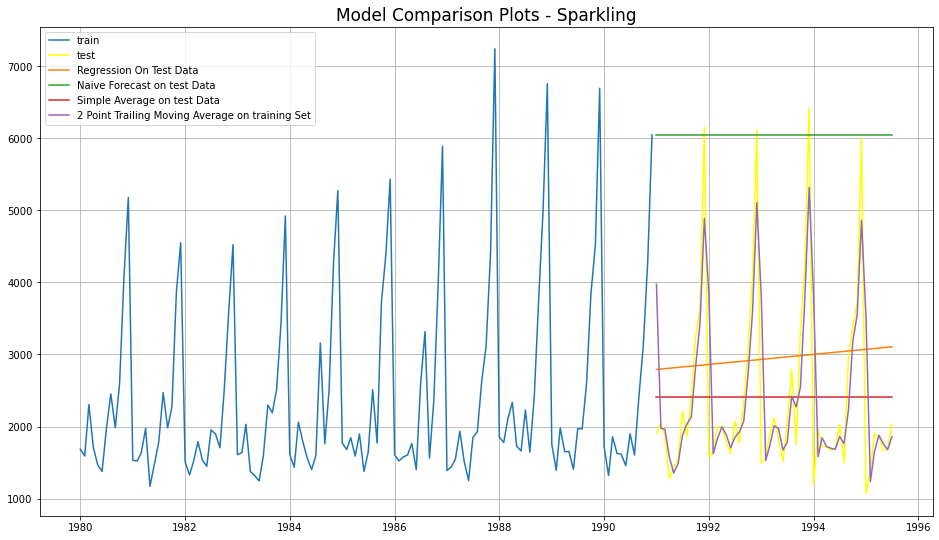

In [111]:
## Plotting on both rtraining and rtest data

plt.plot(strain['Sparkling'], label='train')
plt.plot(stest['Sparkling'], label='test', c='yellow')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots - Sparkling", fontsize=17)
plt.grid();

# Simple Exponential Smoothing, Holt's Model (Double Exponential Smoothing) & Holt-Winter's Model (Triple Exponential Smoothing)

In [112]:
# Importing the necessary packages

import statsmodels.tools.eval_measures as      em
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt

# SES - ETS(A, N, N) - Simple Exponential Smoothing with additive errors - ROSE

In [113]:
# create class
model_SES = SimpleExpSmoothing(rtrain,initialization_method='estimated' )

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [114]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [115]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.09874948955553707,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38694526092095,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [116]:
# Using the fitted model on the training set to forecast on the test set
SES_predict_rose = model_SES_autofit.forecast(steps=len(rtest))
SES_predict_rose

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01    87.104988
1991-02-01    87.104988
1991-03-01    87.104988
1991-04-01    87.104988
1991-05-01    87.104988
1991-06-01    87.104988
1991-07-01    87.104988
1991-08-01    87.104988
1991-09-01    87.104988
1991-10-01    87.104988
1991-11-01    87.104988
1991-12-01    87.104988
1992-01-01    87.104988
1992-02-01    87.104988
1992-03-01    87.104988
1992-04-01    87.104988
1992-05-01    87.104988
1992-06-01    87.104988
1992-07-01    87.104988
1992-08-01    87.104988
1992-09-01    87.104988
1992-10-01    87.104988
1992-11-01    87.104988
1992-12-01    87.104988
1993-01-01    87.104988
1993-02-01    87.104988
1993-03-01    87.104988
1993-04-01    87.104988
1993-05-01    87.104988
1993-06-01    87.104988
1993-07-01    87.104988
1993-08-01    87.104988
1993-09-01    87.104988
1993-10-01    87.104988
1993-11-01    87.104988
1993-12-01    87.104988
1994-01-01    87.104988
1994-02-01    87.104988
1994-03-01    87.104988
1994-04-01    87.104988
1994-05-01    87.104988
1994-06-01    87

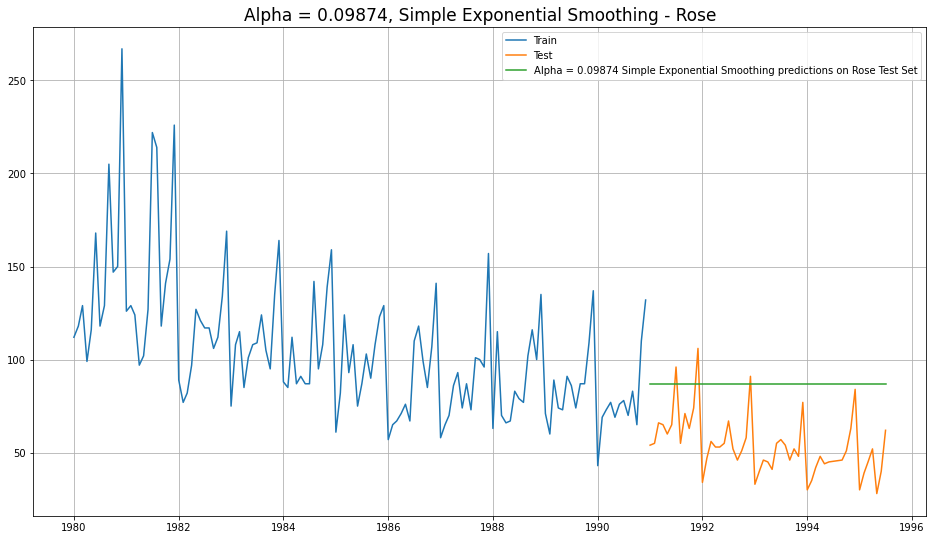

In [117]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha = 0.09874 Simple Exponential Smoothing predictions on Rose Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.09874, Simple Exponential Smoothing - Rose', fontsize=17);
plt.savefig('rose_ses.jpg', bbox_inches='tight');

In [118]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [119]:
print('SES RMSE:',mean_squared_error(rtest.values,SES_predict_rose.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(rtest.values,SES_predict_rose.values)[0])

SES RMSE: 36.7962318488955
SES RMSE (calculated using statsmodels): 36.7962318488955


In [120]:
resultsDf_rses = pd.DataFrame({'Test RMSE Rose': [em.rmse(rtest.values,SES_predict_rose.values)[0]]},index=['Simple Exponential Smoothing'])
resultsDf_rses

Test RMSE Rose
Simple Exponential Smoothing       36.796232

# SES - ETS(A, N, N) - Simple Exponential Smoothing with additive errors - SPARKLING

In [121]:
# create class
model_SES = SimpleExpSmoothing(strain,initialization_method='estimated' )

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [122]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [123]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.07028781452738747,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 2107.140127789084,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [124]:
# Using the fitted model on the training set to forecast on the test set
SES_predict_spark = model_SES_autofit.forecast(steps=len(stest))
SES_predict_spark

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01    2804.685494
1991-02-01    2804.685494
1991-03-01    2804.685494
1991-04-01    2804.685494
1991-05-01    2804.685494
1991-06-01    2804.685494
1991-07-01    2804.685494
1991-08-01    2804.685494
1991-09-01    2804.685494
1991-10-01    2804.685494
1991-11-01    2804.685494
1991-12-01    2804.685494
1992-01-01    2804.685494
1992-02-01    2804.685494
1992-03-01    2804.685494
1992-04-01    2804.685494
1992-05-01    2804.685494
1992-06-01    2804.685494
1992-07-01    2804.685494
1992-08-01    2804.685494
1992-09-01    2804.685494
1992-10-01    2804.685494
1992-11-01    2804.685494
1992-12-01    2804.685494
1993-01-01    2804.685494
1993-02-01    2804.685494
1993-03-01    2804.685494
1993-04-01    2804.685494
1993-05-01    2804.685494
1993-06-01    2804.685494
1993-07-01    2804.685494
1993-08-01    2804.685494
1993-09-01    2804.685494
1993-10-01    2804.685494
1993-11-01    2804.685494
1993-12-01    2804.685494
1994-01-01    2804.685494
1994-02-01    2804.685494
1994-03-01  

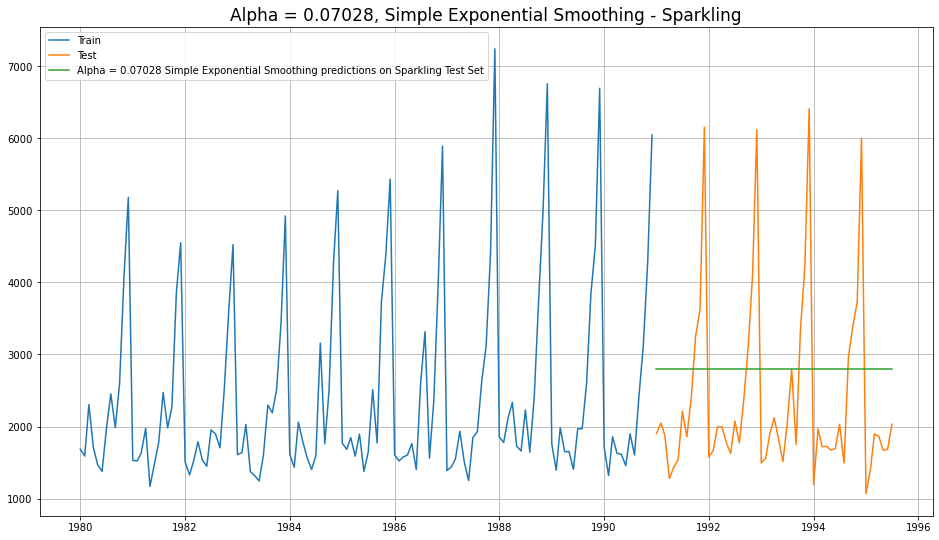

In [125]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha = 0.07028 Simple Exponential Smoothing predictions on Sparkling Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.07028, Simple Exponential Smoothing - Sparkling', fontsize=17);
plt.savefig('spark_ses.jpg', bbox_inches='tight');

In [126]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [127]:
print('SES RMSE:',mean_squared_error(stest.values,SES_predict_spark.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(rtest.values,SES_predict_spark.values)[0])

SES RMSE: 1338.0115276641463
SES RMSE (calculated using statsmodels): 2750.8760931796314


In [128]:
resultsDf_sses = pd.DataFrame({'Test RMSE Sparkling': [em.rmse(stest.values,SES_predict_spark.values)[0]]},index=['Simple Exponential Smoothing'])
resultsDf_sses

Test RMSE Sparkling
Simple Exponential Smoothing          1338.011528

In [129]:
resultsDf7 = resultsDf_rses.join(resultsDf_sses, how='outer')
resultsDf7

Test RMSE Rose  Test RMSE Sparkling
Simple Exponential Smoothing       36.796232          1338.011528

In [130]:
resultsDf8 = pd.concat([resultsDf, resultsDf7], axis=0)
resultsDf8

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime                   15.268955          1389.135175
NaiveModel                         79.718773          3864.279352
SimpleAverageModel                 53.460570          1275.081804
2pointTrailingMovingAverage        11.529278           813.400684
4pointTrailingMovingAverage        14.451403          1156.589694
6pointTrailingMovingAverage        14.566327          1283.927428
9pointTrailingMovingAverage        14.727630          1346.278315
Simple Exponential Smoothing       36.796232          1338.011528

In [131]:
resultsDf = resultsDf8.copy()

# Holt - ETS(A, A, N) - Holt's linear method with additive errors - Rose

In [132]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(rtrain,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('Holt model Exponential Smoothing Estimated Parameters :')
print('')
print(model_DES.params)


Holt model Exponential Smoothing Estimated Parameters :

{'smoothing_level': 1.4901161193847656e-08, 'smoothing_trend': 5.089024111286233e-09, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 137.81552293127515, 'initial_trend': -0.4943779020225337, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [133]:
# Forecasting using this model for the duration of the test set
DES_predict_rose =  model_DES.forecast(len(rtest))
DES_predict_rose

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01    72.063262
1991-02-01    71.568884
1991-03-01    71.074506
1991-04-01    70.580128
1991-05-01    70.085750
1991-06-01    69.591372
1991-07-01    69.096995
1991-08-01    68.602617
1991-09-01    68.108239
1991-10-01    67.613861
1991-11-01    67.119483
1991-12-01    66.625105
1992-01-01    66.130727
1992-02-01    65.636349
1992-03-01    65.141971
1992-04-01    64.647593
1992-05-01    64.153216
1992-06-01    63.658838
1992-07-01    63.164460
1992-08-01    62.670082
1992-09-01    62.175704
1992-10-01    61.681326
1992-11-01    61.186948
1992-12-01    60.692570
1993-01-01    60.198192
1993-02-01    59.703814
1993-03-01    59.209437
1993-04-01    58.715059
1993-05-01    58.220681
1993-06-01    57.726303
1993-07-01    57.231925
1993-08-01    56.737547
1993-09-01    56.243169
1993-10-01    55.748791
1993-11-01    55.254413
1993-12-01    54.760035
1994-01-01    54.265657
1994-02-01    53.771280
1994-03-01    53.276902
1994-04-01    52.782524
1994-05-01    52.288146
1994-06-01    51

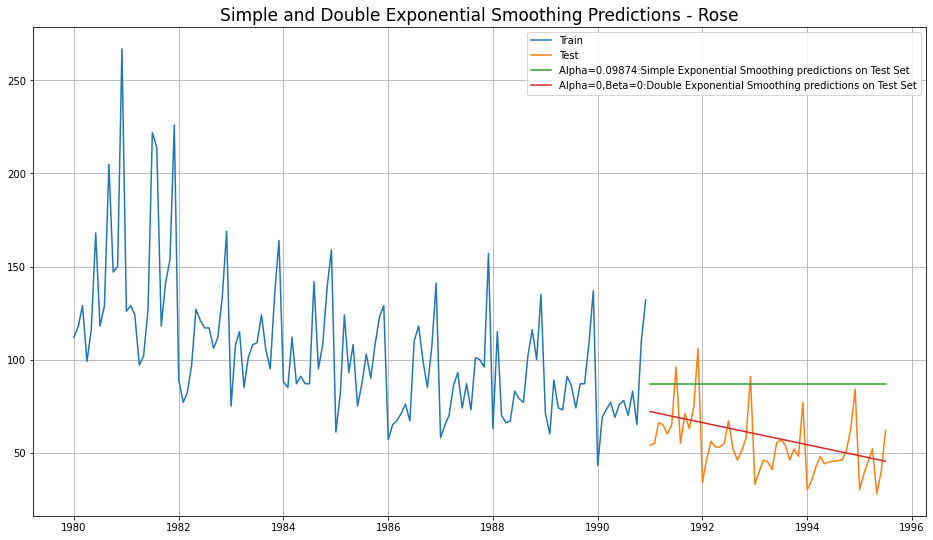

In [134]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions - Rose', fontsize=17);
plt.savefig('rose_rdes.jpg', bbox_inches='tight');

In [135]:
print('DES RMSE:',mean_squared_error(rtest.values,DES_predict_rose.values,squared=False))

DES RMSE: 15.268953534174152


In [136]:
resultsDf_temp = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,DES_predict_rose.values,squared=False)]}
                           ,index=['Double Exponential Smoothing'])

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf_temp

Test RMSE Rose
Double Exponential Smoothing       15.268954

# Holt - ETS(A, A, N) - Holt's linear method with additive errors - Sparkling
# Double Exponential Smoothing - Sparkling

In [137]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(strain,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('Holt model Exponential Smoothing Estimated Parameters :')
print('')
print(model_DES.params)


Holt model Exponential Smoothing Estimated Parameters :

{'smoothing_level': 0.6649999999999999, 'smoothing_trend': 0.0001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.1999999999994, 'initial_trend': 74.87272727272739, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [138]:
# Forecasting using this model for the duration of the test set
DES_predict_spark =  model_DES.forecast(len(stest))
DES_predict_spark

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01    5401.733026
1991-02-01    5476.005230
1991-03-01    5550.277433
1991-04-01    5624.549637
1991-05-01    5698.821840
1991-06-01    5773.094044
1991-07-01    5847.366248
1991-08-01    5921.638451
1991-09-01    5995.910655
1991-10-01    6070.182858
1991-11-01    6144.455062
1991-12-01    6218.727266
1992-01-01    6292.999469
1992-02-01    6367.271673
1992-03-01    6441.543876
1992-04-01    6515.816080
1992-05-01    6590.088284
1992-06-01    6664.360487
1992-07-01    6738.632691
1992-08-01    6812.904894
1992-09-01    6887.177098
1992-10-01    6961.449302
1992-11-01    7035.721505
1992-12-01    7109.993709
1993-01-01    7184.265912
1993-02-01    7258.538116
1993-03-01    7332.810320
1993-04-01    7407.082523
1993-05-01    7481.354727
1993-06-01    7555.626930
1993-07-01    7629.899134
1993-08-01    7704.171338
1993-09-01    7778.443541
1993-10-01    7852.715745
1993-11-01    7926.987948
1993-12-01    8001.260152
1994-01-01    8075.532356
1994-02-01    8149.804559
1994-03-01  

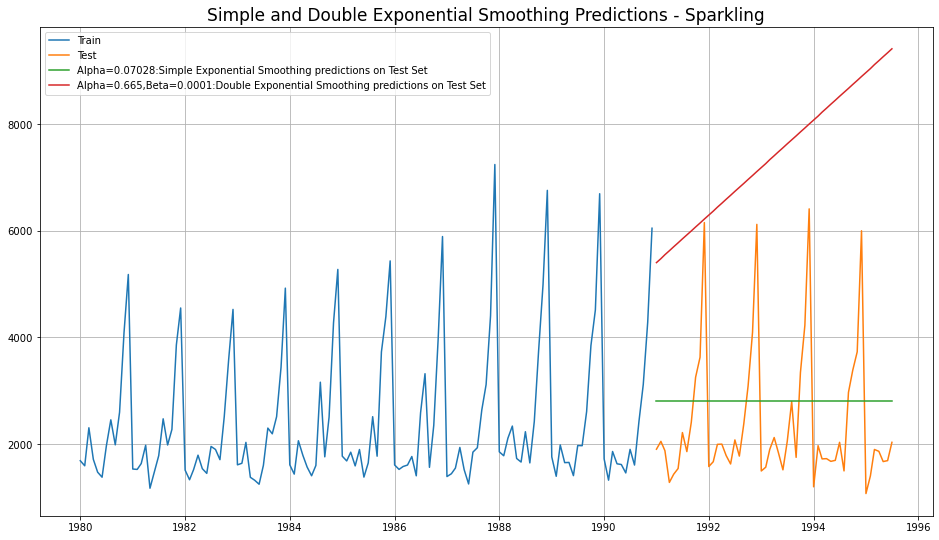

In [139]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha=0.07028:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions - Sparkling', fontsize=17);
plt.savefig('spark_des.jpg', bbox_inches='tight');

In [140]:
print('DES RMSE:',mean_squared_error(stest.values,DES_predict_spark.values,squared=False))

DES RMSE: 5291.8798332269125


In [141]:
resultsDf_temp1 = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,DES_predict_spark.values,squared=False)]}
                           ,index=['Double Exponential Smoothing'])

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf_temp1

Test RMSE Sparkling
Double Exponential Smoothing          5291.879833

In [142]:
resultsDf9 = resultsDf_temp.join(resultsDf_temp1, how='outer')
resultsDf9

Test RMSE Rose  Test RMSE Sparkling
Double Exponential Smoothing       15.268954          5291.879833

In [143]:
resultsDf10 = pd.concat([resultsDf, resultsDf9], axis=0)
resultsDf10

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime                   15.268955          1389.135175
NaiveModel                         79.718773          3864.279352
SimpleAverageModel                 53.460570          1275.081804
2pointTrailingMovingAverage        11.529278           813.400684
4pointTrailingMovingAverage        14.451403          1156.589694
6pointTrailingMovingAverage        14.566327          1283.927428
9pointTrailingMovingAverage        14.727630          1346.278315
Simple Exponential Smoothing       36.796232          1338.011528
Double Exponential Smoothing       15.268954          5291.879833

In [144]:
resultsDf = resultsDf10.copy()
resultsDf

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime                   15.268955          1389.135175
NaiveModel                         79.718773          3864.279352
SimpleAverageModel                 53.460570          1275.081804
2pointTrailingMovingAverage        11.529278           813.400684
4pointTrailingMovingAverage        14.451403          1156.589694
6pointTrailingMovingAverage        14.566327          1283.927428
9pointTrailingMovingAverage        14.727630          1346.278315
Simple Exponential Smoothing       36.796232          1338.011528
Double Exponential Smoothing       15.268954          5291.879833

# Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors - ROSE

In [145]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(rtrain,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.08858424409172196, 'smoothing_trend': 2.0311228483584628e-05, 'smoothing_seasonal': 0.00019569221629732076, 'damping_trend': nan, 'initial_level': 146.88904624474034, 'initial_trend': -0.5493358787156468, 'initial_seasons': array([-31.22976943, -18.83320989, -10.81910614, -21.45685884,
       -12.62990007,  -7.15718632,   2.74840081,   8.82027659,
         4.85543351,   2.94379987,  21.02192818,  63.33510061]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [146]:
# Forecasting using this model for the duration of the test set
TES_predict_add_rose =  model_TES.forecast(len(rtest))
TES_predict_add_rose

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01     42.558134
1991-02-01     54.405294
1991-03-01     61.870034
1991-04-01     50.682967
1991-05-01     58.960566
1991-06-01     63.883903
1991-07-01     73.240172
1991-08-01     78.762755
1991-09-01     74.248522
1991-10-01     71.787574
1991-11-01     89.316404
1991-12-01    131.081355
1992-01-01     35.966097
1992-02-01     47.813257
1992-03-01     55.277997
1992-04-01     44.090930
1992-05-01     52.368529
1992-06-01     57.291867
1992-07-01     66.648135
1992-08-01     72.170718
1992-09-01     67.656485
1992-10-01     65.195537
1992-11-01     82.724367
1992-12-01    124.489319
1993-01-01     29.374061
1993-02-01     41.221221
1993-03-01     48.685960
1993-04-01     37.498893
1993-05-01     45.776493
1993-06-01     50.699830
1993-07-01     60.056099
1993-08-01     65.578682
1993-09-01     61.064449
1993-10-01     58.603501
1993-11-01     76.132331
1993-12-01    117.897282
1994-01-01     22.782024
1994-02-01     34.629184
1994-03-01     42.093924
1994-04-01     30.906857


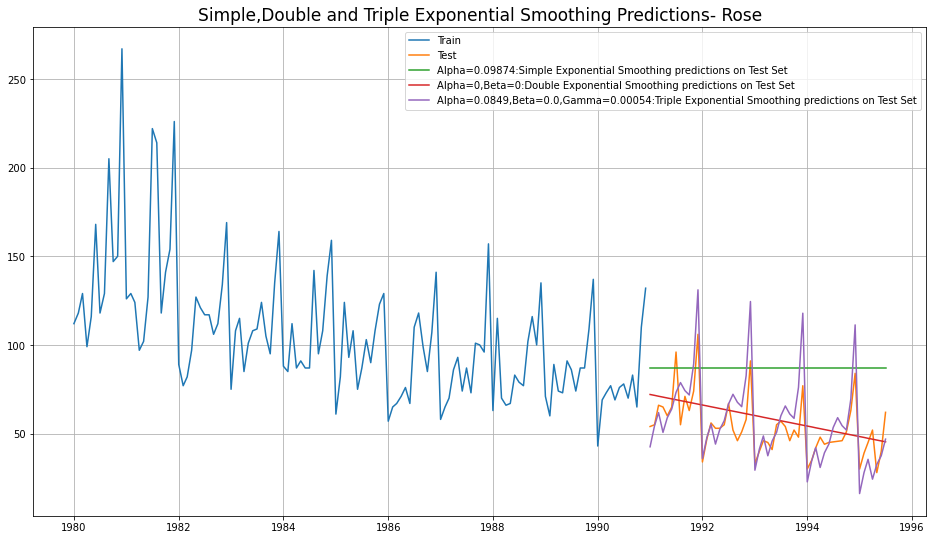

In [147]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_rose, label='Alpha=0.0849,Beta=0.0,Gamma=0.00054:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions- Rose', fontsize=17);
plt.savefig('rose_add_tes.jpg', bbox_inches='tight');

In [148]:
print('TES RMSE:',mean_squared_error(rtest.values,TES_predict_add_rose.values,squared=False))

TES RMSE: 14.26013782388765


In [149]:
resultsDf_temp = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,TES_predict_add_rose.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Additive Season)'])

import textwrap
textwrap.TextWrapper(resultsDf_temp.index)

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf_temp

Test RMSE Rose
Triple Exponential Smoothing (Additive Season)       14.260138

# Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors - SPARKLING

In [150]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(strain,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.09992902361164176, 'smoothing_trend': 0.010009547876400623, 'smoothing_seasonal': 0.5100421801935793, 'damping_trend': nan, 'initial_level': 2365.591771961746, 'initial_trend': -0.09602588432632331, 'initial_seasons': array([-655.84776183, -738.31091678, -364.87202857, -484.75328511,
       -828.15625771, -834.85547234, -386.55684735,   93.97843967,
       -263.92294251,  264.671433  , 1584.72825037, 2622.97517826]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [151]:
# Forecasting using this model for the duration of the test set
TES_predict_add_spark =  model_TES.forecast(len(stest))
TES_predict_add_spark

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01    1509.946470
1991-02-01    1205.135670
1991-03-01    1702.264581
1991-04-01    1548.222449
1991-05-01    1467.592540
1991-06-01    1286.870312
1991-07-01    1803.678502
1991-08-01    1645.706942
1991-09-01    2326.281653
1991-10-01    3228.191151
1991-11-01    4302.835331
1991-12-01    6460.488170
1992-01-01    1505.173517
1992-02-01    1200.362717
1992-03-01    1697.491629
1992-04-01    1543.449496
1992-05-01    1462.819588
1992-06-01    1282.097360
1992-07-01    1798.905550
1992-08-01    1640.933990
1992-09-01    2321.508700
1992-10-01    3223.418199
1992-11-01    4298.062379
1992-12-01    6455.715218
1993-01-01    1500.400565
1993-02-01    1195.589765
1993-03-01    1692.718676
1993-04-01    1538.676544
1993-05-01    1458.046636
1993-06-01    1277.324408
1993-07-01    1794.132598
1993-08-01    1636.161038
1993-09-01    2316.735748
1993-10-01    3218.645246
1993-11-01    4293.289426
1993-12-01    6450.942266
1994-01-01    1495.627613
1994-02-01    1190.816813
1994-03-01  

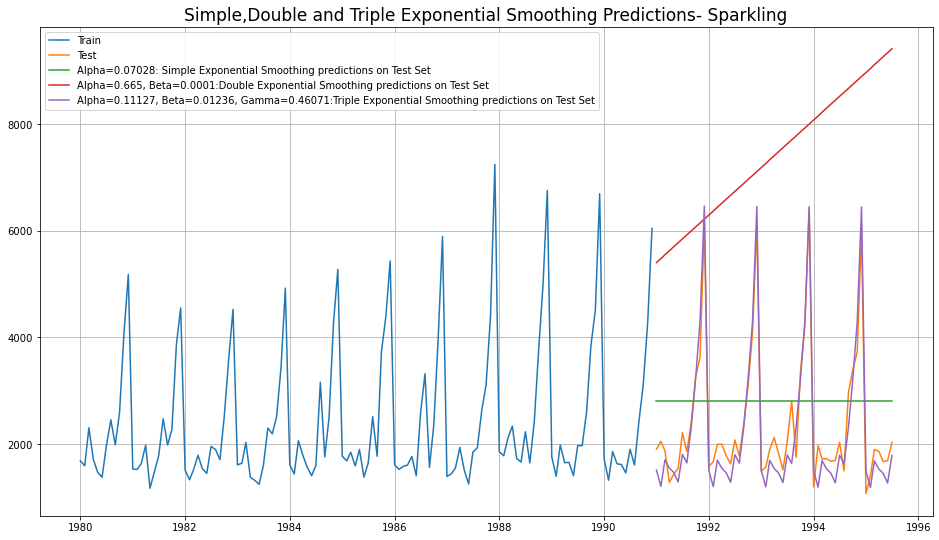

In [152]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha=0.07028: Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665, Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_spark, label='Alpha=0.11127, Beta=0.01236, Gamma=0.46071:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions- Sparkling', fontsize=17);
plt.savefig('spark_add_tes.jpg', bbox_inches='tight');

In [153]:
print('TES RMSE:',mean_squared_error(stest.values,TES_predict_add_spark.values,squared=False))

TES RMSE: 380.09474999368126


In [154]:
resultsDf_temp1 = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,TES_predict_add_spark.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Additive Season)'])

import textwrap
textwrap.TextWrapper(resultsDf_temp.index)

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf_temp1

Test RMSE Sparkling
Triple Exponential Smoothing (Additive Season)            380.09475

In [155]:
resultsDf11 = resultsDf_temp.join(resultsDf_temp1, how='outer')
resultsDf11

Test RMSE Rose  \
Triple Exponential Smoothing (Additive Season)       14.260138   

                                                Test RMSE Sparkling  
Triple Exponential Smoothing (Additive Season)            380.09475

In [156]:
resultsDf12 = pd.concat([resultsDf, resultsDf11], axis=0)
resultsDf12

Test RMSE Rose  \
RegressionOnTime                                     15.268955   
NaiveModel                                           79.718773   
SimpleAverageModel                                   53.460570   
2pointTrailingMovingAverage                          11.529278   
4pointTrailingMovingAverage                          14.451403   
6pointTrailingMovingAverage                          14.566327   
9pointTrailingMovingAverage                          14.727630   
Simple Exponential Smoothing                         36.796232   
Double Exponential Smoothing                         15.268954   
Triple Exponential Smoothing (Additive Season)       14.260138   

                                                Test RMSE Sparkling  
RegressionOnTime                                        1389.135175  
NaiveModel                                              3864.279352  
SimpleAverageModel                                      1275.081804  
2pointTrailingMovingAverage                              813.400684  
4pointTrailingMovingAverage                             1156.589694  
6pointTrailingMovingAverage                             1283.927428  
9pointTrailingMovingAverage                             1346.278315  
Simple Exponential Smoothing                            1338.011528  
Double Exponential Smoothing                            5291.879833  
Triple Exponential Smoothing (Additive Season)           380.094750

In [157]:
resultsDf = resultsDf12.copy()

# Holt-Winters - ETS(A, A, M) - Holt Winter's linear method - ROSE

# ETS(A, A, M) model - Taking MULTIPLICATIVE SEASONALITY

In [158]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(rtrain,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07043989932631503, 'smoothing_trend': 0.04650301769213779, 'smoothing_seasonal': 4.039590252509318e-06, 'damping_trend': nan, 'initial_level': 146.61279022991906, 'initial_trend': -0.8811320443785916, 'initial_seasons': array([0.76750223, 0.87046378, 0.95125375, 0.8313741 , 0.93493001,
       1.01837326, 1.11984632, 1.191993  , 1.12850536, 1.10509424,
       1.28822129, 1.77635939]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [159]:
# Forecasting using this model for the duration of the test set
TES_predict_am_rose =  model_TES_am.forecast(len(rtest))
TES_predict_am_rose

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01     56.403015
1991-02-01     63.768569
1991-03-01     69.467268
1991-04-01     60.520787
1991-05-01     67.843106
1991-06-01     73.662680
1991-07-01     80.743874
1991-08-01     85.670371
1991-09-01     80.846790
1991-10-01     78.914284
1991-11-01     91.693684
1991-12-01    126.027939
1992-01-01     54.274897
1992-02-01     61.354956
1992-03-01     66.829642
1992-04-01     58.215559
1992-05-01     65.250743
1992-06-01     70.838954
1992-07-01     77.638784
1992-08-01     82.365235
1992-09-01     77.717687
1992-10-01     75.850094
1992-11-01     88.121720
1992-12-01    121.102480
1993-01-01     52.146780
1993-02-01     58.941343
1993-03-01     64.192017
1993-04-01     55.910331
1993-05-01     62.658381
1993-06-01     68.015228
1993-07-01     74.533693
1993-08-01     79.060100
1993-09-01     74.588583
1993-10-01     72.785903
1993-11-01     84.549756
1993-12-01    116.177022
1994-01-01     50.018662
1994-02-01     56.527730
1994-03-01     61.554391
1994-04-01     53.605104


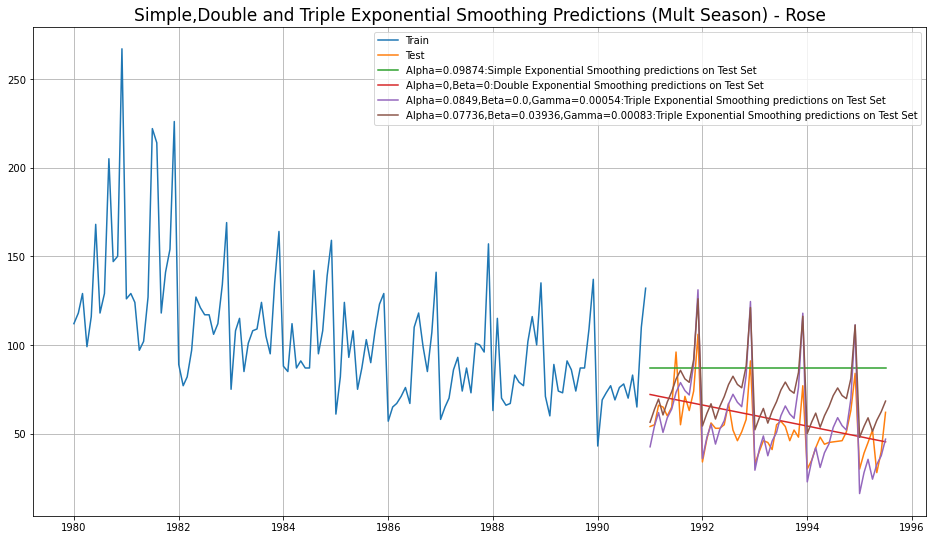

In [160]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_rose, label='Alpha=0.0849,Beta=0.0,Gamma=0.00054:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am_rose, label='Alpha=0.07736,Beta=0.03936,Gamma=0.00083:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (Mult Season) - Rose', fontsize=17);

plt.savefig('rose_mul_tes.jpg', bbox_inches='tight');

# Report model accuracy

In [161]:
print('TES_am RMSE_rose:',mean_squared_error(rtest.values,TES_predict_am_rose.values,squared=False))

TES_am RMSE_rose: 20.33339958339066


In [162]:
# resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
#                            ,index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
# resultsDf

resultsDf_temp = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,TES_predict_am_rose.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Multiplicative Season)'])



resultsDf_temp

Test RMSE Rose
Triple Exponential Smoothing (Multiplicative Se...         20.3334

# Holt-Winters - ETS(A, A, M) - Holt Winter's linear method - SPARKLING
# ETS(A, A, M) model - Taking MULTIPLICATIVE SEASONALITY

In [163]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(strain,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11101677395783265, 'smoothing_trend': 0.049316382632581326, 'smoothing_seasonal': 0.3624389131056697, 'damping_trend': nan, 'initial_level': 2356.4978867323553, 'initial_trend': -9.787302694315414, 'initial_seasons': array([0.7135243 , 0.68298624, 0.90486849, 0.8056077 , 0.65585195,
       0.65409923, 0.88620874, 1.13360552, 0.91938008, 1.21194659,
       1.87102251, 2.37567892]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [164]:
# Forecasting using this model for the duration of the test set
TES_predict_am_spark =  model_TES_am.forecast(len(stest))
TES_predict_am_spark

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01    1587.916886
1991-02-01    1356.651239
1991-03-01    1763.347842
1991-04-01    1656.524156
1991-05-01    1542.384105
1991-06-01    1355.479439
1991-07-01    1854.704184
1991-08-01    1820.668195
1991-09-01    2277.671041
1991-10-01    3123.108145
1991-11-01    4130.001968
1991-12-01    5893.127445
1992-01-01    1539.017807
1992-02-01    1314.766382
1992-03-01    1708.766323
1992-04-01    1605.116585
1992-05-01    1494.394581
1992-06-01    1313.195606
1992-07-01    1796.696369
1992-08-01    1763.576089
1992-09-01    2206.061215
1992-10-01    3024.659900
1992-11-01    3999.471000
1992-12-01    5706.380080
1993-01-01    1490.118729
1993-02-01    1272.881524
1993-03-01    1654.184804
1993-04-01    1553.709014
1993-05-01    1446.405056
1993-06-01    1270.911773
1993-07-01    1738.688553
1993-08-01    1706.483984
1993-09-01    2134.451390
1993-10-01    2926.211654
1993-11-01    3868.940033
1993-12-01    5519.632715
1994-01-01    1441.219650
1994-02-01    1230.996666
1994-03-01  

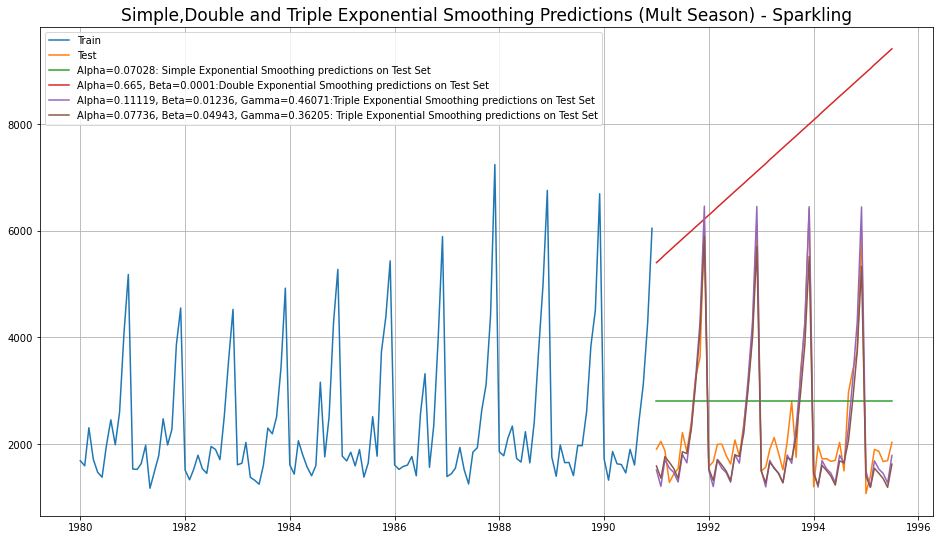

In [165]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha=0.07028: Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665, Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_spark, label='Alpha=0.11119, Beta=0.01236, Gamma=0.46071:Triple Exponential Smoothing predictions on Test Set')

plt.plot(TES_predict_am_spark, label='Alpha=0.07736, Beta=0.04943, Gamma=0.36205: Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (Mult Season) - Sparkling', fontsize=17);

plt.savefig('spark_mul_tes.jpg', bbox_inches='tight');

# Report model accuracy

In [166]:
print('TES_am RMSE_spark:',mean_squared_error(stest.values,TES_predict_am_spark.values,squared=False))

TES_am RMSE_spark: 402.9468542508608


In [167]:
# resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
#                            ,index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
# resultsDf

resultsDf_temp1 = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,TES_predict_am_spark.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Multiplicative Season)'])



resultsDf_temp1

Test RMSE Sparkling
Triple Exponential Smoothing (Multiplicative Se...           402.946854

In [168]:
resultsDf13 = resultsDf_temp.join(resultsDf_temp1, how='outer')
resultsDf13

Test RMSE Rose  \
Triple Exponential Smoothing (Multiplicative Se...         20.3334   

                                                    Test RMSE Sparkling  
Triple Exponential Smoothing (Multiplicative Se...           402.946854

In [169]:
resultsDf14 = pd.concat([resultsDf, resultsDf13], axis=0)
resultsDf14

Test RMSE Rose  \
RegressionOnTime                                         15.268955   
NaiveModel                                               79.718773   
SimpleAverageModel                                       53.460570   
2pointTrailingMovingAverage                              11.529278   
4pointTrailingMovingAverage                              14.451403   
6pointTrailingMovingAverage                              14.566327   
9pointTrailingMovingAverage                              14.727630   
Simple Exponential Smoothing                             36.796232   
Double Exponential Smoothing                             15.268954   
Triple Exponential Smoothing (Additive Season)           14.260138   
Triple Exponential Smoothing (Multiplicative Se...       20.333400   

                                                    Test RMSE Sparkling  
RegressionOnTime                                            1389.135175  
NaiveModel                                                  3864.279352  
SimpleAverageModel                                          1275.081804  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
Simple Exponential Smoothing                                1338.011528  
Double Exponential Smoothing                                5291.879833  
Triple Exponential Smoothing (Additive Season)               380.094750  
Triple Exponential Smoothing (Multiplicative Se...           402.946854

In [170]:
resultsDf = resultsDf14.copy()
resultsDf

Test RMSE Rose  \
RegressionOnTime                                         15.268955   
NaiveModel                                               79.718773   
SimpleAverageModel                                       53.460570   
2pointTrailingMovingAverage                              11.529278   
4pointTrailingMovingAverage                              14.451403   
6pointTrailingMovingAverage                              14.566327   
9pointTrailingMovingAverage                              14.727630   
Simple Exponential Smoothing                             36.796232   
Double Exponential Smoothing                             15.268954   
Triple Exponential Smoothing (Additive Season)           14.260138   
Triple Exponential Smoothing (Multiplicative Se...       20.333400   

                                                    Test RMSE Sparkling  
RegressionOnTime                                            1389.135175  
NaiveModel                                                  3864.279352  
SimpleAverageModel                                          1275.081804  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
Simple Exponential Smoothing                                1338.011528  
Double Exponential Smoothing                                5291.879833  
Triple Exponential Smoothing (Additive Season)               380.094750  
Triple Exponential Smoothing (Multiplicative Se...           402.946854

In [171]:
resultsDf.to_csv('results_all.csv')

# Holt-Winters - ETS(A, Ad, A) - Holt Winter's linear method with additive errors - ROSE
# USING DAMPED TREND

In [172]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(rtrain,trend='additive',seasonal='additive',initialization_method='estimated', damped_trend=True)
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.01622608727328307, 'smoothing_trend': 0.0017454434975503665, 'smoothing_seasonal': 0.014242643045227233, 'damping_trend': 0.9738919840257706, 'initial_level': 162.38646362264015, 'initial_trend': -2.1643699404683203, 'initial_seasons': array([-29.68840143, -18.08181993,  -9.94901439, -21.28659554,
       -11.91365977,  -6.03168655,   4.94427278,  11.15783151,
         6.34312347,   3.55161222,  21.67877057,  66.39190009]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [173]:
# Forecasting using this model for the duration of the test set
TES_predict_add_damp_rose =  model_TES.forecast(len(rtest))
TES_predict_add_damp_rose

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01     52.650313
1991-02-01     64.355480
1991-03-01     72.400960
1991-04-01     61.166637
1991-05-01     70.353449
1991-06-01     76.074261
1991-07-01     86.826609
1991-08-01     92.928155
1991-09-01     88.251390
1991-10-01     85.556156
1991-11-01    103.627270
1991-12-01    148.061692
1992-01-01     51.970957
1992-02-01     63.693861
1992-03-01     71.756615
1992-04-01     60.539114
1992-05-01     69.742310
1992-06-01     75.479077
1992-07-01     86.246964
1992-08-01     92.363644
1992-09-01     87.701617
1992-10-01     85.020736
1992-11-01    103.105830
1992-12-01    147.553864
1993-01-01     51.476388
1993-02-01     63.212205
1993-03-01     71.287533
1993-04-01     60.082280
1993-05-01     69.297402
1993-06-01     75.045785
1993-07-01     85.824985
1993-08-01     91.952681
1993-09-01     87.301384
1993-10-01     84.630953
1993-11-01    102.726222
1993-12-01    147.184168
1994-01-01     51.116344
1994-02-01     62.861560
1994-03-01     70.946044
1994-04-01     59.749705


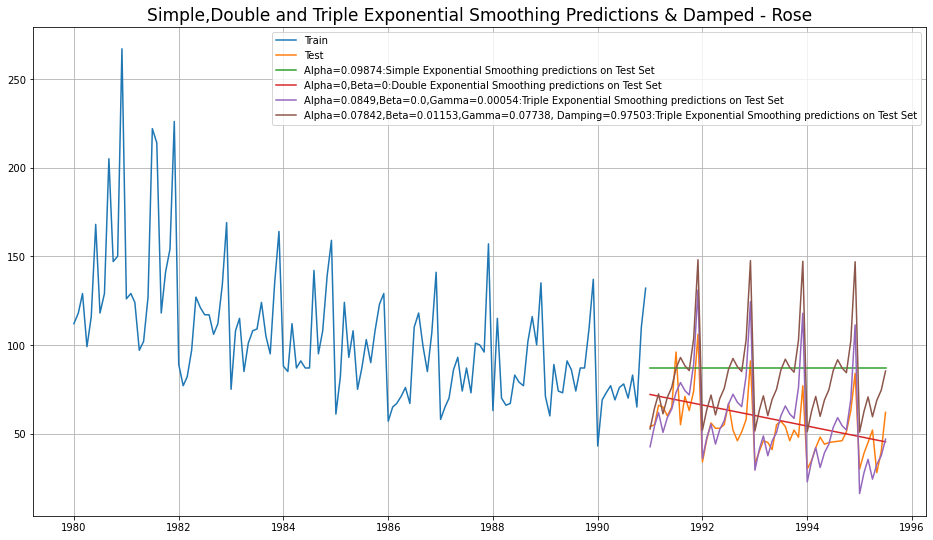

In [174]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_rose, label='Alpha=0.0849,Beta=0.0,Gamma=0.00054:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_damp_rose, label='Alpha=0.07842,Beta=0.01153,Gamma=0.07738, Damping=0.97503:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions & Damped - Rose', fontsize=17);
plt.savefig('rose_add_damp_tes.jpg', bbox_inches='tight');

In [175]:
print('TES RMSE DAMPED ROSE:',mean_squared_error(rtest.values,TES_predict_add_damp_rose.values,squared=False))

TES RMSE DAMPED ROSE: 31.288601744857512


In [176]:
resultsDf_temp = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,TES_predict_add_damp_rose.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Additive Season, Damped Trend)'])

import textwrap
textwrap.TextWrapper(resultsDf_temp.index)

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf_temp

Test RMSE Rose
Triple Exponential Smoothing (Additive Season, ...       31.288602

# Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors - SPARKLING
# USING DAMPED TREND

In [177]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(strain,trend='additive',seasonal='additive',initialization_method='estimated', damped_trend=True)
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.09980223369110226, 'smoothing_trend': 9.984239558731602e-05, 'smoothing_seasonal': 0.5113008426428158, 'damping_trend': 0.9700760313301242, 'initial_level': 2366.4704640221703, 'initial_trend': -3.9746407078094492, 'initial_seasons': array([-654.66417425, -737.29919345, -367.14738781, -483.95271995,
       -826.74343276, -833.38987585, -386.21054712,   92.90039571,
       -261.93286273,  265.44855201, 1582.0934857 , 2621.09146585]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [178]:
# Forecasting using this model for the duration of the test set
TES_predict_add_damp_spark =  model_TES.forecast(len(stest))
TES_predict_add_damp_spark

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01    1504.463556
1991-02-01    1200.348222
1991-03-01    1698.783983
1991-04-01    1545.268548
1991-05-01    1465.666164
1991-06-01    1285.696766
1991-07-01    1802.936735
1991-08-01    1644.812514
1991-09-01    2326.608471
1991-10-01    3228.527274
1991-11-01    4303.442609
1991-12-01    6458.394960
1992-01-01    1503.658720
1992-02-01    1199.567470
1992-03-01    1698.026594
1992-04-01    1544.533824
1992-05-01    1464.953425
1992-06-01    1285.005355
1992-07-01    1802.266014
1992-08-01    1644.161863
1992-09-01    2325.977291
1992-10-01    3227.914981
1992-11-01    4302.848638
1992-12-01    6457.818764
1993-01-01    1503.099766
1993-02-01    1199.025242
1993-03-01    1697.500592
1993-04-01    1544.023561
1993-05-01    1464.458432
1993-06-01    1284.525174
1993-07-01    1801.800202
1993-08-01    1643.709990
1993-09-01    2325.538939
1993-10-01    3227.489746
1993-11-01    4302.436128
1993-12-01    6457.418598
1994-01-01    1502.711574
1994-02-01    1198.648667
1994-03-01  

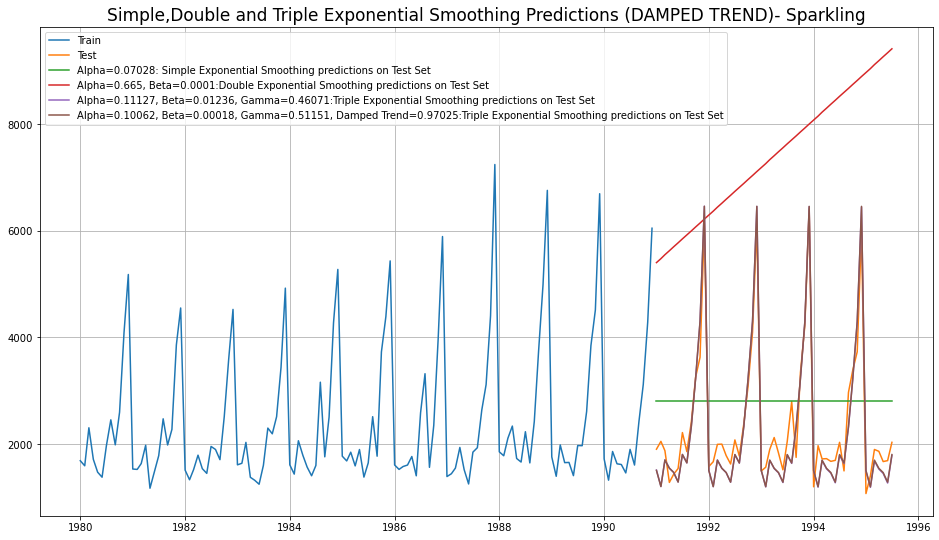

In [179]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha=0.07028: Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665, Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_spark, label='Alpha=0.11127, Beta=0.01236, Gamma=0.46071:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_damp_spark, label='Alpha=0.10062, Beta=0.00018, Gamma=0.51151, Damped Trend=0.97025:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (DAMPED TREND)- Sparkling', fontsize=17);
plt.savefig('spark_add_damp_tes.jpg', bbox_inches='tight');

In [180]:
print('TES RMSE SPARK DAMPED:',mean_squared_error(stest.values,TES_predict_add_damp_spark.values,squared=False))

TES RMSE SPARK DAMPED: 378.1206419144388


In [181]:
resultsDf_temp1 = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,TES_predict_add_spark.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Additive Season, Damped Trend)'])

import textwrap
textwrap.TextWrapper(resultsDf_temp.index)

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf_temp1

Test RMSE Sparkling
Triple Exponential Smoothing (Additive Season, ...            380.09475

In [182]:
resultsDf11 = resultsDf_temp.join(resultsDf_temp1, how='outer')
resultsDf11

Test RMSE Rose  \
Triple Exponential Smoothing (Additive Season, ...       31.288602   

                                                    Test RMSE Sparkling  
Triple Exponential Smoothing (Additive Season, ...            380.09475

In [183]:
resultsDf12 = pd.concat([resultsDf, resultsDf11], axis=0)
resultsDf12

Test RMSE Rose  \
RegressionOnTime                                         15.268955   
NaiveModel                                               79.718773   
SimpleAverageModel                                       53.460570   
2pointTrailingMovingAverage                              11.529278   
4pointTrailingMovingAverage                              14.451403   
6pointTrailingMovingAverage                              14.566327   
9pointTrailingMovingAverage                              14.727630   
Simple Exponential Smoothing                             36.796232   
Double Exponential Smoothing                             15.268954   
Triple Exponential Smoothing (Additive Season)           14.260138   
Triple Exponential Smoothing (Multiplicative Se...       20.333400   
Triple Exponential Smoothing (Additive Season, ...       31.288602   

                                                    Test RMSE Sparkling  
RegressionOnTime                                            1389.135175  
NaiveModel                                                  3864.279352  
SimpleAverageModel                                          1275.081804  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
Simple Exponential Smoothing                                1338.011528  
Double Exponential Smoothing                                5291.879833  
Triple Exponential Smoothing (Additive Season)               380.094750  
Triple Exponential Smoothing (Multiplicative Se...           402.946854  
Triple Exponential Smoothing (Additive Season, ...           380.094750

In [184]:
resultsDf = resultsDf12.copy()

# Holt-Winters - ETS(A, A, M) - Holt Winter's linear method - ROSE
# USING DAMPED TREND
# ETS(A, Ad, M) model - Taking MULTIPLICATIVE SEASONALITY

In [185]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(rtrain,trend='add',seasonal='multiplicative',initialization_method='estimated', damped_trend=True)
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.009397142301983605, 'smoothing_trend': 5.033485192267321e-05, 'smoothing_seasonal': 0.007668126402981385, 'damping_trend': 0.9798505427790716, 'initial_level': 153.53478566806103, 'initial_trend': -1.7248324156905945, 'initial_seasons': array([0.76487394, 0.86681475, 0.94589924, 0.82892768, 0.92790864,
       1.00828672, 1.10474402, 1.17434094, 1.12777034, 1.09549317,
       1.27641402, 1.75027378]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [186]:
# Forecasting using this model for the duration of the test set
TES_predict_am_damp_rose =  model_TES_am.forecast(len(rtest))
TES_predict_am_damp_rose

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01     57.491610
1991-02-01     65.310558
1991-03-01     71.148203
1991-04-01     62.412852
1991-05-01     69.595299
1991-06-01     75.244996
1991-07-01     82.384918
1991-08-01     87.367736
1991-09-01     83.922546
1991-10-01     81.544635
1991-11-01     94.982852
1991-12-01    129.714354
1992-01-01     56.565885
1992-02-01     64.278577
1992-03-01     70.045013
1992-04-01     61.463239
1992-05-01     68.556271
1992-06-01     74.142725
1992-07-01     81.200759
1992-08-01     86.135613
1992-09-01     82.761335
1992-10-01     80.437637
1992-11-01     93.717809
1992-12-01    128.019447
1993-01-01     55.840781
1993-02-01     63.470245
1993-03-01     69.180904
1993-04-01     60.719424
1993-05-01     67.742419
1993-06-01     73.279337
1993-07-01     80.273229
1993-08-01     85.170514
1993-09-01     81.851779
1993-10-01     79.570545
1993-11-01     92.726924
1993-12-01    126.691857
1994-01-01     55.272820
1994-02-01     62.837094
1994-03-01     68.504063
1994-04-01     60.136807


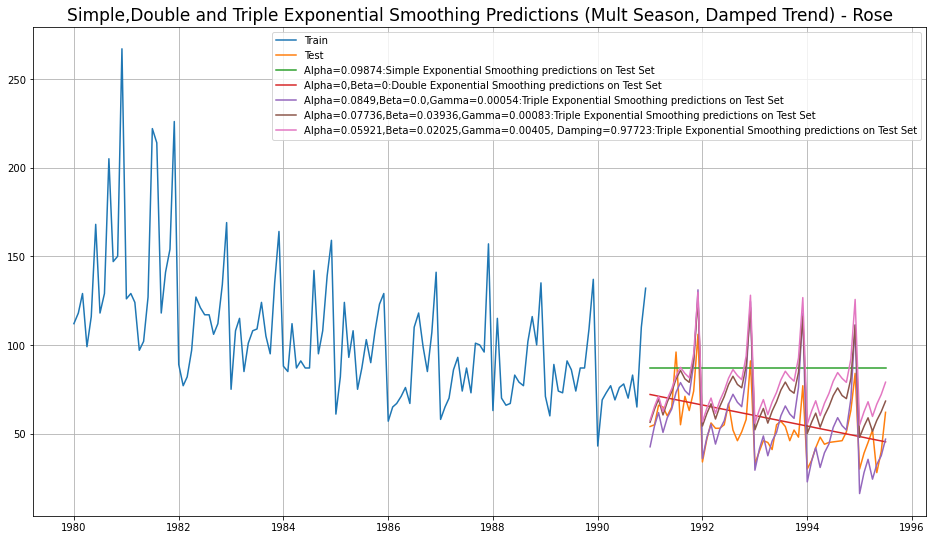

In [187]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_rose, label='Alpha=0.0849,Beta=0.0,Gamma=0.00054:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am_rose, label='Alpha=0.07736,Beta=0.03936,Gamma=0.00083:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am_damp_rose, label='Alpha=0.05921,Beta=0.02025,Gamma=0.00405, Damping=0.97723:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (Mult Season, Damped Trend) - Rose', fontsize=17);

plt.savefig('rose_mul_damp_tes.jpg', bbox_inches='tight');

# Report model accuracy

In [188]:
print('TES_am RMSE_rose DAMPED:',mean_squared_error(rtest.values,TES_predict_am_damp_rose.values,squared=False))

TES_am RMSE_rose DAMPED: 26.04838082937307


In [189]:
# resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
#                            ,index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
# resultsDf

resultsDf_temp = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,TES_predict_am_damp_rose.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Multiplicative Season, Damped Trend)'])



resultsDf_temp

Test RMSE Rose
Triple Exponential Smoothing (Multiplicative Se...       26.048381

# Holt-Winters - ETS(A, A, M) - Holt Winter's linear method - SPARKLING
# ETS(A, A, M) model - Taking MULTIPLICATIVE SEASONALITY
# USING DAMPED TREND

In [190]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(strain,trend='add',seasonal='multiplicative',initialization_method='estimated', damped_trend=True)
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11105776808910008, 'smoothing_trend': 0.03701467953928387, 'smoothing_seasonal': 0.3951465520651352, 'damping_trend': 0.9900005990438873, 'initial_level': 2356.502304668066, 'initial_trend': -9.959899234858556, 'initial_seasons': array([0.71341355, 0.68453159, 0.89921864, 0.80453762, 0.65335604,
       0.65429336, 0.88001361, 1.12216915, 0.91377675, 1.19153616,
       1.85120971, 2.3409672 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [191]:
# Forecasting using this model for the duration of the test set
TES_predict_am_damp_spark =  model_TES_am.forecast(len(stest))
TES_predict_am_damp_spark

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01    1591.422684
1991-02-01    1348.068825
1991-03-01    1768.339308
1991-04-01    1654.034411
1991-05-01    1548.111391
1991-06-01    1363.570703
1991-07-01    1862.859255
1991-08-01    1797.283539
1991-09-01    2310.542781
1991-10-01    3163.678081
1991-11-01    4176.957426
1991-12-01    5994.294057
1992-01-01    1558.917457
1992-02-01    1320.760401
1992-03-01    1732.812134
1992-04-01    1621.077712
1992-05-01    1517.520007
1992-06-01    1336.848882
1992-07-01    1826.655500
1992-08-01    1762.644235
1992-09-01    2266.381734
1992-10-01    3103.714951
1992-11-01    4098.449660
1992-12-01    5882.570405
1993-01-01    1530.105106
1993-02-01    1296.554452
1993-03-01    1701.321156
1993-04-01    1591.865180
1993-05-01    1490.404070
1993-06-01    1313.162893
1993-07-01    1794.564806
1993-08-01    1731.940258
1993-09-01    2227.237765
1993-10-01    3050.564153
1993-11-01    4028.861058
1993-12-01    5783.539531
1994-01-01    1504.566089
1994-02-01    1275.098508
1994-03-01  

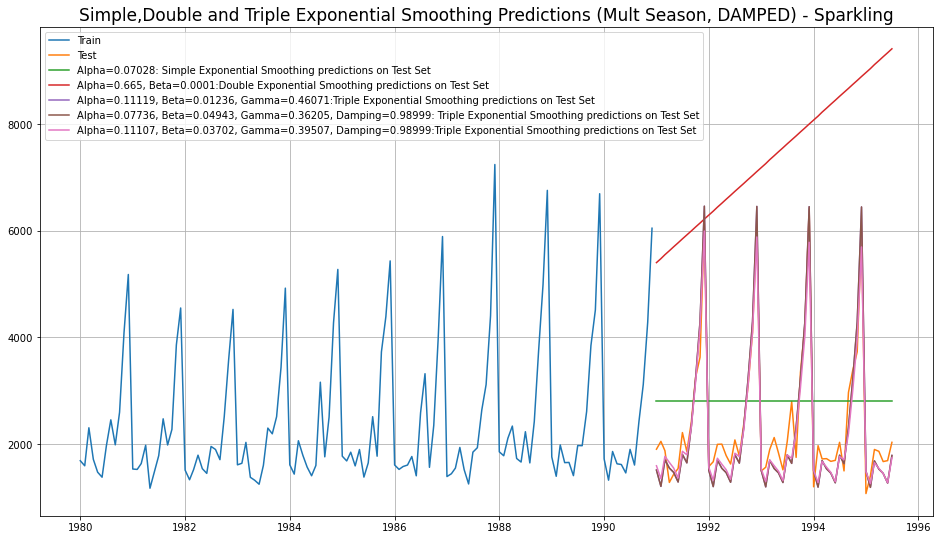

In [192]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha=0.07028: Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665, Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_spark, label='Alpha=0.11119, Beta=0.01236, Gamma=0.46071:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_spark, label='Alpha=0.07736, Beta=0.04943, Gamma=0.36205, Damping=0.98999: Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am_damp_spark, label='Alpha=0.11107, Beta=0.03702, Gamma=0.39507, Damping=0.98999:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (Mult Season, DAMPED) - Sparkling', fontsize=17);

plt.savefig('spark_mul_damp_tes.jpg', bbox_inches='tight');

# Report model accuracy

In [193]:
print('TES_am DAMPED RMSE_spark:',mean_squared_error(stest.values,TES_predict_am_damp_spark.values,squared=False))

TES_am DAMPED RMSE_spark: 352.4506803303484


In [194]:
# resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
#                            ,index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
# resultsDf

resultsDf_temp1 = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,TES_predict_am_damp_spark.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Multiplicative Season, Damped Trend)'])



resultsDf_temp1

Test RMSE Sparkling
Triple Exponential Smoothing (Multiplicative Se...            352.45068

In [195]:
resultsDf13 = resultsDf_temp.join(resultsDf_temp1, how='outer')
resultsDf13

Test RMSE Rose  \
Triple Exponential Smoothing (Multiplicative Se...       26.048381   

                                                    Test RMSE Sparkling  
Triple Exponential Smoothing (Multiplicative Se...            352.45068

In [196]:
resultsDf14 = pd.concat([resultsDf, resultsDf13], axis=0)
resultsDf14

Test RMSE Rose  \
RegressionOnTime                                         15.268955   
NaiveModel                                               79.718773   
SimpleAverageModel                                       53.460570   
2pointTrailingMovingAverage                              11.529278   
4pointTrailingMovingAverage                              14.451403   
6pointTrailingMovingAverage                              14.566327   
9pointTrailingMovingAverage                              14.727630   
Simple Exponential Smoothing                             36.796232   
Double Exponential Smoothing                             15.268954   
Triple Exponential Smoothing (Additive Season)           14.260138   
Triple Exponential Smoothing (Multiplicative Se...       20.333400   
Triple Exponential Smoothing (Additive Season, ...       31.288602   
Triple Exponential Smoothing (Multiplicative Se...       26.048381   

                                                    Test RMSE Sparkling  
RegressionOnTime                                            1389.135175  
NaiveModel                                                  3864.279352  
SimpleAverageModel                                          1275.081804  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
Simple Exponential Smoothing                                1338.011528  
Double Exponential Smoothing                                5291.879833  
Triple Exponential Smoothing (Additive Season)               380.094750  
Triple Exponential Smoothing (Multiplicative Se...           402.946854  
Triple Exponential Smoothing (Additive Season, ...           380.094750  
Triple Exponential Smoothing (Multiplicative Se...           352.450680

In [197]:
resultsDf = resultsDf14.copy()
resultsDf

Test RMSE Rose  \
RegressionOnTime                                         15.268955   
NaiveModel                                               79.718773   
SimpleAverageModel                                       53.460570   
2pointTrailingMovingAverage                              11.529278   
4pointTrailingMovingAverage                              14.451403   
6pointTrailingMovingAverage                              14.566327   
9pointTrailingMovingAverage                              14.727630   
Simple Exponential Smoothing                             36.796232   
Double Exponential Smoothing                             15.268954   
Triple Exponential Smoothing (Additive Season)           14.260138   
Triple Exponential Smoothing (Multiplicative Se...       20.333400   
Triple Exponential Smoothing (Additive Season, ...       31.288602   
Triple Exponential Smoothing (Multiplicative Se...       26.048381   

                                                    Test RMSE Sparkling  
RegressionOnTime                                            1389.135175  
NaiveModel                                                  3864.279352  
SimpleAverageModel                                          1275.081804  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
Simple Exponential Smoothing                                1338.011528  
Double Exponential Smoothing                                5291.879833  
Triple Exponential Smoothing (Additive Season)               380.094750  
Triple Exponential Smoothing (Multiplicative Se...           402.946854  
Triple Exponential Smoothing (Additive Season, ...           380.094750  
Triple Exponential Smoothing (Multiplicative Se...           352.450680

In [198]:
resultsDf.to_csv('results_all.csv')

# Best Model for Rose till Now - 2 Pt Moving Average

In [199]:
MovingAverage = dfr.copy()
MovingAverage.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [200]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()

MovingAverage.head()

Rose  Trailing_2
YearMonth                    
1980-01-01  112.0         NaN
1980-02-01  118.0       115.0
1980-03-01  129.0       123.5
1980-04-01   99.0       114.0
1980-05-01  116.0       107.5

In [201]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

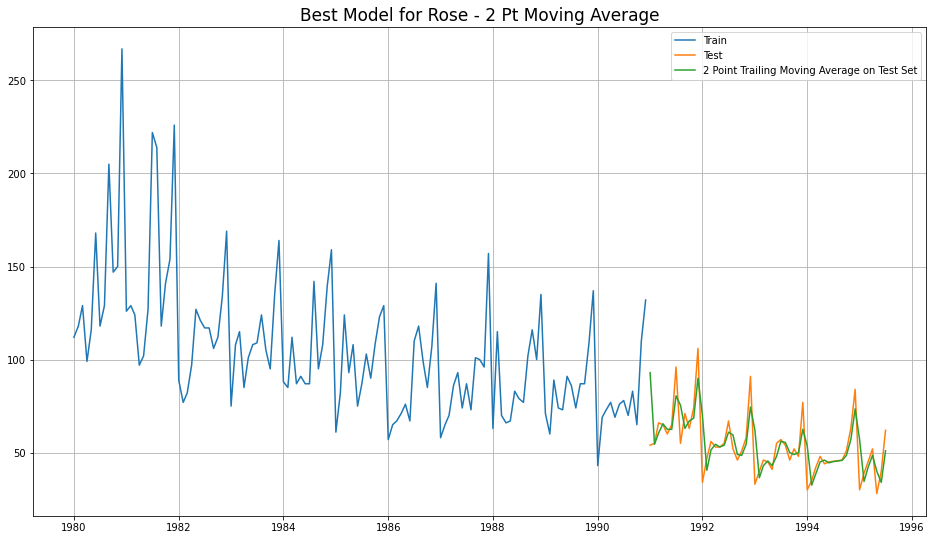

In [202]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,9))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')


plt.legend(loc = 'best')
plt.grid();
plt.title('Best Model for Rose - 2 Pt Moving Average', fontsize=17);
plt.savefig('rose_best_model_2pt.jpg', bbox_inches='tight');


# Holt-Winters - ETS(A, A, M) - Best Model for Sparkling Till Now
# ETS(A, Ad, M) model - Taking MULTIPLICATIVE SEASONALITY
# USING DAMPED TREND

In [203]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(strain,trend='add',seasonal='multiplicative',initialization_method='estimated', damped_trend=True)
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11105776808910008, 'smoothing_trend': 0.03701467953928387, 'smoothing_seasonal': 0.3951465520651352, 'damping_trend': 0.9900005990438873, 'initial_level': 2356.502304668066, 'initial_trend': -9.959899234858556, 'initial_seasons': array([0.71341355, 0.68453159, 0.89921864, 0.80453762, 0.65335604,
       0.65429336, 0.88001361, 1.12216915, 0.91377675, 1.19153616,
       1.85120971, 2.3409672 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [204]:
# Forecasting using this model for the duration of the test set
TES_predict_am_damp_spark =  model_TES_am.forecast(len(stest))
TES_predict_am_damp_spark

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01    1591.422684
1991-02-01    1348.068825
1991-03-01    1768.339308
1991-04-01    1654.034411
1991-05-01    1548.111391
1991-06-01    1363.570703
1991-07-01    1862.859255
1991-08-01    1797.283539
1991-09-01    2310.542781
1991-10-01    3163.678081
1991-11-01    4176.957426
1991-12-01    5994.294057
1992-01-01    1558.917457
1992-02-01    1320.760401
1992-03-01    1732.812134
1992-04-01    1621.077712
1992-05-01    1517.520007
1992-06-01    1336.848882
1992-07-01    1826.655500
1992-08-01    1762.644235
1992-09-01    2266.381734
1992-10-01    3103.714951
1992-11-01    4098.449660
1992-12-01    5882.570405
1993-01-01    1530.105106
1993-02-01    1296.554452
1993-03-01    1701.321156
1993-04-01    1591.865180
1993-05-01    1490.404070
1993-06-01    1313.162893
1993-07-01    1794.564806
1993-08-01    1731.940258
1993-09-01    2227.237765
1993-10-01    3050.564153
1993-11-01    4028.861058
1993-12-01    5783.539531
1994-01-01    1504.566089
1994-02-01    1275.098508
1994-03-01  

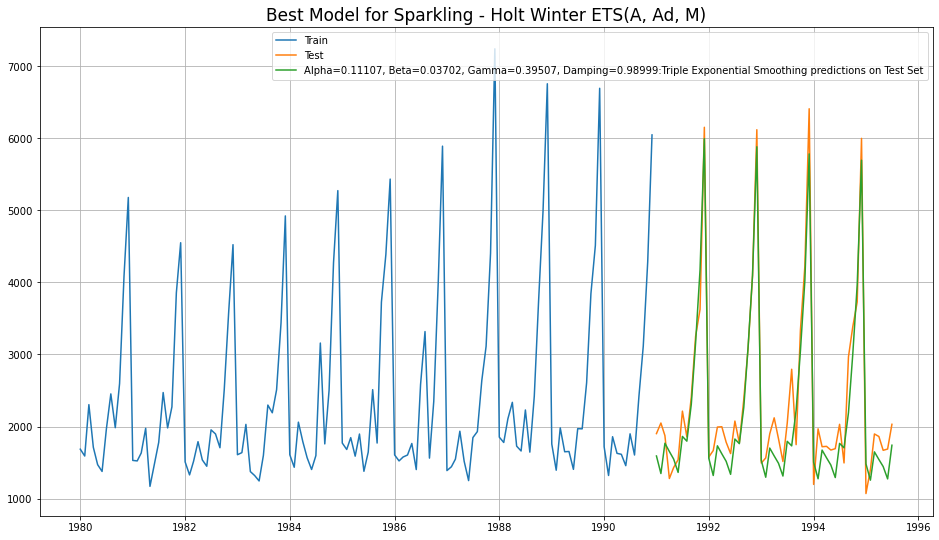

In [205]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(TES_predict_am_damp_spark, label='Alpha=0.11107, Beta=0.03702, Gamma=0.39507, Damping=0.98999:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Best Model for Sparkling - Holt Winter ETS(A, Ad, M)', fontsize=17);

plt.savefig('spark_best_model.jpg', bbox_inches='tight');

# Check Stationarity of ROSE Data

In [206]:
from statsmodels.tsa.stattools import adfuller

In [207]:
dfrs = adfuller(dfr,regression='ct')
print('DF test statistic is %3.3f' %dfrs[0])
print('DF test p-value is' ,dfrs[1])
print('Number of lags used' ,dfrs[2])

DF test statistic is -2.240
DF test p-value is 0.4671371627793081
Number of lags used 13


In [208]:
dfrs = adfuller(dfr.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dfrs[0])
print('DF test p-value is' ,dfrs[1])
print('Number of lags used' ,dfrs[2])

DF test statistic is -8.162
DF test p-value is 3.0159761158268473e-11
Number of lags used 12


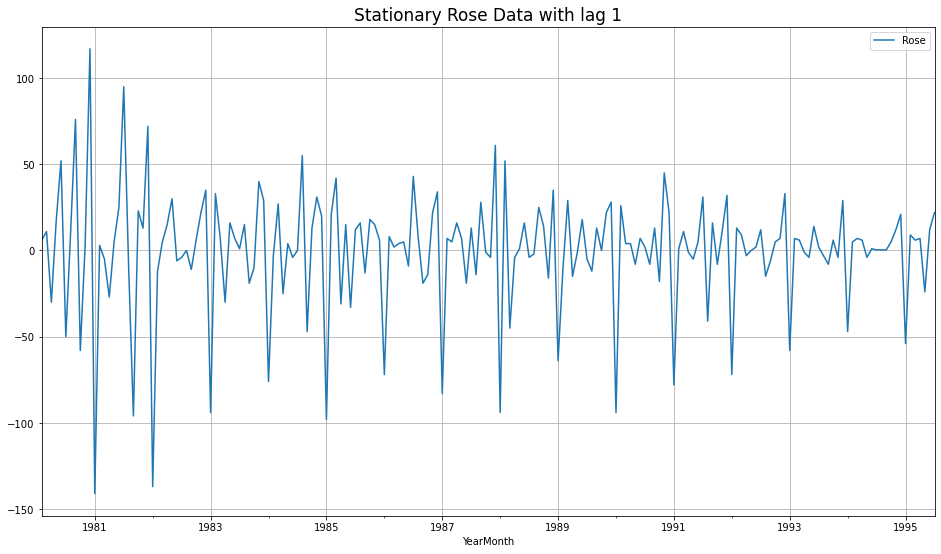

In [209]:
dfr.diff().dropna().plot(grid=True);
plt.title('Stationary Rose Data with lag 1', fontsize=17);
plt.savefig('rose_stationary.jpg', bbox_inches='tight');

# Check Stationarity of SPARKLING Data

In [210]:
dfss = adfuller(dfs,regression='ct')
print('DF test statistic is %3.3f' %dfss[0])
print('DF test p-value is' ,dfss[1])
print('Number of lags used' ,dfss[2])

DF test statistic is -1.798
DF test p-value is 0.7055958459932559
Number of lags used 12


In [211]:
dfss = adfuller(dfs.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dfss[0])
print('DF test p-value is' ,dfss[1])
print('Number of lags used' ,dfss[2])

DF test statistic is -44.912
DF test p-value is 0.0
Number of lags used 10


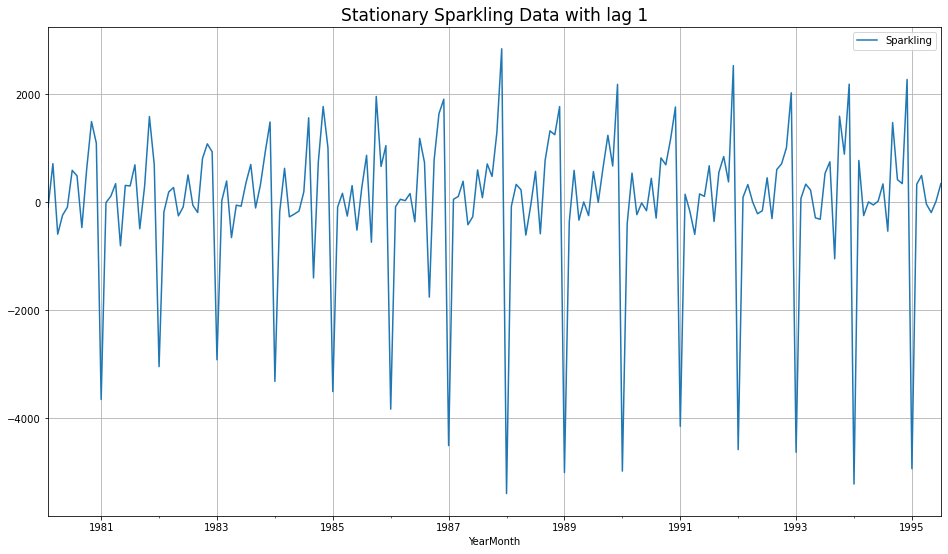

In [212]:
dfs.diff().dropna().plot(grid=True);
plt.title('Stationary Sparkling Data with lag 1', fontsize=17);
plt.savefig('spark_stationary.jpg', bbox_inches='tight');

# ARIMA / SARIMA on ROSE
# Check for Stationarity of Rose Train Data

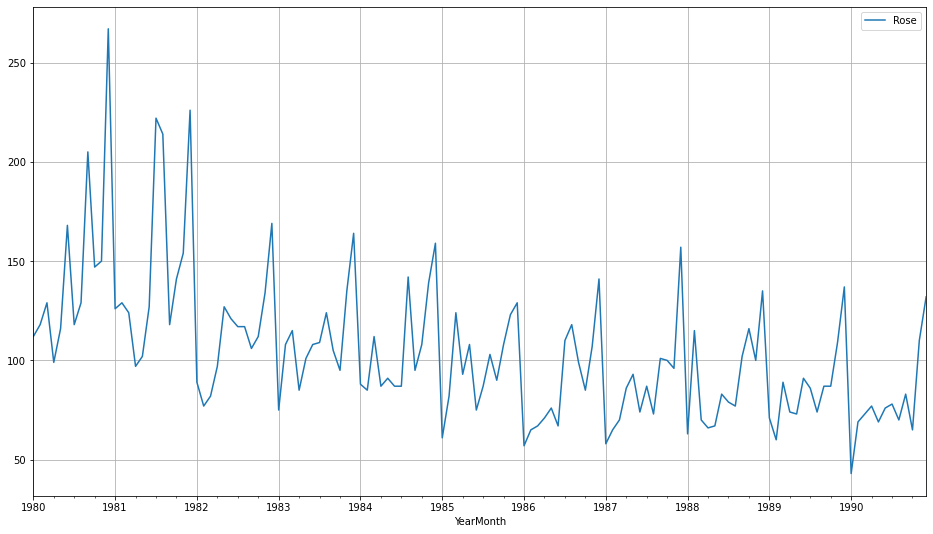

In [213]:
rtrain.plot(grid=True);

In [214]:
dftest = adfuller(rtrain,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.686
DF test p-value is 0.7569093051047109
Number of lags used 13


In [215]:
dftest = adfuller(rtrain.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -6.804
DF test p-value is 3.89483135678262e-08
Number of lags used 12


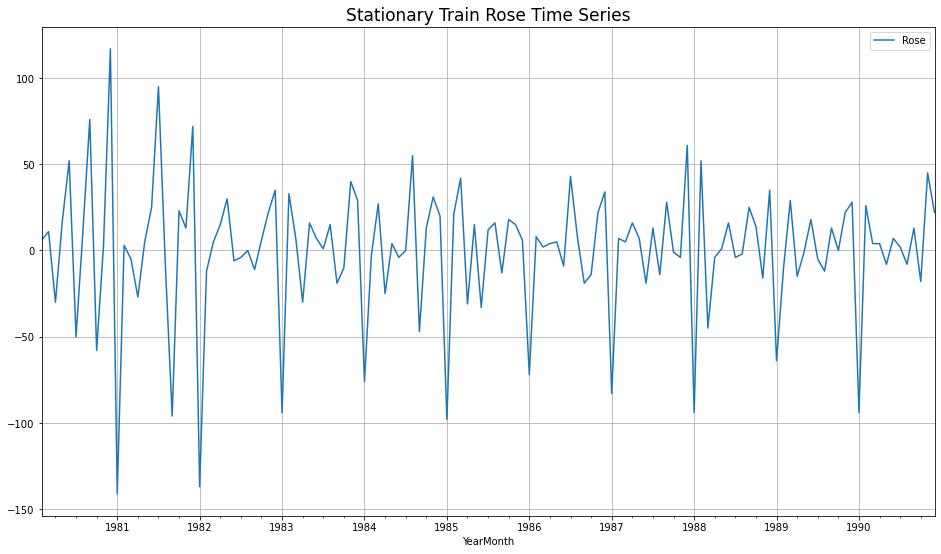

In [216]:
rtrain.diff().dropna().plot(grid=True);
plt.title('Stationary Train Rose Time Series', fontsize=17)
plt.savefig('rose_train_stationary.jpg', bbox_inches='tight');

In [217]:
rtrain.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


# Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [218]:
import itertools

p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))

print('Examples of the parameter combinations for the Model')

for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [219]:
# Creating an empty Dataframe with column names only
ROSE_ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ROSE_ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [220]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(rtrain['Rose'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ROSE_ARIMA_AIC = ROSE_ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748299
ARIMA(0, 1, 2) - AIC:1279.671528853576
ARIMA(0, 1, 3) - AIC:1280.5453761734661
ARIMA(1, 1, 0) - AIC:1317.3503105381506
ARIMA(1, 1, 1) - AIC:1280.574229538005
ARIMA(1, 1, 2) - AIC:1279.8707234231915
ARIMA(1, 1, 3) - AIC:1281.8707223309916
ARIMA(2, 1, 0) - AIC:1298.6110341605
ARIMA(2, 1, 1) - AIC:1281.507862186848
ARIMA(2, 1, 2) - AIC:1281.87072222647


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:1274.6951063063157
ARIMA(3, 1, 0) - AIC:1297.4810917271714
ARIMA(3, 1, 1) - AIC:1282.4192776271962


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 2) - AIC:1283.7207405977147
ARIMA(3, 1, 3) - AIC:1278.6587487479378


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [221]:
ROSE_ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
11  (2, 1, 3)  1274.695106
15  (3, 1, 3)  1278.658749
2   (0, 1, 2)  1279.671529
6   (1, 1, 2)  1279.870723
3   (0, 1, 3)  1280.545376

In [222]:
auto_ARIMA = ARIMA(rtrain, order=(2,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Sun, 23 Oct 2022   AIC                           1274.695
Time:                        17:03:49   BIC                           1291.946
Sample:                    01-01-1980   HQIC                          1281.705
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6776      0.084    -20.054      0.000      -1.842      -1.514
ar.L2         -0.7284      0.084     -8.706      0.000      -0.892      -0.564
ma.L1          1.0444      0.641      1.630      0.1

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Rose Train Diagnostics plot.

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


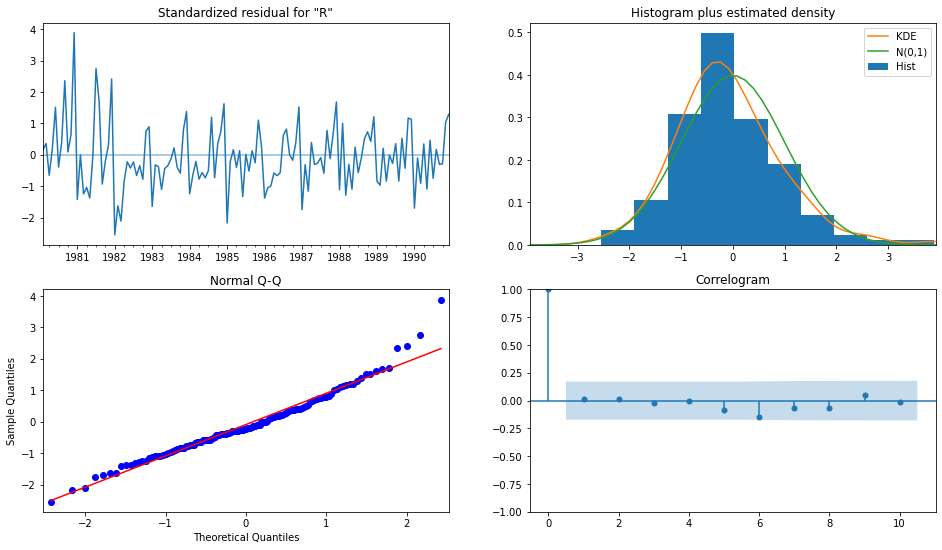

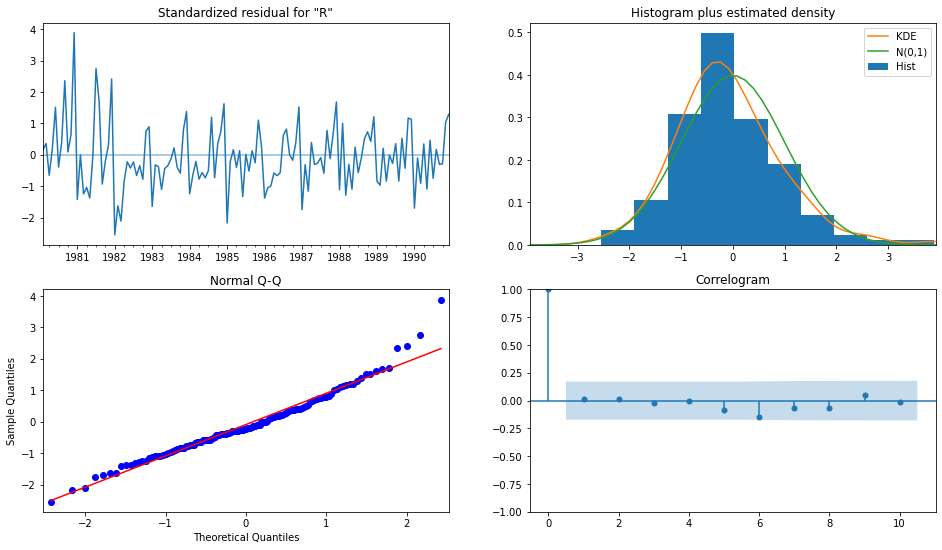

In [223]:
results_auto_ARIMA.plot_diagnostics();

plt.savefig('rose_diag_plot.jpg', bbox_inches='tight')

# Predict on the Rose Test Set using this model and evaluate the model.

In [224]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(rtest))
predicted_auto_ARIMA

1991-01-01    85.571985
1991-02-01    90.549567
1991-03-01    81.940632
1991-04-01    92.757087
1991-05-01    80.882493
1991-06-01    92.924195
1991-07-01    81.372930
1991-08-01    91.979718
1991-09-01    82.600128
1991-10-01    90.608965
1991-11-01    84.005764
1991-12-01    89.249377
1992-01-01    85.262693
1992-02-01    88.131127
1992-03-01    86.223077
1992-04-01    87.334558
1992-05-01    86.859823
1992-06-01    86.846602
1992-07-01    87.214590
1992-08-01    86.606888
1992-09-01    87.358311
1992-10-01    86.540398
1992-11-01    87.365164
1992-12-01    86.577335
1993-01-01    87.298207
1993-02-01    86.662755
1993-03-01    87.203681
1993-04-01    86.759109
1993-05-01    87.110893
1993-06-01    86.844582
1993-07-01    87.035094
1993-08-01    86.909481
1993-09-01    86.981434
1993-10-01    86.952226
1993-11-01    86.948813
1993-12-01    86.975815
1994-01-01    86.933003
1994-02-01    86.985155
1994-03-01    86.928850
1994-04-01    86.985317
1994-05-01    86.931603
1994-06-01    86

In [225]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100



from sklearn.metrics import mean_squared_error

In [226]:
rmse = mean_squared_error(rtest['Rose'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 36.80720044498291 
MAPE: 75.8264024399476


In [227]:
resultsR0 = pd.DataFrame({'Test RMSE Rose': rmse,'Test MAPE Rose':mape}
                           ,index=['ARIMA(2,1,3)'])

resultsR0.to_csv('rose_arima_auto_213.csv')
resultsR0


Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)         36.8072       75.826402

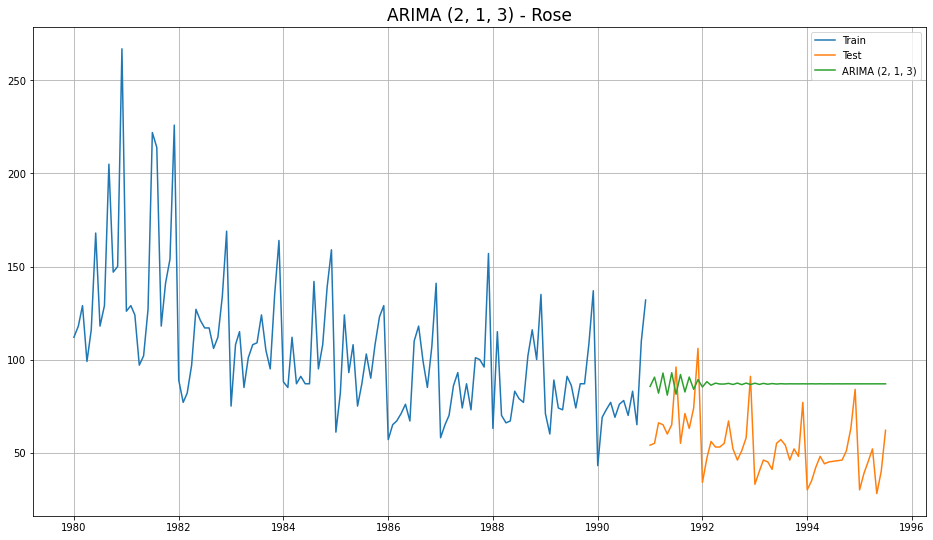

In [228]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')
plt.plot(predicted_auto_ARIMA,label='ARIMA (2, 1, 3)')


plt.legend(loc='best')
plt.grid()
plt.title('ARIMA (2, 1, 3) - Rose', fontsize=17);

plt.savefig('rose_arima_auto_213.jpg', bbox_inches='tight');

# Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots on ROSE dataset

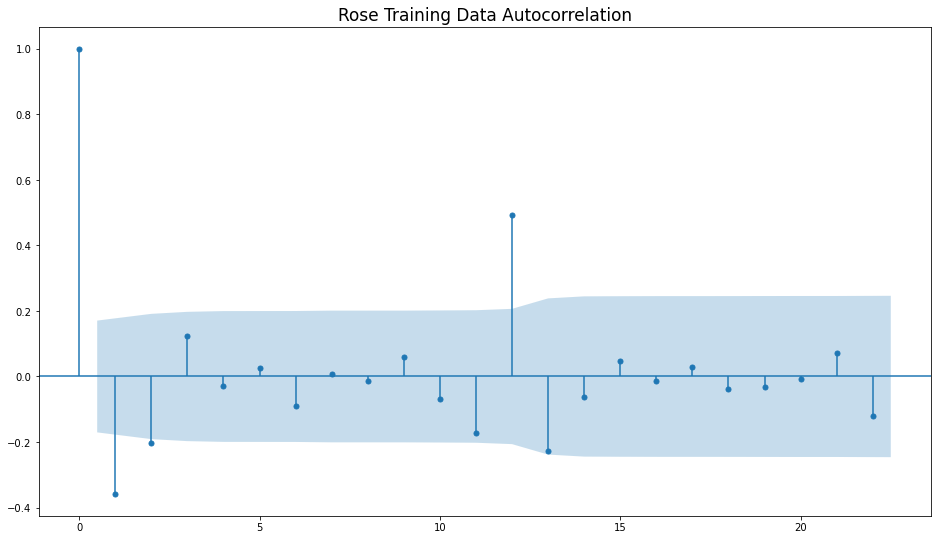

In [229]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(rtrain.diff(), missing='drop', alpha=0.05)
plt.title('Rose Training Data Autocorrelation',fontsize=17)
plt.savefig('rose_train_acf.jpg', bbox_inches='tight');

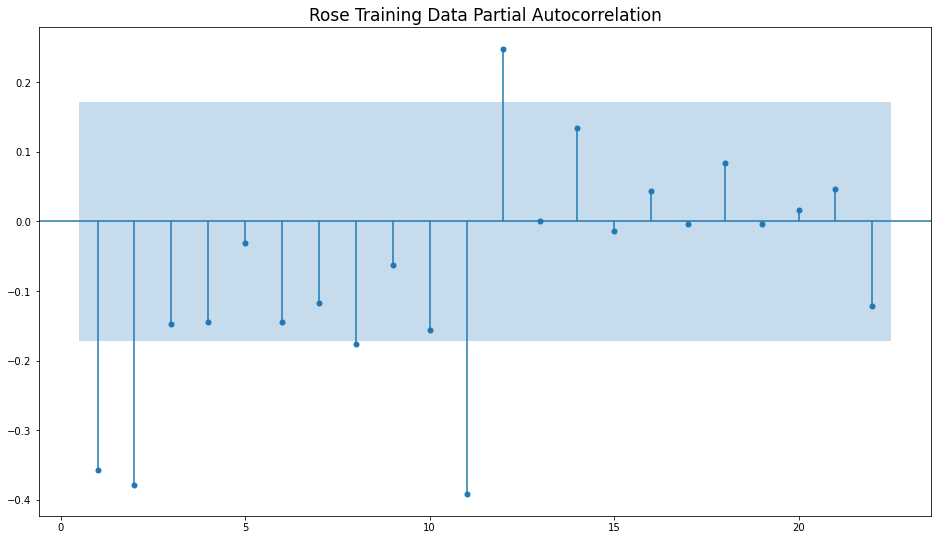

In [230]:
plot_pacf(rtrain.diff().dropna(), zero=False, alpha=0.05, method='ywmle')
plt.title('Rose Training Data Partial Autocorrelation',fontsize=17)
plt.savefig('rose_train_pacf.jpg', bbox_inches='tight');

In [231]:
manual_ARIMA = ARIMA(rtrain['Rose'], order=(2,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Sun, 23 Oct 2022   AIC                           1281.871
Time:                        17:19:32   BIC                           1296.247
Sample:                    01-01-1980   HQIC                          1287.712
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


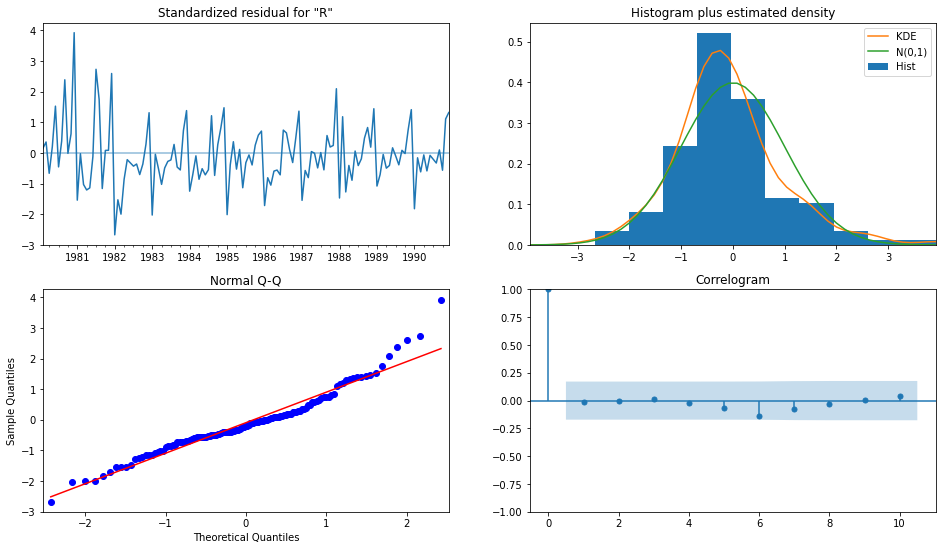

In [232]:
results_manual_ARIMA.plot_diagnostics();
plt.savefig('rose_train_manual_diag_plot.jpg', bbox_inches='tight');

# Predict on the Test Set using this model and evaluate the model.

In [233]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(rtest))

rmse = mean_squared_error(rtest['Rose'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 36.871196614518695 
MAPE: 76.05621270671195


In [234]:
temp_resultsR2 = pd.DataFrame({'Test RMSE Rose': rmse,'Test MAPE Rose':mape}
                           ,index=['ARIMA(2,1,2)'])


resultsR2 = pd.concat([resultsR0,temp_resultsR2])

resultsR2

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)       36.807200       75.826402
ARIMA(2,1,2)       36.871197       76.056213

In [235]:
resultsR0 = resultsR2.copy()
resultsR0

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)       36.807200       75.826402
ARIMA(2,1,2)       36.871197       76.056213

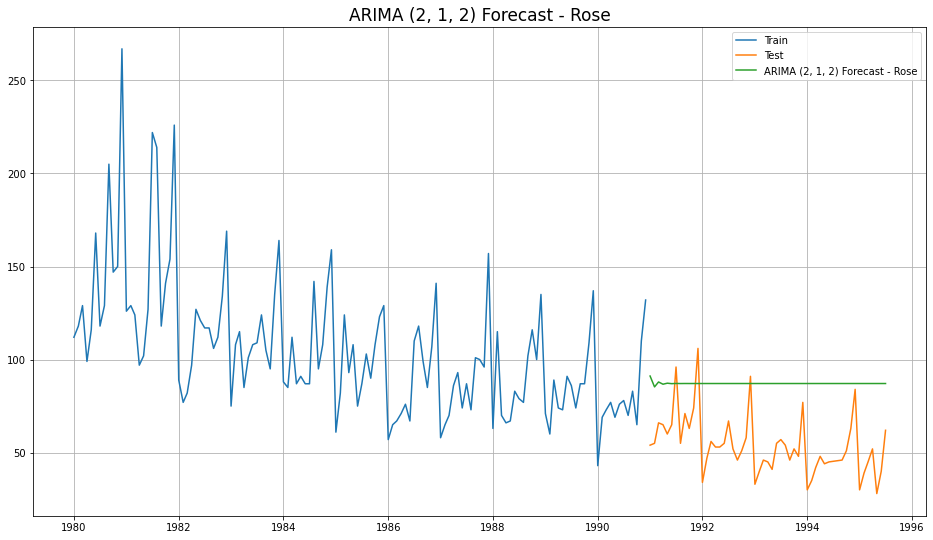

In [236]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(predicted_manual_ARIMA, label = 'ARIMA (2, 1, 2) Forecast - Rose')
plt.grid()
plt.legend(loc='best')
plt.title('ARIMA (2, 1, 2) Forecast - Rose', fontsize=17)
plt.savefig('rose_arima_manual_forecast.jpg', bbox_inches='tight');

# Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC) - ROSE DATA

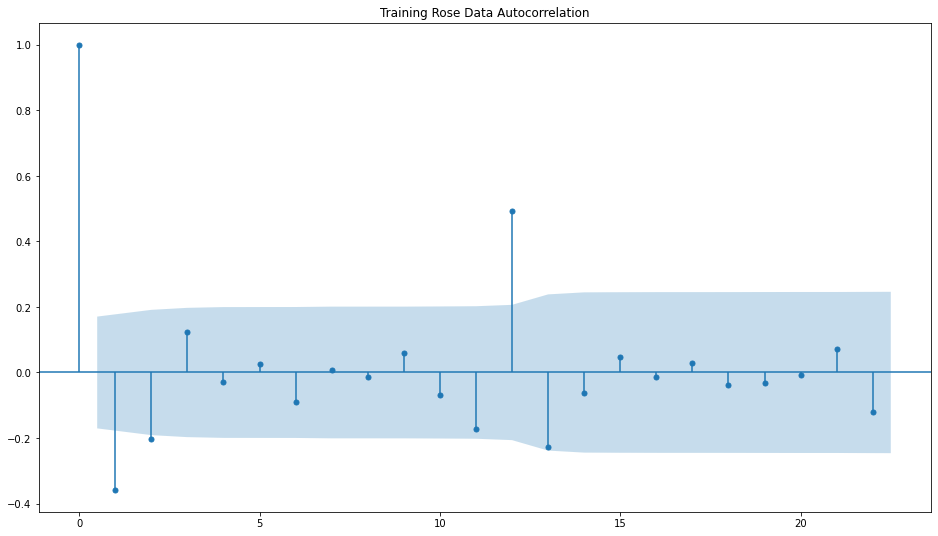

In [237]:
plot_acf(rtrain.diff(),title='Training Rose Data Autocorrelation',missing='drop');

In [238]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [239]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [240]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(rtrain['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.423082720741
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.43752963809


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:4441.3056889148875
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869385133
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635753112
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:3774.565757801818
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.879454069755
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945764


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:3814.508379445856
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:850.7535403931095
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:851.7482702698486
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:850.530413612786


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3458.632221761598
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383964
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918343
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383737


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:3820.746725151415
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.7936324918273
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.743433094719
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483303473


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:4132.766477633027
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866535973
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461663
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988258382839


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:3693.6004733014947
SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:798.588976479386
SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:800.4844934817071
SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:801.0595269443235


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:3495.3372746119226
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:1251.6675430541052
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1083.486697526497
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:913.4938486617701


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:4302.130467002464
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1088.8332843414253
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1045.5400933535266
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:904.8310913485986


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:1016.8345296601079
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:913.0105912257999
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:914.1707545027051
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:887.9375085679541


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:2335.8365345906655
SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:800.1020189374232
SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:801.9941080535631
SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:802.5206528326577


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:2274.7511354470903
SARIMA(0, 1, 3)x(0, 0, 0, 12) - AIC:1243.9501216739136
SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:1076.7632646076015
SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:905.6926533380695


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:3799.394860480578
SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:1089.205136121224
SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:1034.8411212938086
SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:896.8362523340496


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:3565.229364778078
SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:914.9477108987026
SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:916.0630996892532
SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:880.550978825272


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:3662.5738221301644
SARIMA(0, 1, 3)x(3, 0, 0, 12) - AIC:802.0987124751391
SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:803.9928772328569
SARIMA(0, 1, 3)x(3, 0, 2, 12) - AIC:804.5150726833821


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:3435.1924947505718
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:1308.161871082466
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1135.2955447585703
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:963.9405391257692


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:3672.3050400090806
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1124.8860786804594
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1105.408005502875
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:958.5001972948131


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:3015.576804357171
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:939.0984778664081
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:940.9087133661066
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:942.2973103071405


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:3525.6008945060603
SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:819.3931032272698
SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:821.1501371573643
SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:819.1305086823037


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:3324.479981069831
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:1262.1840064255512
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1094.3172708640805
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:923.0862224063865


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:3899.997742361707
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1083.3937965031946
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1054.7180547135663
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:916.354942851076


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:1256.9206835939378
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:905.9249060841053
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:907.2972867470754
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:900.67257959368
SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:3799.188493265066
SARIMA(1, 1, 1)x(3, 0, 0, 12) - AIC:789.2360439384252
SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:790.9603447859181
SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:790.811385026396
SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:3600.9213682142126
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:1251.9495040706083
SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1085.4861928100938
SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:915.4938402564023


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:3691.3385371318027
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1090.7760923415676
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1042.6183211372638
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:906.7318502445277
SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:3357.6779650626063
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:906.1690196755776
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:907.4597827696248
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:896.6871902939635


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:3685.9101938267036
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:791.0073801447297
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:792.631280993009
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:792.1390251510243


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:3489.8259054568002
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:1245.54631253163
SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:1072.9849805091133
SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:907.4130105114943


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:3493.9523540618984
SARIMA(1, 1, 3)x(1, 0, 0, 12) - AIC:1082.3281487676193
SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:1036.1950939938342
SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:897.5232299812427


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:1301.5767118988445
SARIMA(1, 1, 3)x(2, 0, 0, 12) - AIC:908.2687616782426
SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:909.7955659515079
SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:880.2886595371962


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:2656.4787384152955
SARIMA(1, 1, 3)x(3, 0, 0, 12) - AIC:792.9903134048451
SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:794.6310142996815
SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:794.0467940828485


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:3411.2608112840876
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:1280.253756153577
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1128.7773704711353
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:958.0793208829942


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:3053.391517562761
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1099.5086021575928
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1076.7863198641144
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:951.1988165559188
SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:3827.8065465557743
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:924.6004792645292
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:925.9757801383793
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:927.8380693280808
SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:3839.867939428878
SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:806.0536407409256
SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:808.047263790361
SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:806.4988191371942


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:3856.8339107310853
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:1263.2315231798757
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1094.2093491949367
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:922.9408472070285


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:3888.9352339328066
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1071.4249601101487
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1052.9244471207455
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:916.242491282261
SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:3813.2081827566503
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:896.5181608103718
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:897.6399565369351
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:899.4835866290438


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:3604.863995996268
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:785.3932600261401
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:787.3639259195668
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:787.0598887503963


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:3507.429714559177
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1253.9102116146664
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1085.964355259822
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:916.3258311119025


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:3627.0408598728995
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1073.2912713702683
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1044.1909354389918
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:907.6661488800573


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:400.89336985905214
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:897.3464441947588
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:898.3781891281805
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:890.668798085787


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:3001.3886479276953
SARIMA(2, 1, 2)x(3, 0, 0, 12) - AIC:785.1199711927744
SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:786.9410035320682
SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:786.9640485979115


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:3045.0356767218245
SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:1237.8702989907188
SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:1067.8073333342018
SARIMA(2, 1, 3)x(0, 0, 2, 12) - AIC:908.3349281968277


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:3836.2119799242355
SARIMA(2, 1, 3)x(1, 0, 0, 12) - AIC:1073.2563226603725
SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1024.0462187461144
SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:890.9483345636344
SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:3140.755570913736
SARIMA(2, 1, 3)x(2, 0, 0, 12) - AIC:893.3579301548992
SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:903.2328071120894
SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:879.2191806576066


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:3732.418740269025
SARIMA(2, 1, 3)x(3, 0, 0, 12) - AIC:782.4074207954596
SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:783.4101469767461
SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:781.0452514789829


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:3520.763717841523
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:1269.8130062641503
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:1119.1703158042233
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:953.3440589118014


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:3940.239525782615
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:1080.5468456726007
SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:1065.5569726784267
SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:943.6865996304623


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:3390.2863002017552
SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:909.720319789393
SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:911.0620713976491
SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:913.0438816472906
SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:3841.8679394288783
SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:796.0564701526829
SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:795.5410167663968
SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:794.6677017218898


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:3501.9675627290517
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:1255.0658180709408
SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:1095.6894641208803
SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:923.8872427547204
SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:3695.3568628357034
SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:1064.6149136513266
SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1046.0837554123748
SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:917.0308009384289
SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:3684.282962273796
SARIMA(3, 1, 1)x(2, 0, 0, 12) - AIC:887.3204459899113
SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:888.3279208538213
SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:890.1571523187031


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:3606.863995994146
SARIMA(3, 1, 1)x(3, 0, 0, 12) - AIC:775.4266990277616
SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:775.4953300798761
SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:774.4002867726651


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:3717.805661535
SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:1255.98356564684
SARIMA(3, 1, 2)x(0, 0, 1, 12) - AIC:1086.7092401300386
SARIMA(3, 1, 2)x(0, 0, 2, 12) - AIC:917.7980109835128


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:3837.1585961063565
SARIMA(3, 1, 2)x(1, 0, 0, 12) - AIC:1066.2776211195458
SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:1046.1260593827362
SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:909.2875122681378
SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:3996.667187222066
SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:889.3199705901279
SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:890.3277441334899
SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:896.1433628387305
SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:3838.078760068898
SARIMA(3, 1, 2)x(3, 0, 0, 12) - AIC:777.2505645034572
SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:776.3462180481189
SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:774.8809369121627


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:3724.8164156224775
SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:1243.7385879968638
SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:1060.5397660783417
SARIMA(3, 1, 3)x(0, 0, 2, 12) - AIC:910.334019424965


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:3689.335971021195
SARIMA(3, 1, 3)x(1, 0, 0, 12) - AIC:1066.8473328420555
SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1039.7662380641584
SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:900.0483662231347


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:6446.4957472023625
SARIMA(3, 1, 3)x(2, 0, 0, 12) - AIC:884.0463711753484
SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:885.9217137403195
SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:880.5595715596722
SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:3684.8773771609094
SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:775.5610184934034
SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:776.3690403212063
SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:778.2316181281485


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:2834.8253851398867


In [241]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
167  (2, 1, 2)  (1, 0, 3, 12)  400.893370
222  (3, 1, 1)  (3, 0, 2, 12)  774.400287
238  (3, 1, 2)  (3, 0, 2, 12)  774.880937
220  (3, 1, 1)  (3, 0, 0, 12)  775.426699
221  (3, 1, 1)  (3, 0, 1, 12)  775.495330

In [242]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(rtrain['Rose'],
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                        SARIMAX Results                                        
Dep. Variable:                                    Rose   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -377.200
Date:                                 Sun, 23 Oct 2022   AIC                            774.400
Time:                                         17:35:16   BIC                            799.618
Sample:                                     01-01-1980   HQIC                           784.578
                                          - 12-01-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0464      0.126      0.367      0.714      -0.201       0

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


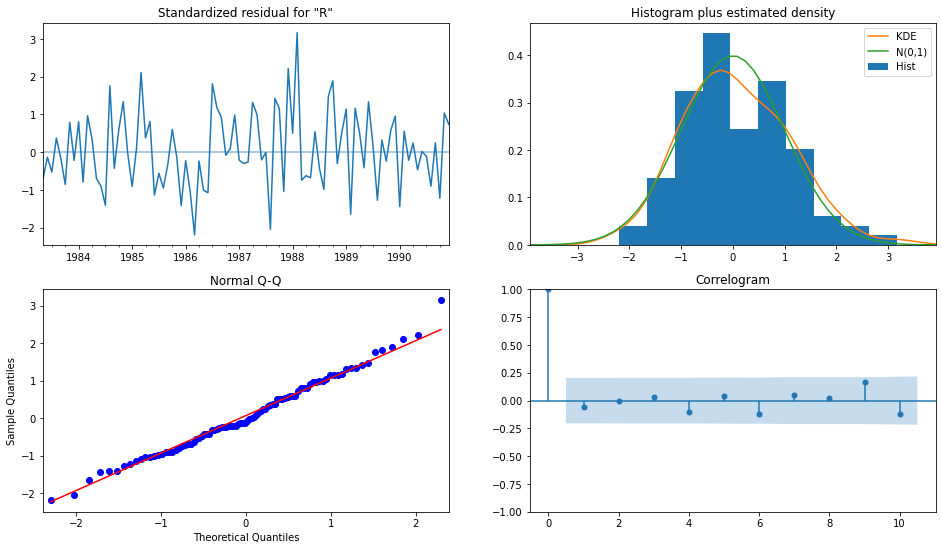

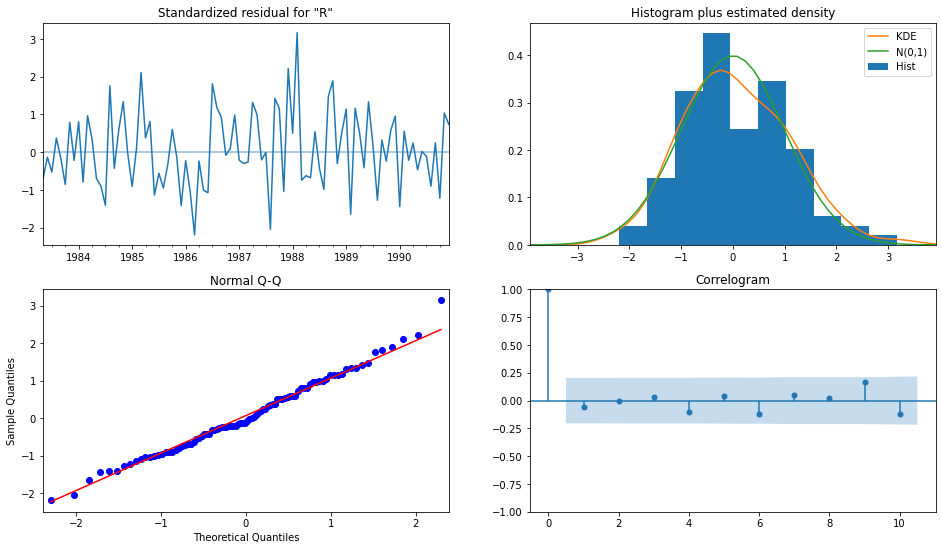

In [243]:
results_auto_SARIMA.plot_diagnostics();
plt.savefig('rose_sarima_auto_30212_diag_plot.jpg', bbox_inches='tight')

# Predict on the Test Set using this model and evaluate the model.

In [244]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(rtest))
predicted_auto_SARIMA1= results_auto_SARIMA.get_prediction(start=pd.to_datetime('1991-01-01'), dynamic=False)
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  55.234624  13.906858      27.977683      82.491566
1991-02-01  68.122377  13.990265      40.701961      95.542793
1991-03-01  67.908380  14.011295      40.446746      95.370013
1991-04-01  66.785614  14.098622      39.152823      94.418406
1991-05-01  69.760556  14.107981      42.109422      97.411690

In [245]:
predicted_auto_SARIMA1

In [246]:
rmse = mean_squared_error(rtest['Rose'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 18.881449115779237 
MAPE: 36.37444421934121


In [247]:
temp_resultsDf = pd.DataFrame({'Test RMSE Rose': rmse,'Test MAPE Rose':mape}
                           ,index=['SARIMA(3, 1, 1)(3, 0, 2, 12)'])


resultsDf = pd.concat([resultsR0,temp_resultsDf])

resultsDf

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)                       36.807200       75.826402
ARIMA(2,1,2)                       36.871197       76.056213
SARIMA(3, 1, 1)(3, 0, 2, 12)       18.881449       36.374444

In [248]:
resultsR0 = resultsDf.copy()
resultsR0.to_csv('rose_auto_sarima.csv')
resultsR0

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)                       36.807200       75.826402
ARIMA(2,1,2)                       36.871197       76.056213
SARIMA(3, 1, 1)(3, 0, 2, 12)       18.881449       36.374444

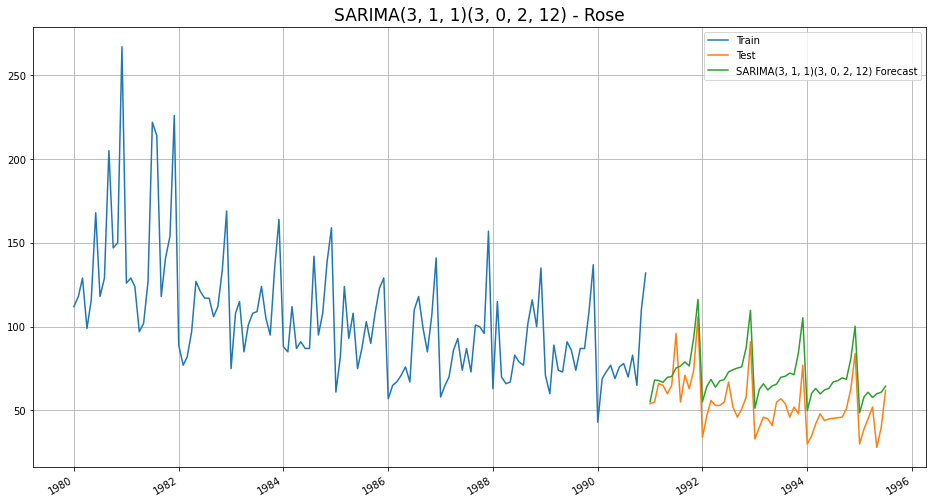

In [249]:

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')
# plt.plot(predicted_auto_SARIMA,label='SARIMA(3, 1, 1)(3, 0, 2, 12)')
# predicted_auto_SARIMA.plot(label='SARIMA(3, 1, 1)(3, 0, 2, 12)')
predicted_auto_SARIMA.predicted_mean.plot(label='SARIMA(3, 1, 1)(3, 0, 2, 12) Forecast')


plt.legend(loc='best')
plt.grid()
plt.title('SARIMA(3, 1, 1)(3, 0, 2, 12) - Rose', fontsize=17);

plt.savefig('rose_sarima_auto_30212.jpg', bbox_inches='tight');

# Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 12

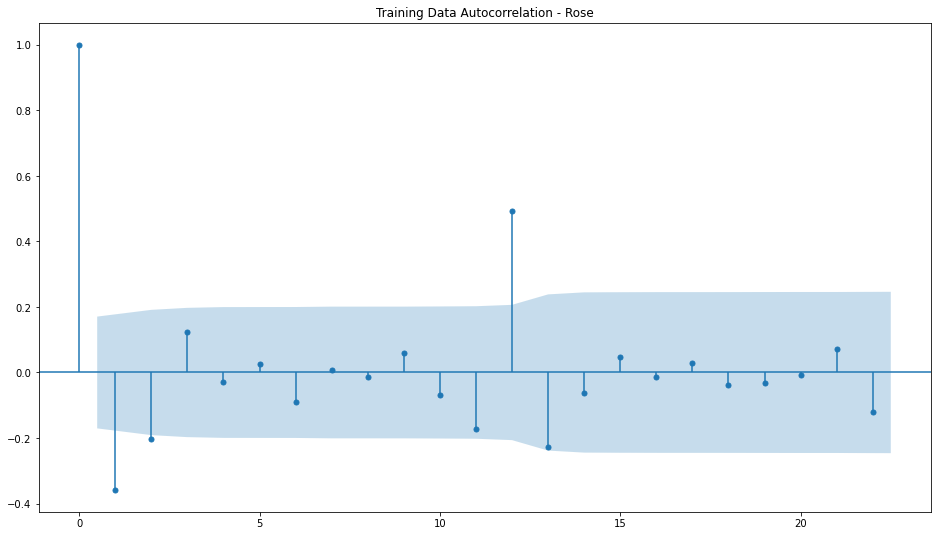

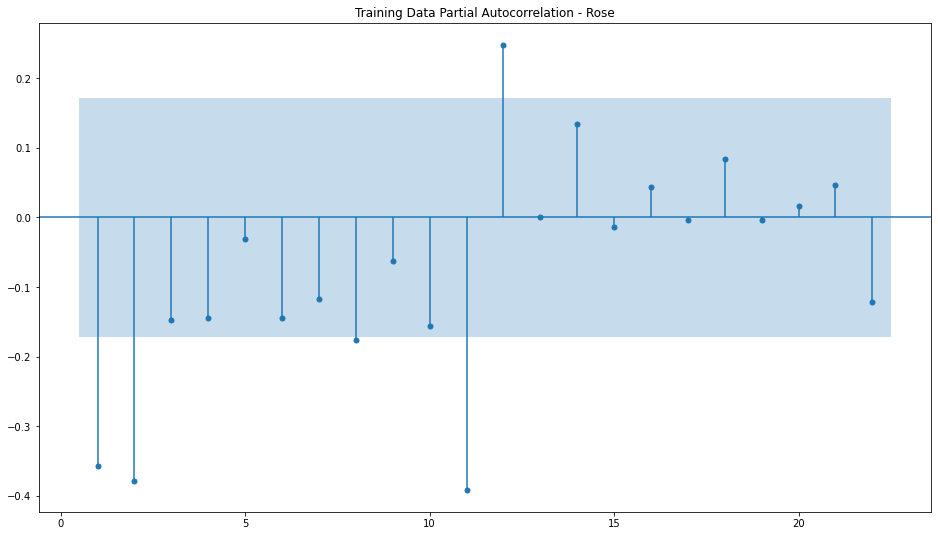

In [250]:
plot_acf(rtrain.diff(),title='Training Data Autocorrelation - Rose',missing='drop')
plot_pacf(rtrain.diff().dropna(),title='Training Data Partial Autocorrelation - Rose',zero=False,method='ywmle');

In [251]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(rtrain['Rose'],
                                order=(2,1,2),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -379.498
Date:                            Sun, 23 Oct 2022   AIC                            776.996
Time:                                    17:38:44   BIC                            799.692
Sample:                                01-01-1980   HQIC                           786.156
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8551      0.146     -5.837      0.000      -1.142      -0.568
ar.L2         -0.0022      0.125   

In [252]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(rtrain['Rose'],
                                order=(2,1,2),
                                seasonal_order=(3, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA1 = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA1.summary())

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(3, 1, 2, 12)   Log Likelihood                -334.893
Date:                            Sun, 23 Oct 2022   AIC                            689.786
Time:                                    17:40:01   BIC                            713.730
Sample:                                01-01-1980   HQIC                           699.393
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7089      0.403      1.759      0.079      -0.081       1.499
ar.L2         -0.1500      0.175   

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


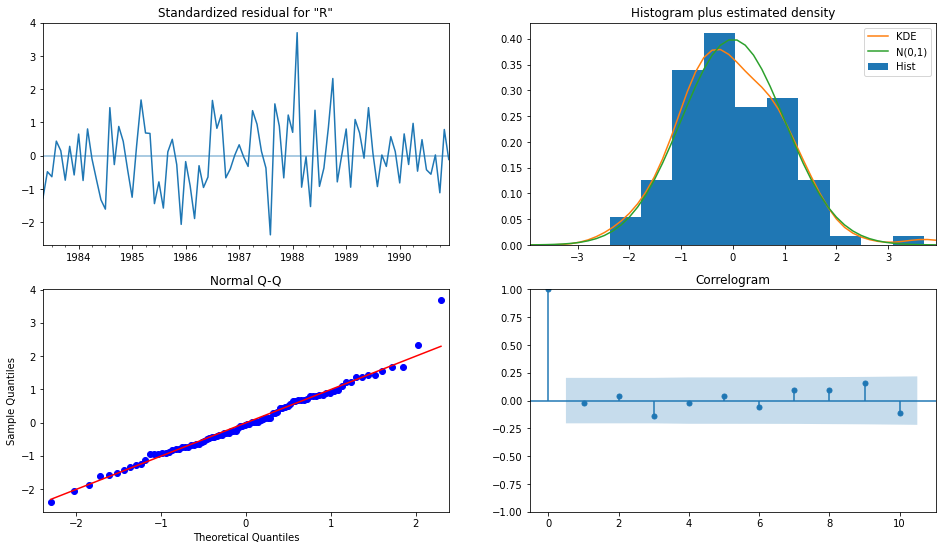

In [253]:
results_manual_SARIMA.plot_diagnostics()
plt.savefig('rose_sarima_21212.jpg', bbox_inches='tight');

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


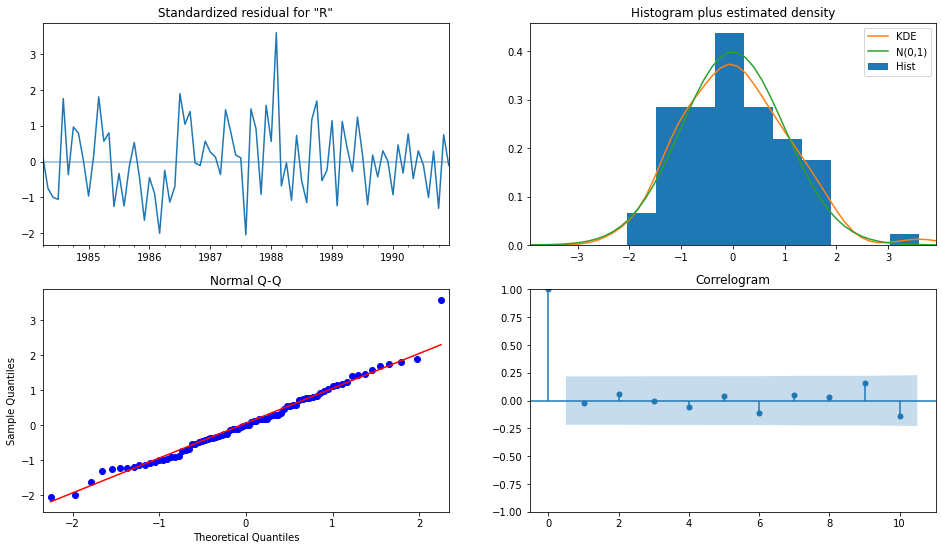

In [254]:
results_manual_SARIMA1.plot_diagnostics()
plt.savefig('rose_sarima_31212.jpg', bbox_inches='tight');

In [255]:
# Predict on the Test Set using this model and evaluate the model.
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(rtest))
                                                             
predicted_manual_SARIMA1 = results_manual_SARIMA1.get_forecast(steps=len(rtest))
rmse = mean_squared_error(rtest['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 16.55115987909247 
MAPE: 25.478162594156036


In [256]:
rmse = mean_squared_error(rtest['Rose'],predicted_manual_SARIMA1.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_manual_SARIMA1.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 15.362592874291735 
MAPE: 22.970224835425824


In [257]:
temp_resultsDf = pd.DataFrame({'Test RMSE Rose': [rmse],'Test MAPE Rose':mape}
                           ,index=['SARIMA(2,1,2)(3,1,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)                       36.807200       75.826402
ARIMA(2,1,2)                       36.871197       76.056213
SARIMA(3, 1, 1)(3, 0, 2, 12)       18.881449       36.374444
SARIMA(2,1,2)(3,1,2,12)            15.362593       22.970225

In [258]:
resultsR0 = resultsDf.copy()

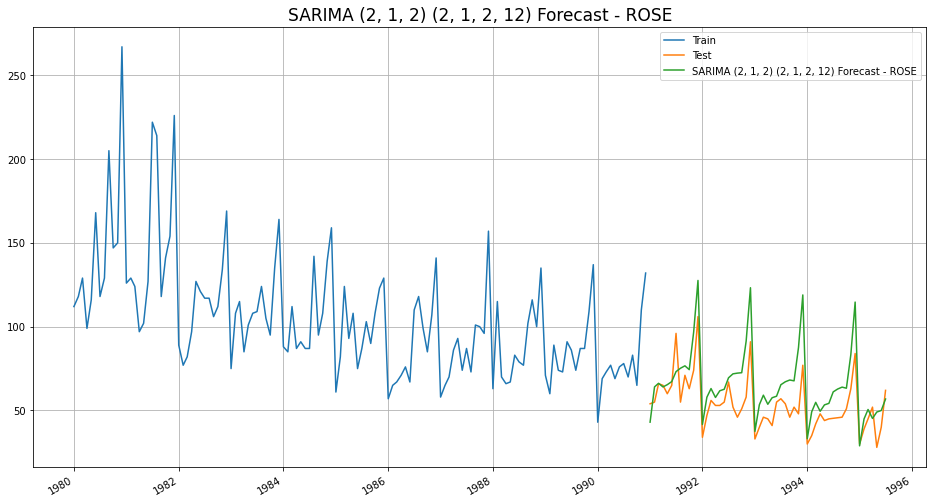

In [259]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label ='Test')

predicted_manual_SARIMA.predicted_mean.plot(label = 'SARIMA (2, 1, 2) (2, 1, 2, 12) Forecast - ROSE')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (2, 1, 2) (2, 1, 2, 12) Forecast - ROSE', fontsize=17)
plt.savefig('rose_sarima_manual_forecast.jpg', bbox_inches='tight');

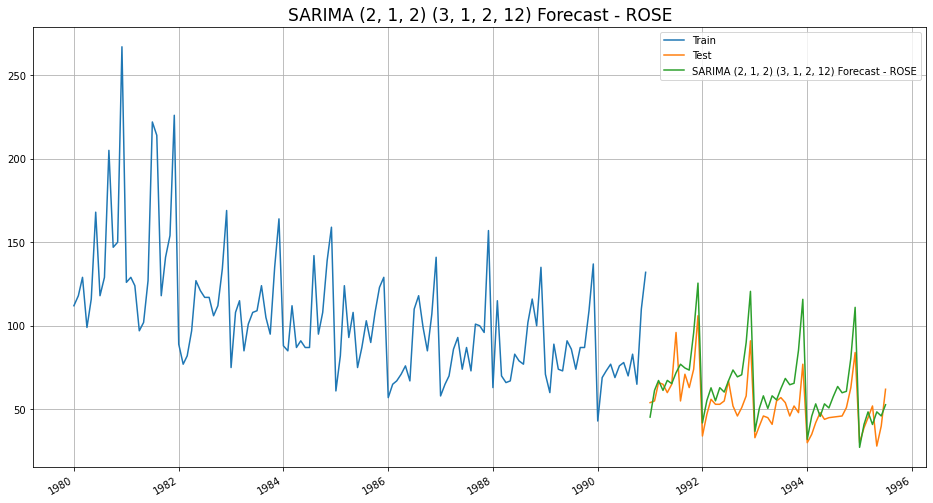

In [260]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label ='Test')

predicted_manual_SARIMA1.predicted_mean.plot(label = 'SARIMA (2, 1, 2) (3, 1, 2, 12) Forecast - ROSE')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (2, 1, 2) (3, 1, 2, 12) Forecast - ROSE', fontsize=17)
plt.savefig('rose_sarima_manual_forecast1.jpg', bbox_inches='tight');

In [261]:
# Building the most optimum model on the Full Data.


full_data_model = sm.tsa.statespace.SARIMAX(dfr['Rose'],
                                order=(2,1,2),
                                seasonal_order=(2,1,2,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -587.531
Date:                            Sun, 23 Oct 2022   AIC                           1193.062
Time:                                    17:49:40   BIC                           1219.976
Sample:                                01-01-1980   HQIC                          1203.997
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8649      0.101     -8.558      0.000      -1.063      -0.667
ar.L2          0.0340      0.091   

# Evaluate the model on the whole data and predict 12 months into the future

In [262]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  43.083363  12.674064      18.242654      67.924071
1995-09-01  43.341540  12.959890      17.940622      68.742457
1995-10-01  45.826600  12.963893      20.417836      71.235363
1995-11-01  57.396767  13.124588      31.673046      83.120488
1995-12-01  85.074205  13.133423      59.333169     110.815241

In [263]:
rmse = mean_squared_error(dfr['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 35.91129365182572


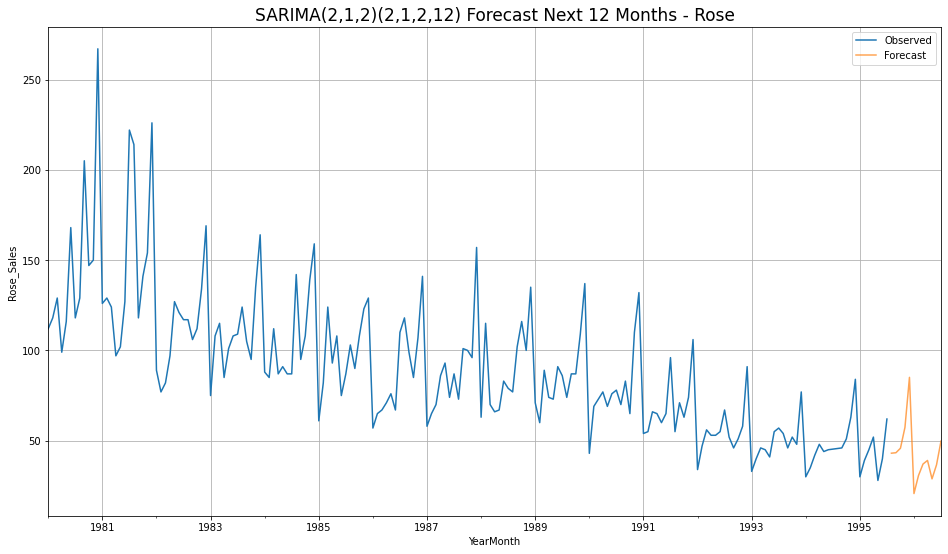

In [264]:
axis = dfr['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('YearMonth')
axis.set_ylabel('Rose_Sales')
plt.legend(loc='best')
plt.grid();
plt.title('SARIMA(2,1,2)(2,1,2,12) Forecast Next 12 Months - Rose', fontsize=17);
plt.savefig('rose_forecast.jpg', bbox_inches='tight');

In [265]:
resultsDf

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)                       36.807200       75.826402
ARIMA(2,1,2)                       36.871197       76.056213
SARIMA(3, 1, 1)(3, 0, 2, 12)       18.881449       36.374444
SARIMA(2,1,2)(3,1,2,12)            15.362593       22.970225

In [266]:
resultsR0 = resultsDf.copy()
resultsR0.to_csv('rose_all_arima.csv')
results_rose = pd.concat([resultsDf14, resultsR0], axis=0)
results_rose

Test RMSE Rose  \
RegressionOnTime                                         15.268955   
NaiveModel                                               79.718773   
SimpleAverageModel                                       53.460570   
2pointTrailingMovingAverage                              11.529278   
4pointTrailingMovingAverage                              14.451403   
6pointTrailingMovingAverage                              14.566327   
9pointTrailingMovingAverage                              14.727630   
Simple Exponential Smoothing                             36.796232   
Double Exponential Smoothing                             15.268954   
Triple Exponential Smoothing (Additive Season)           14.260138   
Triple Exponential Smoothing (Multiplicative Se...       20.333400   
Triple Exponential Smoothing (Additive Season, ...       31.288602   
Triple Exponential Smoothing (Multiplicative Se...       26.048381   
ARIMA(2,1,3)                                             36.807200   
ARIMA(2,1,2)                                             36.871197   
SARIMA(3, 1, 1)(3, 0, 2, 12)                             18.881449   
SARIMA(2,1,2)(3,1,2,12)                                  15.362593   

                                                    Test RMSE Sparkling  \
RegressionOnTime                                            1389.135175   
NaiveModel                                                  3864.279352   
SimpleAverageModel                                          1275.081804   
2pointTrailingMovingAverage                                  813.400684   
4pointTrailingMovingAverage                                 1156.589694   
6pointTrailingMovingAverage                                 1283.927428   
9pointTrailingMovingAverage                                 1346.278315   
Simple Exponential Smoothing                                1338.011528   
Double Exponential Smoothing                                5291.879833   
Triple Exponential Smoothing (Additive Season)               380.094750   
Triple Exponential Smoothing (Multiplicative Se...           402.946854   
Triple Exponential Smoothing (Additive Season, ...           380.094750   
Triple Exponential Smoothing (Multiplicative Se...           352.450680   
ARIMA(2,1,3)                                                        NaN   
ARIMA(2,1,2)                                                        NaN   
SARIMA(3, 1, 1)(3, 0, 2, 12)                                        NaN   
SARIMA(2,1,2)(3,1,2,12)                                             NaN   

                                                    Test MAPE Rose  
RegressionOnTime                                               NaN  
NaiveModel                                                     NaN  
SimpleAverageModel                                             NaN  
2pointTrailingMovingAverage                                    NaN  
4pointTrailingMovingAverage                                    NaN  
6pointTrailingMovingAverage                                    NaN  
9pointTrailingMovingAverage                                    NaN  
Simple Exponential Smoothing                                   NaN  
Double Exponential Smoothing                                   NaN  
Triple Exponential Smoothing (Additive Season)                 NaN  
Triple Exponential Smoothing (Multiplicative Se...             NaN  
Triple Exponential Smoothing (Additive Season, ...             NaN  
Triple Exponential Smoothing (Multiplicative Se...             NaN  
ARIMA(2,1,3)                                             75.826402  
ARIMA(2,1,2)                                             76.056213  
SARIMA(3, 1, 1)(3, 0, 2, 12)                             36.374444  
SARIMA(2,1,2)(3,1,2,12)                                  22.970225

In [267]:
results_rose.sort_values(by=['Test RMSE Rose']).to_csv('results_rose.csv')
resultsDf.sort_values(by=['Test RMSE Rose'])

Test RMSE Rose  Test MAPE Rose
SARIMA(2,1,2)(3,1,2,12)            15.362593       22.970225
SARIMA(3, 1, 1)(3, 0, 2, 12)       18.881449       36.374444
ARIMA(2,1,3)                       36.807200       75.826402
ARIMA(2,1,2)                       36.871197       76.056213

# ARIMA / SARIMA Modelling on SPARKLING dataset
# Check for stationarity of the Training Data - Sparkling

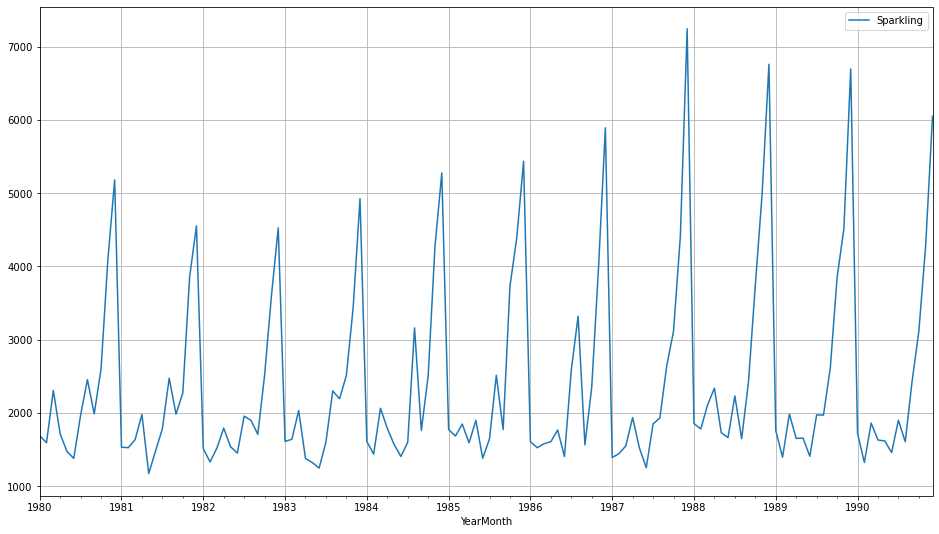

In [269]:
strain.plot(grid=True);

In [270]:
dftest = adfuller(strain,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.062
DF test p-value is 0.5674110388593698
Number of lags used 12


In [271]:
dftest = adfuller(strain.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -7.968
DF test p-value is 8.479210655515348e-11
Number of lags used 11


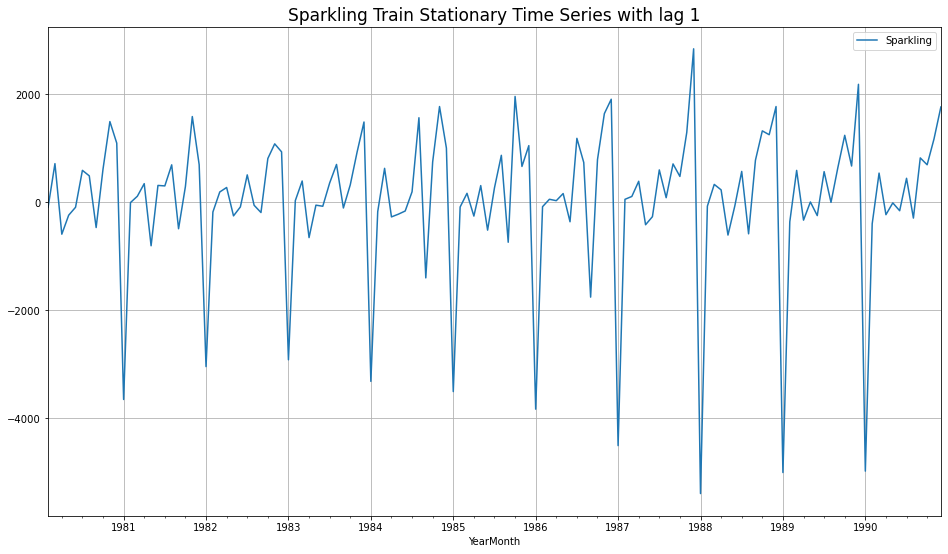

In [272]:
strain.diff().dropna().plot(grid=True);
plt.title('Sparkling Train Stationary Time Series with lag 1', fontsize=17);
plt.savefig('spark_train_stationary.jpg', bbox_inches='tight');

In [273]:
strain.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


# Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC) - SPARKLING

In [274]:

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [275]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [276]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(strain['Sparkling'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.0600155918473
ARIMA(0, 1, 2) - AIC:2234.4083231282916
ARIMA(0, 1, 3) - AIC:2233.9948577460927
ARIMA(1, 1, 0) - AIC:2266.6085393190097


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 1, 1) - AIC:2235.7550946777883
ARIMA(1, 1, 2) - AIC:2234.527200452076
ARIMA(1, 1, 3) - AIC:2235.607834940907
ARIMA(2, 1, 0) - AIC:2260.36574396809
ARIMA(2, 1, 1) - AIC:2233.7776262167617
ARIMA(2, 1, 2) - AIC:2213.509212507062


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:2232.941543704761
ARIMA(3, 1, 0) - AIC:2257.72337899794
ARIMA(3, 1, 1) - AIC:2235.5004349050723


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 2) - AIC:2230.7559699404264
ARIMA(3, 1, 3) - AIC:2221.4645863290034


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [277]:
ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
10  (2, 1, 2)  2213.509213
15  (3, 1, 3)  2221.464586
14  (3, 1, 2)  2230.755970
11  (2, 1, 3)  2232.941544
9   (2, 1, 1)  2233.777626

In [278]:
auto_ARIMA = ARIMA(strain, order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 23 Oct 2022   AIC                           2213.509
Time:                        18:58:34   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.782      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.216      0.0

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


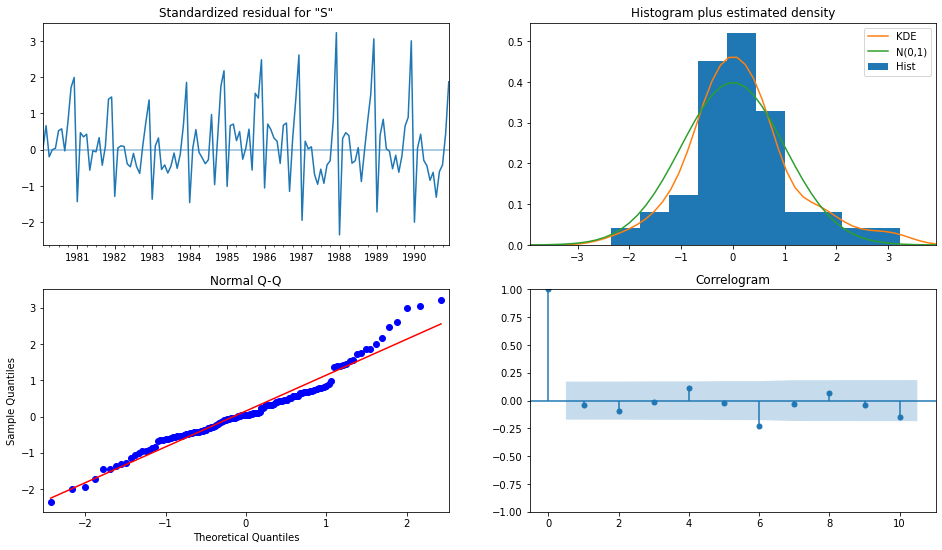

In [279]:
# Diagnostics plot - Sparkling
results_auto_ARIMA.plot_diagnostics();
plt.savefig('spark_arima_diag_plot.jpg', bbox_inches='tight');

# Predict on the Test Set using this model and evaluate the model.

In [280]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(stest))
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(stest['Sparkling'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(stest['Sparkling'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1299.9798316621514 
MAPE: 47.09998228266185


In [281]:
resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(2,1,2)'])

resultsDf.to_csv('spark_arima_auto_212.csv')
resultsDf

RMSE       MAPE
ARIMA(2,1,2)  1299.979832  47.099982

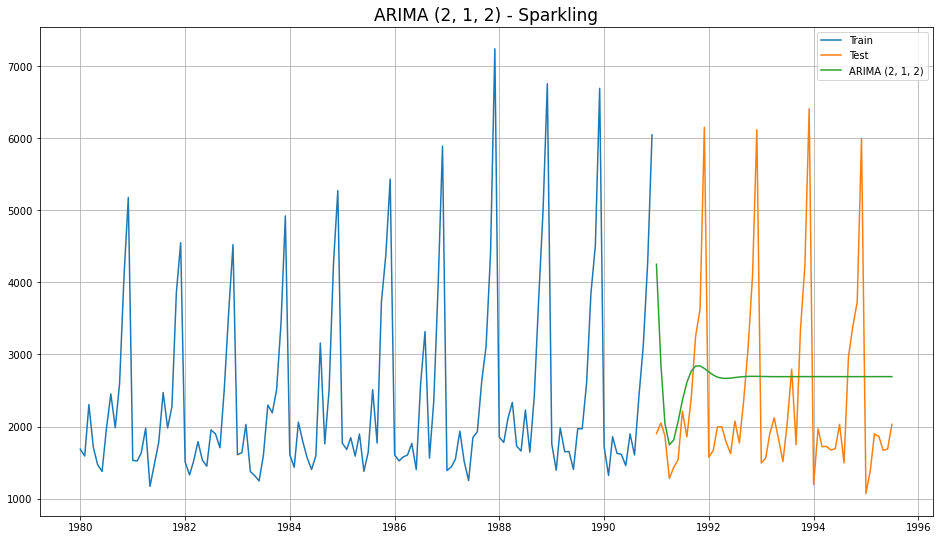

In [282]:
plt.plot(strain, label='Train')
plt.plot(stest, label='Test')
plt.plot(predicted_auto_ARIMA, label='ARIMA (2, 1, 2)')

plt.title('ARIMA (2, 1, 2) - Sparkling', fontsize=17)
plt.grid()
plt.legend(loc='best')

plt.savefig('spark_arima_auto_212.jpg', bbox_inches='tight');

# Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots - SPARKLING

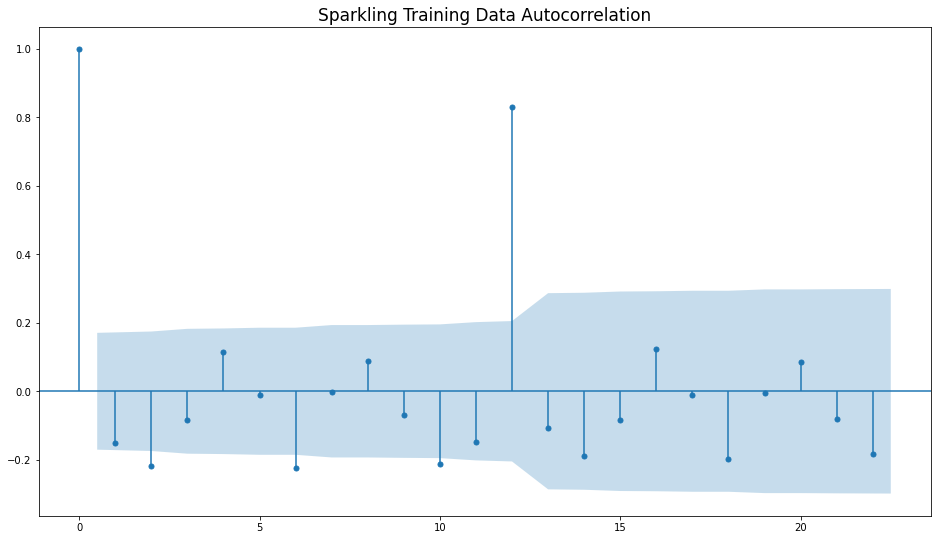

In [283]:
plot_acf(strain.diff(),missing='drop')
plt.title('Sparkling Training Data Autocorrelation', fontsize=17)
plt.savefig('spark_train_acf.jpg', bbox_inches='tight');

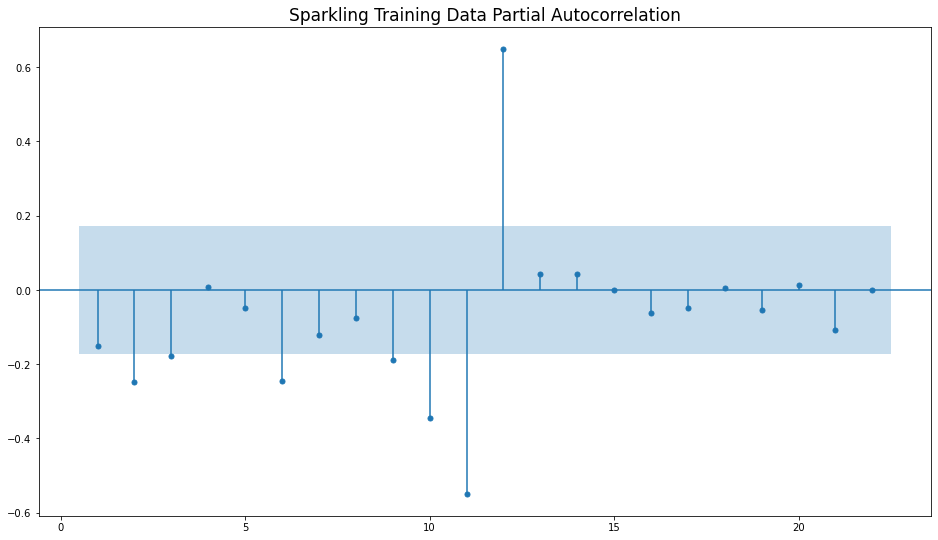

In [284]:
plot_pacf(strain.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.title('Sparkling Training Data Partial Autocorrelation', fontsize=17)
plt.savefig('spark_train_pacf.jpg', bbox_inches='tight');

In [285]:
manual_ARIMA = ARIMA(strain['Sparkling'], order=(0,1,0))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1132.832
Date:                Sun, 23 Oct 2022   AIC                           2267.663
Time:                        19:00:27   BIC                           2270.538
Sample:                    01-01-1980   HQIC                          2268.831
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.885e+06   1.29e+05     14.658      0.000    1.63e+06    2.14e+06
Ljung-Box (L1) (Q):                   3.07   Jarque-Bera (JB):               198.83
Prob(Q):                              0.08   Pr

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


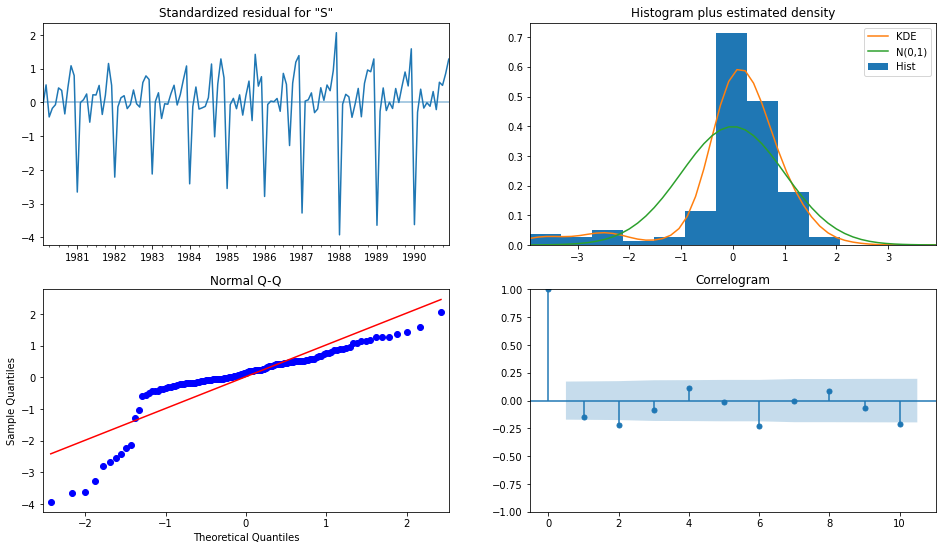

In [286]:
results_manual_ARIMA.plot_diagnostics();

plt.savefig('spark_train_diag_plot.jpg', bbox_inches='tight');

# Predict on the Test Set using this model and evaluate the model.

In [287]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(stest))
rmse = mean_squared_error(stest['Sparkling'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(stest['Sparkling'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 3864.2793518443914 
MAPE: 201.32764950352743


In [288]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(0,1,0)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE        MAPE
ARIMA(2,1,2)  1299.979832   47.099982
ARIMA(0,1,0)  3864.279352  201.327650

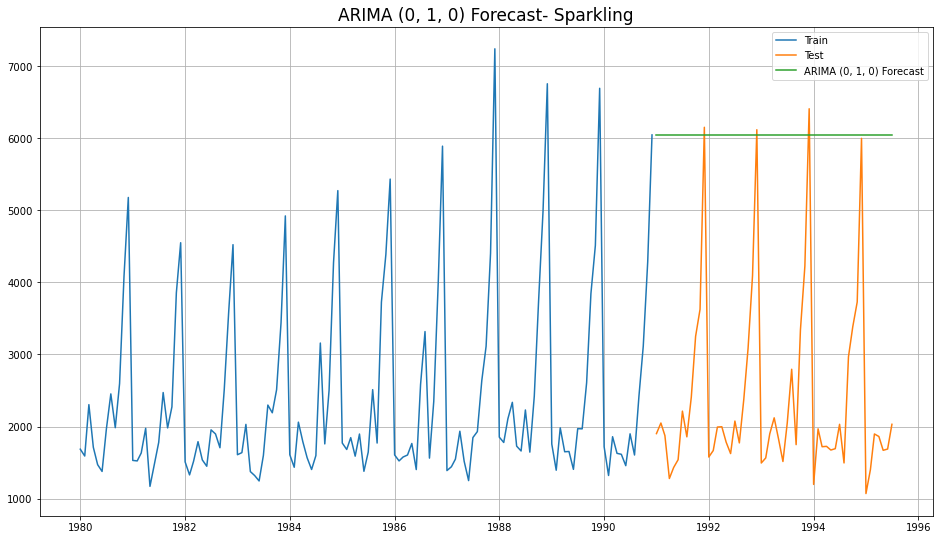

In [289]:
plt.plot(strain, label='Train')
plt.plot(stest, label='Test')
plt.plot(predicted_manual_ARIMA, label='ARIMA (0, 1, 0) Forecast')

plt.grid()
plt.legend(loc='best')
plt.title('ARIMA (0, 1, 0) Forecast- Sparkling', fontsize=17)
plt.savefig('spark_manual_arima_010.jpg', bbox_inches='tight');

# Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC) - SPARKLING

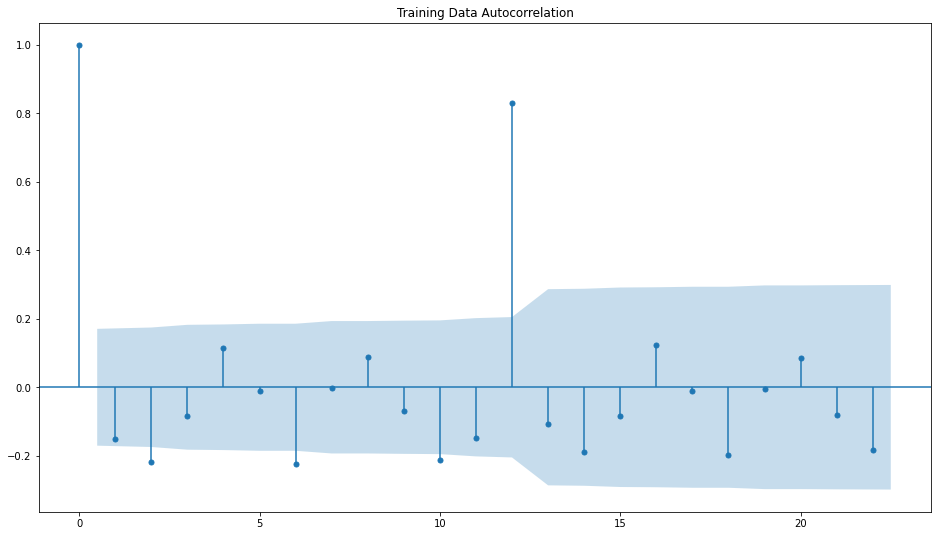

In [290]:
plot_acf(strain.diff(),title='Training Data Autocorrelation',missing='drop');

In [291]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [292]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [293]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(strain['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616845235
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640236896


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:4541.71985308215
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389947
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791317


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:3866.42482202432
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158602903
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920822
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:3469.3362314329474
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:1467.4574095308406
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:1469.1871052625802
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:1471.0594530064593


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3401.2046948185957
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505816
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566528
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089573263777


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:3657.4609603958784
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.179588183879
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193786773
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1509149504238


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:5332.397716600949
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954174845
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.22450939983
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.368373978557


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:1883.116185059604
SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:1428.4607679622252
SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:1428.8727996321545
SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:1429.5889277111414


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:3502.592328084767
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:2187.441010168707
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1887.9128007202899
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:1659.8789890651956


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:4272.722767402049
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1790.0326332315683
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1724.1675070933663
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:1557.1605068342556


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:14.0
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:1603.9654774392318
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:1600.5438843526995
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:1557.1215629357148
SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:6959.273155267065
SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:1428.5993408014717
SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:1429.7448370896211
SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:1430.6883834002172


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:1195.3235148857452
SARIMA(0, 1, 3)x(0, 0, 0, 12) - AIC:2168.092540843538
SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:1873.9770692703794
SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:1643.2973661662552


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:3851.1437111155337
SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:1792.030289546819
SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:1710.6404080980167
SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:1542.741899652006


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:2440.873781827241
SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:1604.5715807562458
SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:1601.0674809803231
SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:1543.048893582172


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:6203.939751931407
SARIMA(0, 1, 3)x(3, 0, 0, 12) - AIC:1429.6529450808544
SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:1441.1435175767676
SARIMA(0, 1, 3)x(3, 0, 2, 12) - AIC:1431.1487402208766


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:983.1644007062547
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:2250.3181267386713
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1954.393833990499
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:1721.2688476355966


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:3904.408758219471
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1811.2440279331133
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1788.5343592675122
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:1616.489440649567
SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:3204.5037166684438
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:1621.6355080129276
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:1617.1356132670003
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:1616.5412067416132


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:2881.695395148944
SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:1440.5134640368008
SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:1442.1719780387818
SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:1443.7660409059968


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:6139.668719155516
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:2204.934049154585
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1907.355897412634
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:1678.098135261452
SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:3746.803701757628
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1775.1424467135735
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1739.5449252259768
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:1571.32488638148


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:5492.816879344624
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:1590.6161606844698
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:1586.3142235098271
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:1571.8069968649509


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:2972.8323893759025
SARIMA(1, 1, 1)x(3, 0, 0, 12) - AIC:1414.9112074251873
SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:1415.9502489021684
SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:1417.0148700295385


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:18.0
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:2188.4633450504216
SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1889.7708307509863
SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:1659.6291421753863


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:4517.0500969417935
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1771.825979916004
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1723.9871793929924
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:1555.5842468858314


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:16.0
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:1588.4216931741164
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:1585.5095942202163
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:1555.9296560208263


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:6458.358401340208
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:1413.8102401041435
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:1414.9135272477536
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:1415.9690464168348


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:20.0
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:2171.026403977542
SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:1869.9381455075804
SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:1646.5176694623046


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:3720.952206023686
SARIMA(1, 1, 3)x(1, 0, 0, 12) - AIC:1772.3921596575767
SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:1711.9554887930037
SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:1542.5744664912588


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:7117.036603660093
SARIMA(1, 1, 3)x(2, 0, 0, 12) - AIC:1590.4174972495641
SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:1587.3668991645725
SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:1543.1292688700091


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:4572.358069712561
SARIMA(1, 1, 3)x(3, 0, 0, 12) - AIC:1415.7723331050736
SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:1416.7509726116207
SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:1417.764936030107
SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:544.7452076271462
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:2227.302761872421
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1946.4383435412847
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:1711.4123039804686


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:3523.8065714830404
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1780.764606605427
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1756.9357349474703
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:1600.9702205127028


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:4137.3269039975585
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:1592.2403464815136
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:1587.6344989882105
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:1585.919173250167


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:3449.3529797977885
SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:1411.9449728031216
SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:1413.1017620344185
SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:1414.1975640846802


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:6906.635181281728
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:2199.858613145455
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1905.0209495422416
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:1675.4234080336116
SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:3170.156144816072
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1792.823429067091
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1740.091125280635
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:1571.9888343444886


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:391.2246551317868
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1577.1235060897595
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1573.159585016411
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1572.342863248568


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:101.68626017398776
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:1402.4673344526677
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:1403.1221304197522
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:1403.8241332864718


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:3123.7547113853298
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:2176.8681146070703
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1892.2372609929569
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:1661.55234337468


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:3580.365971708126
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1757.2140931244946
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1725.6086050916356
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1557.3404027265847


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:18.0
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:1576.0455911409174
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:1573.5476006564168
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:1557.8401256031993


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:20.0
SARIMA(2, 1, 2)x(3, 0, 0, 12) - AIC:1401.4376147034895
SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:1402.5040288748842
SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:1403.4358915292376
SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:22.0
SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:2171.039589060705
SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:1865.0411259067912
SARIMA(2, 1, 3)x(0, 0, 2, 12) - AIC:1646.707279000058
SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:3948.4990245317886
SARIMA(2, 1, 3)x(1, 0, 0, 12) - AIC:1759.0476565902586
SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1707.403326730924
SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:1541.0113285963566


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:2733.3833923416314
SARIMA(2, 1, 3)x(2, 0, 0, 12) - AIC:1577.69224144303
SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:1569.6188952317648
SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:1543.9977324111842


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:6180.793676161844
SARIMA(2, 1, 3)x(3, 0, 0, 12) - AIC:1399.7898509464626
SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:1400.0768192508997
SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:1405.4626305801237


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:1741.569834859173
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:2208.40250139061
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:1946.3686291418867
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:1709.5089923154756


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:3869.025602374233
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:1762.7961104703445
SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:1740.3783848910157
SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:1600.0471971792358
SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:3710.0075040806873
SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:1578.274802556622
SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:1572.9330813899667
SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:1571.680819132589
SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:3461.200584600344
SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:1396.867862062614
SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:1397.677471099457
SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:1398.31732606472
SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:6891.236227066827
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:2188.222098338868
SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:1906.9690712079832
SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:1677.4234051304861


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:3697.971539114504
SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:1746.2222519394813
SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1727.100918765407
SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:1573.684497960215


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:4741.276155325491
SARIMA(3, 1, 1)x(2, 0, 0, 12) - AIC:1564.9377505349075
SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:1576.295662376764
SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:1576.3498169908312


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:20.0
SARIMA(3, 1, 1)x(3, 0, 0, 12) - AIC:1387.7883313210102
SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:1388.6814845064957
SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:1389.1958984373716
SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:7489.444780381966
SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:2187.314727195412
SARIMA(3, 1, 2)x(0, 0, 1, 12) - AIC:1887.780427269425
SARIMA(3, 1, 2)x(0, 0, 2, 12) - AIC:1659.6255089024949


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:3989.581402296179
SARIMA(3, 1, 2)x(1, 0, 0, 12) - AIC:1744.9635867623472
SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:1727.36503813598
SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:1559.436420475598


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:175.6959110999939
SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:1564.2926933093784
SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:1560.719934250606
SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:1559.8053855147411
SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:6963.296729442288
SARIMA(3, 1, 2)x(3, 0, 0, 12) - AIC:1401.9132074891002
SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:1388.602130270044
SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:1389.7021280909835


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:543.2501852860075
SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:2155.774954204699
SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:1876.931113837484
SARIMA(3, 1, 3)x(0, 0, 2, 12) - AIC:1643.7829909676261


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:20.0
SARIMA(3, 1, 3)x(1, 0, 0, 12) - AIC:1749.2988339426847
SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1709.2989368671658
SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:1544.3935656815777


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:6879.263941460721
SARIMA(3, 1, 3)x(2, 0, 0, 12) - AIC:1567.1763980388232
SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:1565.5165867339656
SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:1545.7745020530115


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:24.0
SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:1387.4970163606736
SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:1390.5359988134544
SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:1391.73021973475


C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:2711.7295045618544


In [295]:
SARIMA_AIC.sort_values(by=['AIC']).head(40)

param       seasonal          AIC
39   (0, 1, 2)  (1, 0, 3, 12)    14.000000
103  (1, 1, 2)  (1, 0, 3, 12)    16.000000
167  (2, 1, 2)  (1, 0, 3, 12)    18.000000
95   (1, 1, 1)  (3, 0, 3, 12)    18.000000
171  (2, 1, 2)  (2, 0, 3, 12)    20.000000
219  (3, 1, 1)  (2, 0, 3, 12)    20.000000
111  (1, 1, 2)  (3, 0, 3, 12)    20.000000
243  (3, 1, 3)  (0, 0, 3, 12)    20.000000
175  (2, 1, 2)  (3, 0, 3, 12)    22.000000
251  (3, 1, 3)  (2, 0, 3, 12)    24.000000
155  (2, 1, 1)  (2, 0, 3, 12)   101.686260
231  (3, 1, 2)  (1, 0, 3, 12)   175.695911
151  (2, 1, 1)  (1, 0, 3, 12)   391.224655
239  (3, 1, 2)  (3, 0, 3, 12)   543.250185
127  (1, 1, 3)  (3, 0, 3, 12)   544.745208
63   (0, 1, 3)  (3, 0, 3, 12)   983.164401
47   (0, 1, 2)  (3, 0, 3, 12)  1195.323515
252  (3, 1, 3)  (3, 0, 0, 12)  1387.497016
220  (3, 1, 1)  (3, 0, 0, 12)  1387.788331
237  (3, 1, 2)  (3, 0, 1, 12)  1388.602130
221  (3, 1, 1)  (3, 0, 1, 12)  1388.681485
222  (3, 1, 1)  (3, 0, 2, 12)  1389.195898
238  (3, 1, 2)  (3, 0, 2, 12)  1389.702128
253  (3, 1, 3)  (3, 0, 1, 12)  1390.535999
254  (3, 1, 3)  (3, 0, 2, 12)  1391.730220
204  (3, 1, 0)  (3, 0, 0, 12)  1396.867862
205  (3, 1, 0)  (3, 0, 1, 12)  1397.677471
206  (3, 1, 0)  (3, 0, 2, 12)  1398.317326
188  (2, 1, 3)  (3, 0, 0, 12)  1399.789851
189  (2, 1, 3)  (3, 0, 1, 12)  1400.076819
172  (2, 1, 2)  (3, 0, 0, 12)  1401.437615
236  (3, 1, 2)  (3, 0, 0, 12)  1401.913207
156  (2, 1, 1)  (3, 0, 0, 12)  1402.467334
173  (2, 1, 2)  (3, 0, 1, 12)  1402.504029
157  (2, 1, 1)  (3, 0, 1, 12)  1403.122130
174  (2, 1, 2)  (3, 0, 2, 12)  1403.435892
158  (2, 1, 1)  (3, 0, 2, 12)  1403.824133
190  (2, 1, 3)  (3, 0, 2, 12)  1405.462631
140  (2, 1, 0)  (3, 0, 0, 12)  1411.944973
141  (2, 1, 0)  (3, 0, 1, 12)  1413.101762

In [296]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(strain['Sparkling'],
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                      SARIMAX Results                                      
Dep. Variable:                           Sparkling   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [], 12)   Log Likelihood                -685.894
Date:                             Sun, 23 Oct 2022   AIC                           1387.788
Time:                                     19:27:31   BIC                           1407.963
Sample:                                 01-01-1980   HQIC                          1395.931
                                      - 12-01-1990                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1615      0.150      1.075      0.282      -0.133       0.456
ar.L2         -0.0928      

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


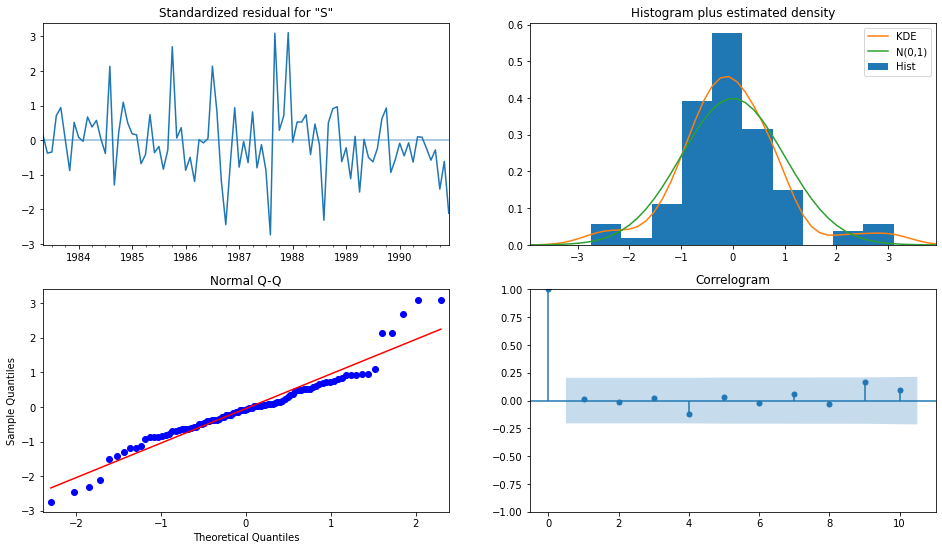

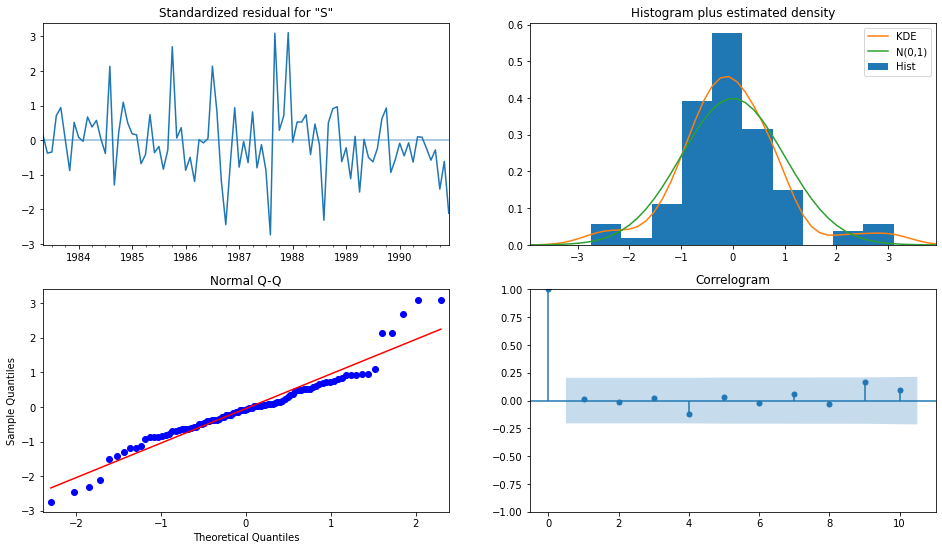

In [297]:
results_auto_SARIMA.plot_diagnostics()
plt.savefig('spark_sarima00312_diag_plot.jpg', bbox_inches='tight');
plt.show()

# Predict on the Test Set using this model and evaluate the model.

In [298]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(stest))
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  1389.351362  415.861168     574.278450    2204.424275
1991-02-01  1224.661040  427.865035     386.060981    2063.261099
1991-03-01  1673.327050  428.009616     834.443617    2512.210482
1991-04-01  1533.301075  432.773571     685.080462    2381.521688
1991-05-01  1425.945962  435.887408     571.622341    2280.269583

In [299]:
rmse = mean_squared_error(stest['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(stest['Sparkling'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 601.2496431773062 
MAPE: 25.870988482997586


In [300]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(3,1,1)(3,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE        MAPE
ARIMA(2,1,2)             1299.979832   47.099982
ARIMA(0,1,0)             3864.279352  201.327650
SARIMA(3,1,1)(3,0,2,12)   601.249643   25.870988

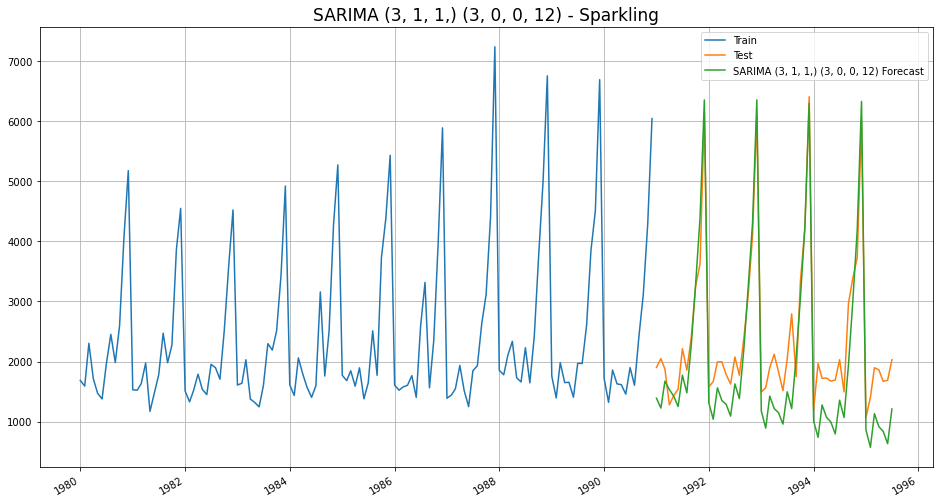

In [301]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')
# plt.plot(predicted_auto_SARIMA,label='SARIMA(3, 1, 1)(3, 0, 2, 12)')
# predicted_auto_SARIMA.plot(label='SARIMA(3, 1, 1)(3, 0, 2, 12)')
predicted_auto_SARIMA.predicted_mean.plot(label='SARIMA (3, 1, 1,) (3, 0, 0, 12) Forecast')


plt.legend(loc='best')
plt.grid()
plt.title('SARIMA (3, 1, 1,) (3, 0, 0, 12) - Sparkling', fontsize=17);

plt.savefig('spark_sarima_auto_30012.jpg', bbox_inches='tight');

# Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 12 - SPARKLING

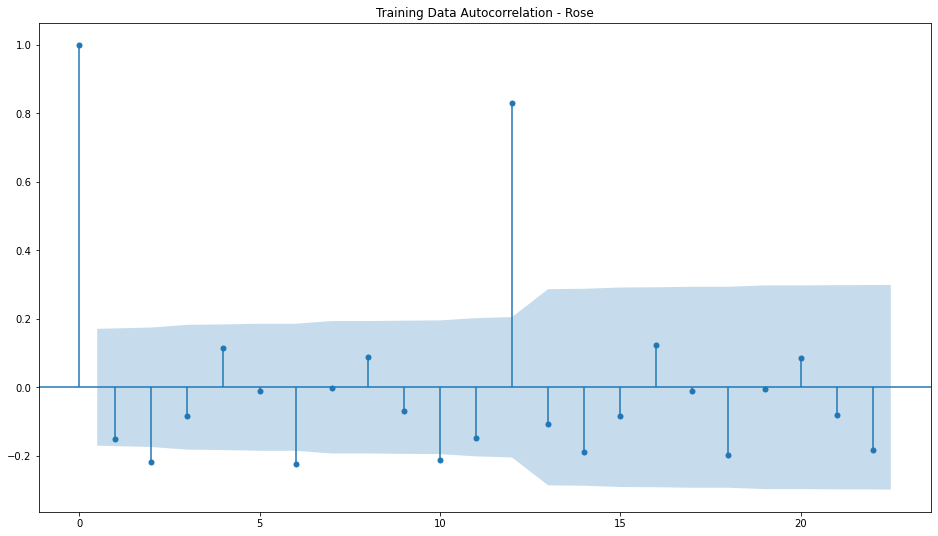

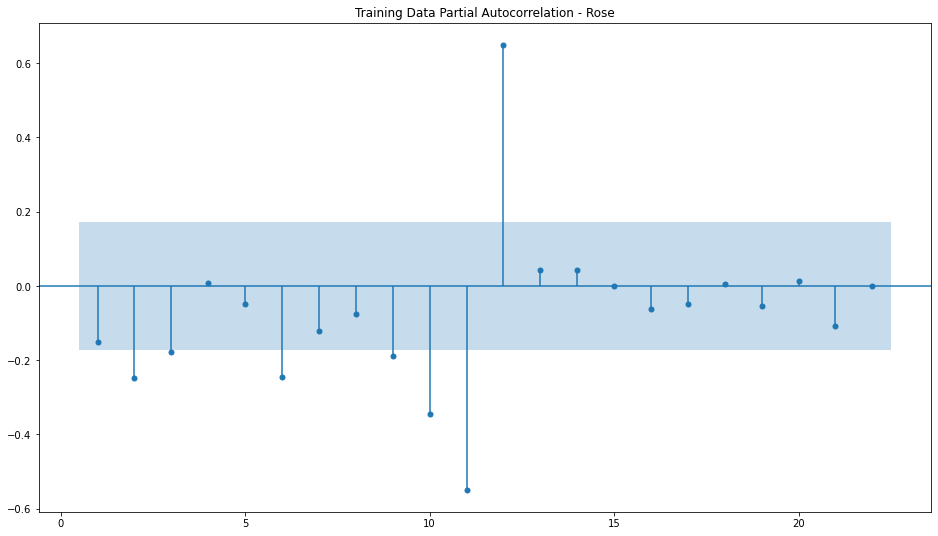

In [302]:
plot_acf(strain.diff(),title='Training Data Autocorrelation - Rose',missing='drop')
plot_pacf(strain.diff().dropna(),title='Training Data Partial Autocorrelation - Rose',zero=False,method='ywmle');

In [303]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(strain['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                      SARIMAX Results                                       
Dep. Variable:                            Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -811.162
Date:                              Sun, 23 Oct 2022   AIC                           1628.324
Time:                                      19:28:01   BIC                           1636.315
Sample:                                  01-01-1980   HQIC                          1631.563
                                       - 12-01-1990                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.1482      0.223      0.664      0.507      -0.289       0.586
ma.S.L12      -0.57

In [304]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(strain['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA1 = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA1.summary())

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                        SARIMAX Results                                        
Dep. Variable:                               Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(2, 1, [1, 2], 12)   Log Likelihood                -722.996
Date:                                 Sun, 23 Oct 2022   AIC                           1455.991
Time:                                         19:28:06   BIC                           1468.708
Sample:                                     01-01-1980   HQIC                          1461.128
                                          - 12-01-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.2445      0.879     -0.278      0.781      -1.967       1

In [305]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(strain['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(3, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA2 = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA2.summary())

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                        SARIMAX Results                                        
Dep. Variable:                               Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(3, 1, [1, 2], 12)   Log Likelihood                -638.304
Date:                                 Sun, 23 Oct 2022   AIC                           1288.607
Time:                                         19:28:14   BIC                           1303.120
Sample:                                     01-01-1980   HQIC                          1294.438
                                          - 12-01-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -1.0545      0.201     -5.254      0.000      -1.448      -0

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


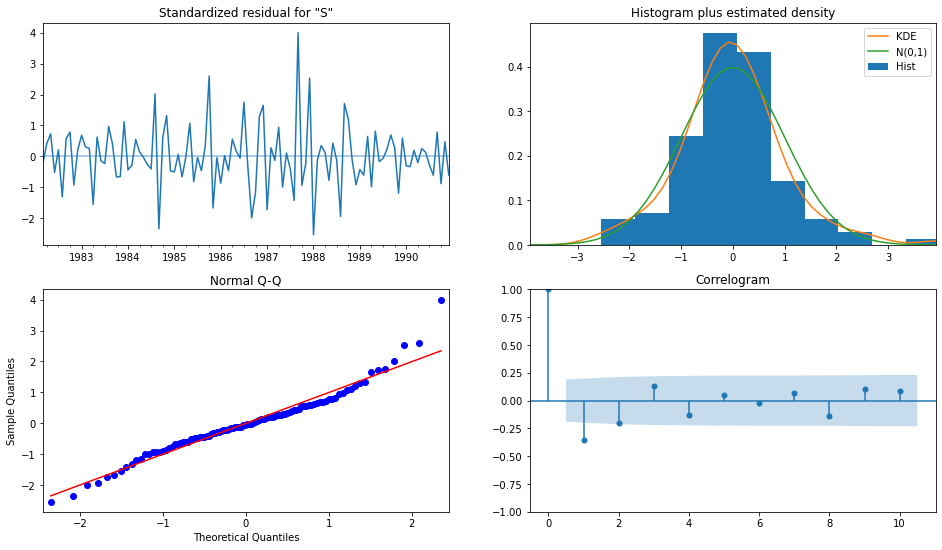

In [306]:
results_manual_SARIMA.plot_diagnostics()
plt.savefig('spark_sarima_11112.jpg', bbox_inches='tight');

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


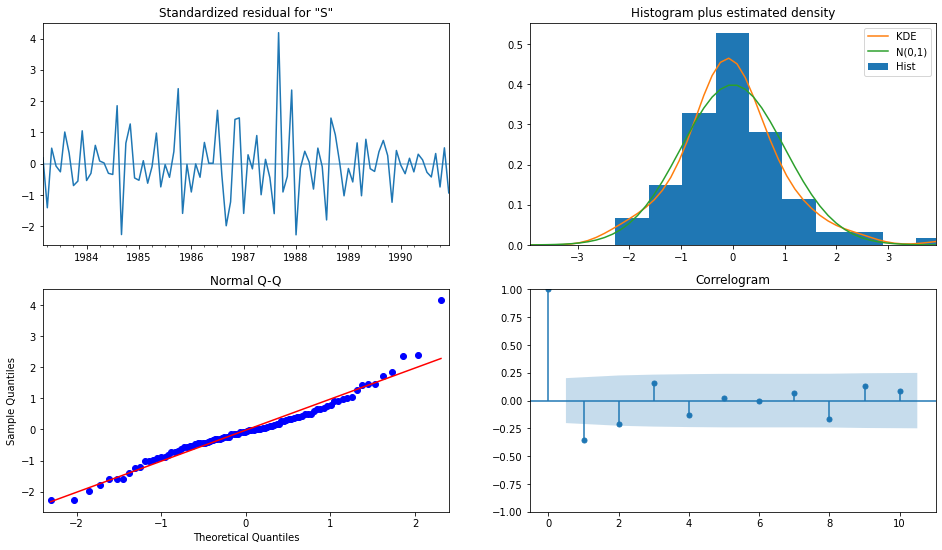

In [307]:
results_manual_SARIMA1.plot_diagnostics()
plt.savefig('spark_sarima_21212.jpg', bbox_inches='tight');

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


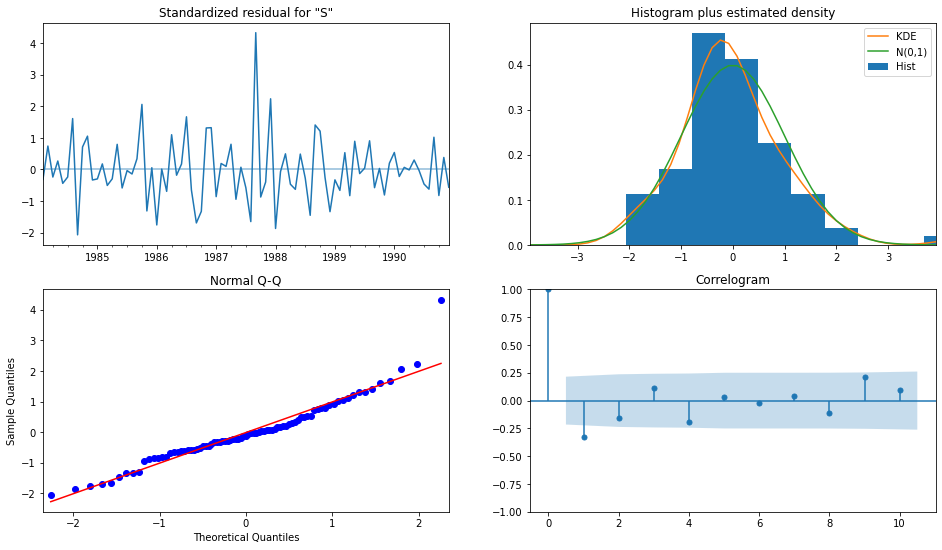

In [308]:
results_manual_SARIMA2.plot_diagnostics()
plt.savefig('spark_sarima_31212.jpg', bbox_inches='tight');

# Predict on the Test Set using this model and evaluate the model.

In [309]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(stest))
                                                             
predicted_manual_SARIMA1 = results_manual_SARIMA1.get_forecast(steps=len(stest))

predicted_manual_SARIMA2 = results_manual_SARIMA2.get_forecast(steps=len(stest))
rmse = mean_squared_error(stest['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(stest['Sparkling'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1189.8357649056368 
MAPE: 54.872534814659026


In [310]:
rmse1 = mean_squared_error(stest['Sparkling'],predicted_manual_SARIMA1.predicted_mean,squared=False)
mape1 = mean_absolute_percentage_error(stest['Sparkling'],predicted_manual_SARIMA1.predicted_mean)
print('RMSE:',rmse1,'\nMAPE:',mape1)

RMSE: 1757.7271115031401 
MAPE: 81.78524545897014


In [311]:
rmse2 = mean_squared_error(stest['Sparkling'],predicted_manual_SARIMA2.predicted_mean,squared=False)
mape2 = mean_absolute_percentage_error(stest['Sparkling'],predicted_manual_SARIMA2.predicted_mean)
print('RMSE:',rmse2,'\nMAPE:',mape2)

RMSE: 1551.6452714865118 
MAPE: 71.56614880237682


In [312]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse, rmse1, rmse2],'MAPE':[mape, mape1, mape2]}
                           ,index=['SARIMA(0,1,0)(3,1,2,12)', 'SARIMA(0,1,0)(2,1,2,12)', 'SARIMA(0,1,0)(3,1,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE        MAPE
ARIMA(2,1,2)             1299.979832   47.099982
ARIMA(0,1,0)             3864.279352  201.327650
SARIMA(3,1,1)(3,0,2,12)   601.249643   25.870988
SARIMA(0,1,0)(3,1,2,12)  1189.835765   54.872535
SARIMA(0,1,0)(2,1,2,12)  1757.727112   81.785245
SARIMA(0,1,0)(3,1,2,12)  1551.645271   71.566149

In [313]:
resultsR0 = resultsDf.copy()

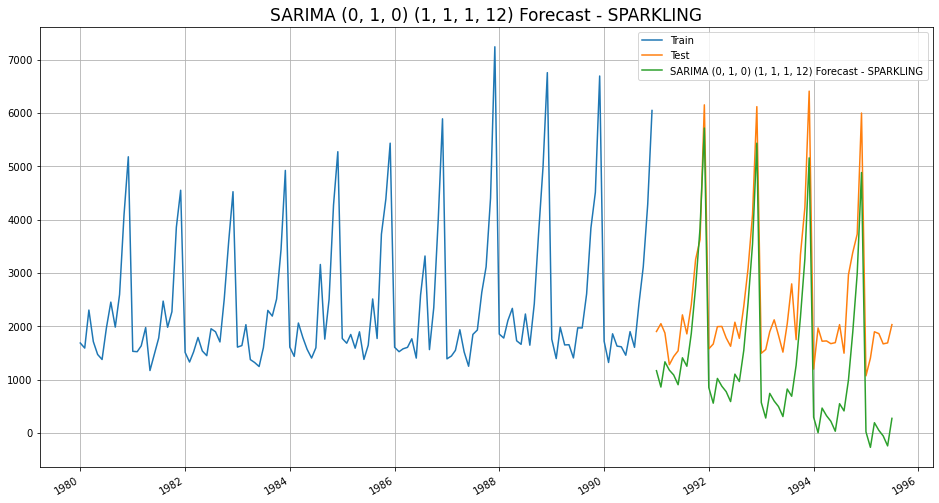

In [314]:
plt.plot(strain, label='Train')
plt.plot(stest, label ='Test')

predicted_manual_SARIMA.predicted_mean.plot(label = 'SARIMA (0, 1, 0) (1, 1, 1, 12) Forecast - SPARKLING')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (0, 1, 0) (1, 1, 1, 12) Forecast - SPARKLING', fontsize=17)
plt.savefig('SPARK_sarima_manual_forecast_11112.jpg', bbox_inches='tight');

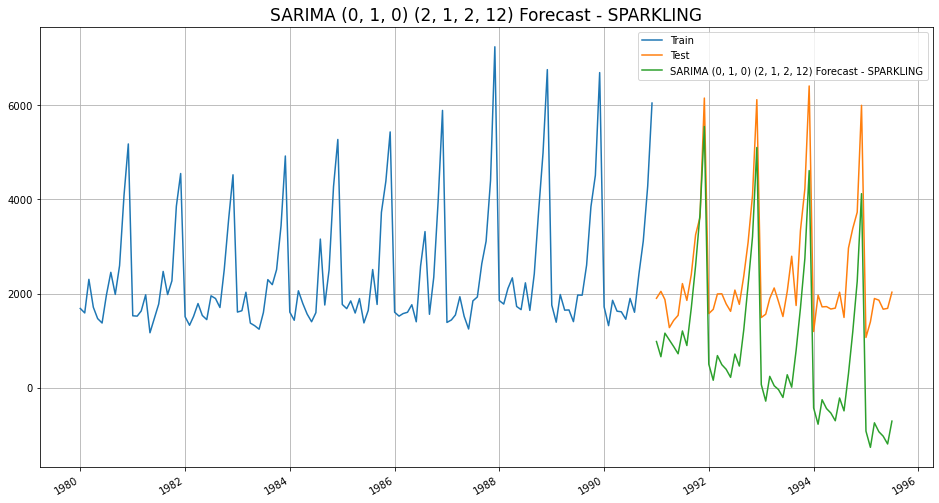

In [315]:
plt.plot(strain, label='Train')
plt.plot(stest, label ='Test')

predicted_manual_SARIMA1.predicted_mean.plot(label = 'SARIMA (0, 1, 0) (2, 1, 2, 12) Forecast - SPARKLING')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (0, 1, 0) (2, 1, 2, 12) Forecast - SPARKLING', fontsize=17)
plt.savefig('spark_sarima_manual_forecast1.jpg', bbox_inches='tight');

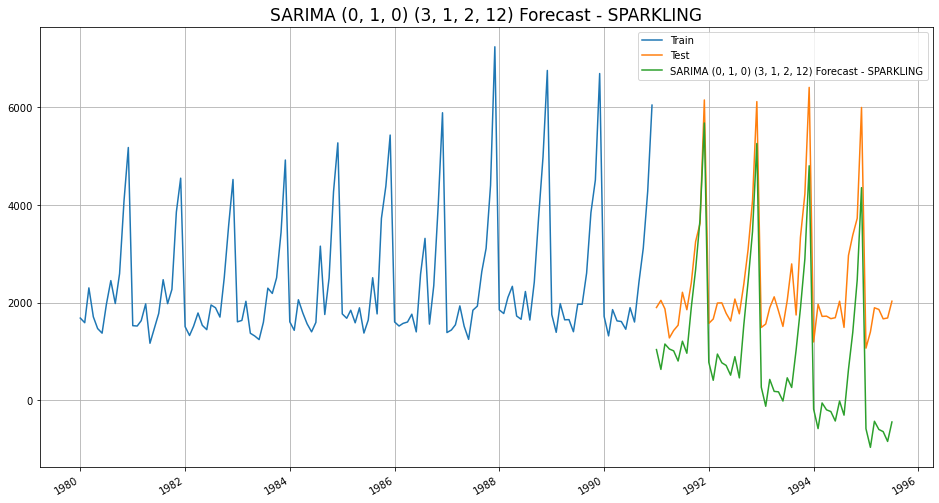

In [316]:
plt.plot(strain, label='Train')
plt.plot(stest, label ='Test')

predicted_manual_SARIMA2.predicted_mean.plot(label = 'SARIMA (0, 1, 0) (3, 1, 2, 12) Forecast - SPARKLING')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (0, 1, 0) (3, 1, 2, 12) Forecast - SPARKLING', fontsize=17)
plt.savefig('spark_sarima_manual_forecast2.jpg', bbox_inches='tight');

# Building the most optimum model on the Full Data.

In [317]:
full_data_model = sm.tsa.statespace.SARIMAX(dfr['Rose'],
                                order=(2,1,2),
                                seasonal_order=(2,1,2,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -587.531
Date:                            Sun, 23 Oct 2022   AIC                           1193.062
Time:                                    19:29:08   BIC                           1219.976
Sample:                                01-01-1980   HQIC                          1203.997
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8649      0.101     -8.558      0.000      -1.063      -0.667
ar.L2          0.0340      0.091   

In [318]:
# Evaluate the model on the whole data and predict 12 months into the future
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  43.083363  12.674064      18.242654      67.924071
1995-09-01  43.341540  12.959890      17.940622      68.742457
1995-10-01  45.826600  12.963893      20.417836      71.235363
1995-11-01  57.396767  13.124588      31.673046      83.120488
1995-12-01  85.074205  13.133423      59.333169     110.815241

In [319]:
rmse = mean_squared_error(dfr['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 35.91129365182572


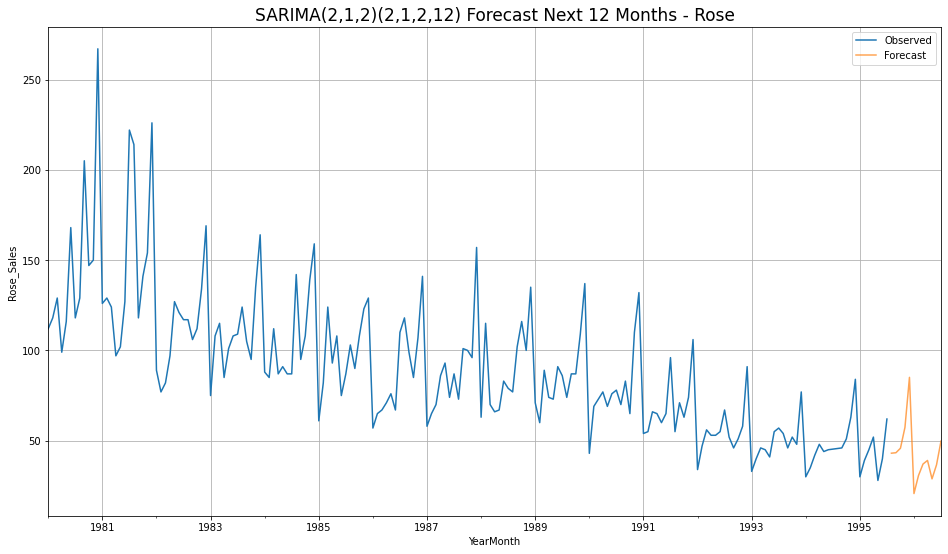

In [320]:
axis = dfr['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('YearMonth')
axis.set_ylabel('Rose_Sales')
plt.legend(loc='best')
plt.grid();
plt.title('SARIMA(2,1,2)(2,1,2,12) Forecast Next 12 Months - Rose', fontsize=17);
plt.savefig('rose_forecast.jpg', bbox_inches='tight');

In [321]:
resultsDf

RMSE        MAPE
ARIMA(2,1,2)             1299.979832   47.099982
ARIMA(0,1,0)             3864.279352  201.327650
SARIMA(3,1,1)(3,0,2,12)   601.249643   25.870988
SARIMA(0,1,0)(3,1,2,12)  1189.835765   54.872535
SARIMA(0,1,0)(2,1,2,12)  1757.727112   81.785245
SARIMA(0,1,0)(3,1,2,12)  1551.645271   71.566149

In [322]:
resultsS0 = resultsDf.copy()

resultsS0.to_csv('spark_all_arima.csv')
results_all_spark = pd.concat([resultsDf14, resultsS0], axis=0)
results_all_spark

Test RMSE Rose  \
RegressionOnTime                                         15.268955   
NaiveModel                                               79.718773   
SimpleAverageModel                                       53.460570   
2pointTrailingMovingAverage                              11.529278   
4pointTrailingMovingAverage                              14.451403   
6pointTrailingMovingAverage                              14.566327   
9pointTrailingMovingAverage                              14.727630   
Simple Exponential Smoothing                             36.796232   
Double Exponential Smoothing                             15.268954   
Triple Exponential Smoothing (Additive Season)           14.260138   
Triple Exponential Smoothing (Multiplicative Se...       20.333400   
Triple Exponential Smoothing (Additive Season, ...       31.288602   
Triple Exponential Smoothing (Multiplicative Se...       26.048381   
ARIMA(2,1,2)                                                   NaN   
ARIMA(0,1,0)                                                   NaN   
SARIMA(3,1,1)(3,0,2,12)                                        NaN   
SARIMA(0,1,0)(3,1,2,12)                                        NaN   
SARIMA(0,1,0)(2,1,2,12)                                        NaN   
SARIMA(0,1,0)(3,1,2,12)                                        NaN   

                                                    Test RMSE Sparkling  \
RegressionOnTime                                            1389.135175   
NaiveModel                                                  3864.279352   
SimpleAverageModel                                          1275.081804   
2pointTrailingMovingAverage                                  813.400684   
4pointTrailingMovingAverage                                 1156.589694   
6pointTrailingMovingAverage                                 1283.927428   
9pointTrailingMovingAverage                                 1346.278315   
Simple Exponential Smoothing                                1338.011528   
Double Exponential Smoothing                                5291.879833   
Triple Exponential Smoothing (Additive Season)               380.094750   
Triple Exponential Smoothing (Multiplicative Se...           402.946854   
Triple Exponential Smoothing (Additive Season, ...           380.094750   
Triple Exponential Smoothing (Multiplicative Se...           352.450680   
ARIMA(2,1,2)                                                        NaN   
ARIMA(0,1,0)                                                        NaN   
SARIMA(3,1,1)(3,0,2,12)                                             NaN   
SARIMA(0,1,0)(3,1,2,12)                                             NaN   
SARIMA(0,1,0)(2,1,2,12)                                             NaN   
SARIMA(0,1,0)(3,1,2,12)                                             NaN   

                                                           RMSE        MAPE  
RegressionOnTime                                            NaN         NaN  
NaiveModel                                                  NaN         NaN  
SimpleAverageModel                                          NaN         NaN  
2pointTrailingMovingAverage                                 NaN         NaN  
4pointTrailingMovingAverage                                 NaN         NaN  
6pointTrailingMovingAverage                                 NaN         NaN  
9pointTrailingMovingAverage                                 NaN         NaN  
Simple Exponential Smoothing                                NaN         NaN  
Double Exponential Smoothing                                NaN         NaN  
Triple Exponential Smoothing (Additive Season)              NaN         NaN  
Triple Exponential Smoothing (Multiplicative Se...          NaN         NaN  
Triple Exponential Smoothing (Additive Season, ...          NaN         NaN  
Triple Exponential Smoothing (Multiplicative Se...          NaN         NaN  
ARIMA(2,1,2)                                        1299.9

In [323]:
results_all_spark.to_csv('results_all_spark.csv')

# Best Model for ROSE with Least RMSE - 2 Pt Moving Average

In [324]:
MovingAverage = dfr.copy()
MovingAverage.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [325]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()

MovingAverage.head()
MovingAverage.tail()

Rose  Trailing_2
YearMonth                    
1980-01-01  112.0         NaN
1980-02-01  118.0       115.0
1980-03-01  129.0       123.5
1980-04-01   99.0       114.0
1980-05-01  116.0       107.5

Rose  Trailing_2
YearMonth                   
1995-03-01  45.0        42.0
1995-04-01  52.0        48.5
1995-05-01  28.0        40.0
1995-06-01  40.0        34.0
1995-07-01  62.0        51.0

In [326]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']


MovingAverage.head()

Rose  Trailing_2
YearMonth                    
1980-01-01  112.0         NaN
1980-02-01  118.0       115.0
1980-03-01  129.0       123.5
1980-04-01   99.0       114.0
1980-05-01  116.0       107.5

In [327]:
import pandas as pd
from datetime import datetime

datelist = pd.date_range(start='08/01/1995', periods=12, freq='MS')
ts = pd.to_datetime(datelist, format="%Y-%m-%d")

ma_forecast = pd.DataFrame(columns=['Rose', 'Trailing_2', 'forecast_12'], index=ts)

MovingAverage = pd.concat([MovingAverage, ma_forecast], axis=0)
MovingAverage['forecast_12'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage.tail()
MovingAverage.shape
MovingAverage.fillna(0)
MovingAverage['Rose'].iloc[0:2]

Rose  Trailing_2  forecast_12
1996-03-01   NaN         NaN          NaN
1996-04-01   NaN         NaN          NaN
1996-05-01   NaN         NaN          NaN
1996-06-01   NaN         NaN          NaN
1996-07-01   NaN         NaN          NaN

(199, 3)

Rose  Trailing_2  forecast_12
1980-01-01  112.0         0.0          0.0
1980-02-01  118.0       115.0        115.0
1980-03-01  129.0       123.5        123.5
1980-04-01   99.0       114.0        114.0
1980-05-01  116.0       107.5        107.5
...           ...         ...          ...
1996-03-01    0.0         0.0          0.0
1996-04-01    0.0         0.0          0.0
1996-05-01    0.0         0.0          0.0
1996-06-01    0.0         0.0          0.0
1996-07-01    0.0         0.0          0.0

[199 rows x 3 columns]

1980-01-01    112.0
1980-02-01    118.0
Name: Rose, dtype: float64

In [328]:
import math
k = 2
yhat = []

for i in range(0,199):
    tmp = 0.0

    tmp = math.fsum(MovingAverage['Rose'].iloc[i:i+2])

    yhat.append(tmp/k)
    
yhat

[115.0,
 123.5,
 114.0,
 107.5,
 142.0,
 143.0,
 123.5,
 167.0,
 176.0,
 148.5,
 208.5,
 196.5,
 127.5,
 126.5,
 110.5,
 99.5,
 114.5,
 174.5,
 218.0,
 166.0,
 129.5,
 147.5,
 190.0,
 157.5,
 83.0,
 79.5,
 89.5,
 112.0,
 124.0,
 119.0,
 117.0,
 111.5,
 109.0,
 123.0,
 151.5,
 122.0,
 91.5,
 111.5,
 100.0,
 93.0,
 104.5,
 108.5,
 116.5,
 114.5,
 100.0,
 115.0,
 149.5,
 126.0,
 86.5,
 98.5,
 99.5,
 89.0,
 89.0,
 87.0,
 114.5,
 118.5,
 101.5,
 123.5,
 149.0,
 110.0,
 71.5,
 103.0,
 108.5,
 100.5,
 91.5,
 81.0,
 95.0,
 96.5,
 99.0,
 115.5,
 126.0,
 93.0,
 61.0,
 66.0,
 69.0,
 73.5,
 71.5,
 88.5,
 114.0,
 108.5,
 92.0,
 96.0,
 124.0,
 99.5,
 61.5,
 67.5,
 78.0,
 89.5,
 83.5,
 80.5,
 80.0,
 87.0,
 100.5,
 98.0,
 126.5,
 110.0,
 89.0,
 92.5,
 68.0,
 66.5,
 75.0,
 81.0,
 78.0,
 89.5,
 109.0,
 108.0,
 117.5,
 103.0,
 65.5,
 74.5,
 81.5,
 73.5,
 82.0,
 88.5,
 80.0,
 80.5,
 87.0,
 98.0,
 123.0,
 90.0,
 56.0,
 71.0,
 75.0,
 73.0,
 72.5,
 77.0,
 74.0,
 76.5,
 74.0,
 87.5,
 121.0,
 93.0,
 54.5,
 60.

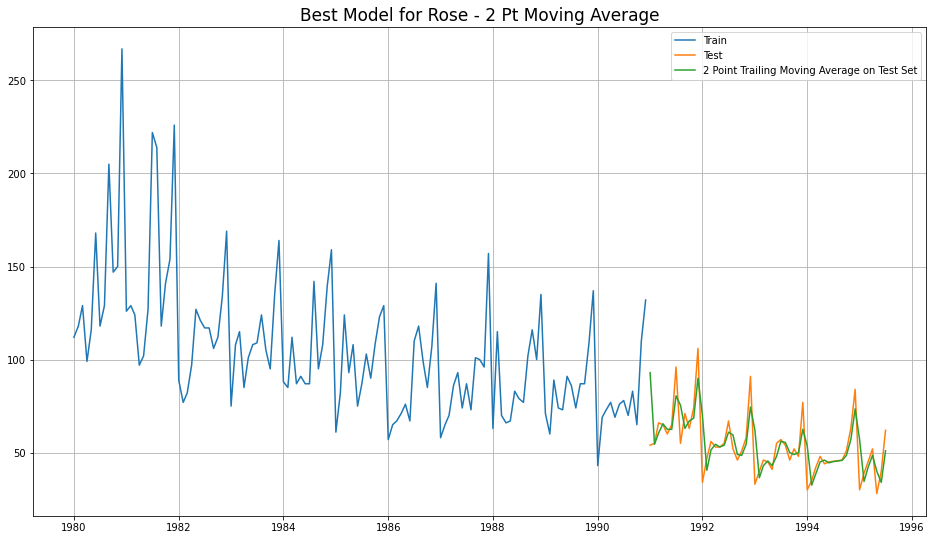

In [329]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,9))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')


plt.legend(loc = 'best')
plt.grid();
plt.title('Best Model for Rose - 2 Pt Moving Average', fontsize=17);
plt.savefig('rose_best_model_2pt.jpg', bbox_inches='tight');

# FORECAST ON NEXT 12 MONTHS - ROSE
# (Using 2 Pt Moving Average Model)

In [332]:
dfr1 = pd.read_csv('Rose.csv', parse_dates=True,index_col='YearMonth')
dfr1.head()
dfr1.tail()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

KeyError: 'forecast'

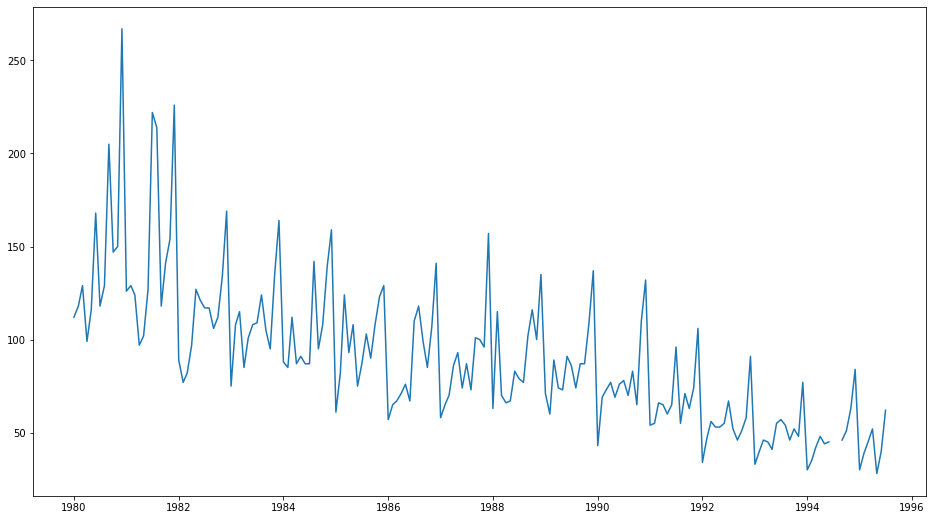

In [333]:
## FORECAST ON NEXT 12 MONTHS

plt.figure(figsize=(16,9))
plt.plot(dfr1['Rose'], label='Full data Rose')
plt.plot(dfr1['forecast'].iloc[-12:], label='Forecast on next 12 months')



plt.legend(loc='best')
plt.grid()
plt.title('Forecast Next 12 Months for Rose - 2 Pt MA', fontsize=17);

plt.savefig('rose_forecast_2ptma.jpg', bbox_inches='tight');

# Holt-Winters - ETS(A, A, M) - Best Model for Sparkling Till Now
# ETS(A, Ad, M) model - Taking MULTIPLICATIVE SEASONALITY
# USING DAMPED TREND

In [334]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(dfs,trend='add',seasonal='multiplicative',initialization_method='estimated', damped_trend=True)
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07568518460157085, 'smoothing_trend': 0.06487724769095442, 'smoothing_seasonal': 0.27376250786438744, 'damping_trend': 0.9899241404564666, 'initial_level': 2356.2634519625017, 'initial_trend': -21.20422020409584, 'initial_seasons': array([0.73541633, 0.70402969, 0.89804334, 0.81857865, 0.68158975,
       0.66890566, 0.89237419, 1.15262151, 0.93743683, 1.28129804,
       1.94859633, 2.5364079 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [336]:
# Forecasting using this model for the duration of the test set
TES_predict_am_damp_spark =  model_TES_am.forecast(steps=12)
TES_predict_am_damp_spark
prediction_1 = TES_predict_am_damp_spark
TES_predict_am_damp_spark.to_csv('spark_forecast_tes.csv')

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1995-08-01    1931.566334
1995-09-01    2351.917332
1995-10-01    3179.768627
1995-11-01    3918.559559
1995-12-01    5986.859892
1996-01-01    1357.527738
1996-02-01    1599.199525
1996-03-01    1830.273910
1996-04-01    1791.009110
1996-05-01    1641.930297
1996-06-01    1556.395413
1996-07-01    1965.838429
Freq: MS, dtype: float64

In [337]:
plt.rcParams["figure.figsize"] = [16,9]
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(model_TES_am.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(model_TES_am.resid,ddof=1)})
pred_1_df.head()

lower_CI   prediction     upper_ci
1995-08-01  1254.014743  1931.566334  2609.117925
1995-09-01  1674.365741  2351.917332  3029.468923
1995-10-01  2502.217035  3179.768627  3857.320218
1995-11-01  3241.007968  3918.559559  4596.111151
1995-12-01  5309.308301  5986.859892  6664.411483

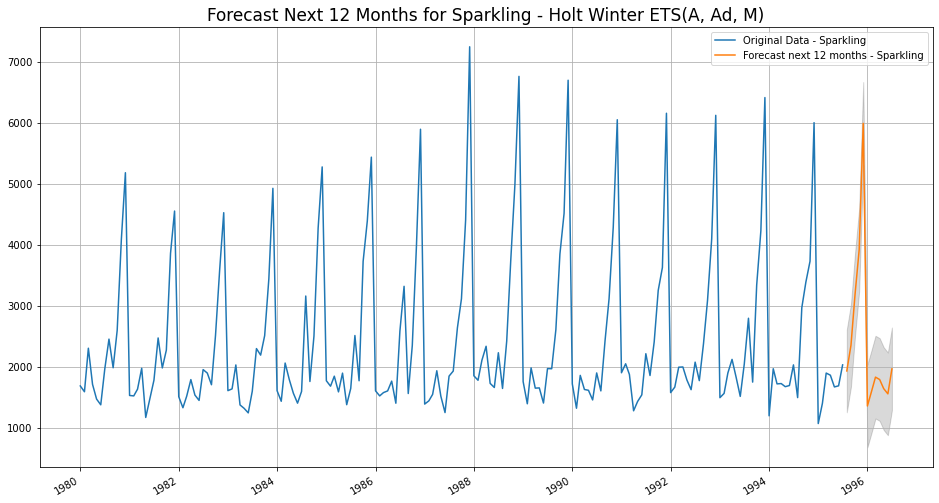

In [338]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(dfs['Sparkling'], label='Original Data - Sparkling')

ax =TES_predict_am_damp_spark.plot(label='Forecast next 12 months - Sparkling')


ax.fill_between(pred_1_df.index,pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)

plt.legend(loc='best')
plt.grid()
plt.title('Forecast Next 12 Months for Sparkling - Holt Winter ETS(A, Ad, M)', fontsize=17);

plt.savefig('spark_forecast_tes.jpg', bbox_inches='tight');

# Building the second most optimum model on ROSE - TES ETS(A, A, A)

In [339]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(dfr,trend='add',seasonal='additive',initialization_method='estimated', damped_trend=False)
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.09489742471113286, 'smoothing_trend': 0.00084071171188382, 'smoothing_seasonal': 0.004784254824653908, 'damping_trend': nan, 'initial_level': 146.08843006517344, 'initial_trend': -0.5399886271643805, 'initial_seasons': array([-27.93698452, -17.16091481,  -9.08998612, -15.7998968 ,
       -11.74655342,  -5.73464088,   5.30210146,   5.32703408,
         2.639575  ,   1.97255957,  17.17527793,  55.89189879]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [340]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES_am.forecast(steps=12)
TES_predict
prediction_1 = TES_predict
TES_predict.to_csv('rose_forecast_tes.csv')

C:\Users\Samsung\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1995-08-01    49.832576
1995-09-01    46.621948
1995-10-01    45.417155
1995-11-01    60.071178
1995-12-01    98.236463
1996-01-01    13.894113
1996-02-01    24.136356
1996-03-01    31.666323
1996-04-01    24.434482
1996-05-01    27.917522
1996-06-01    33.388280
1996-07-01    43.835551
Freq: MS, dtype: float64

In [341]:
plt.rcParams["figure.figsize"] = [16,9]
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(model_TES_am.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(model_TES_am.resid,ddof=1)})
pred_1_df.head()

lower_CI  prediction    upper_ci
1995-08-01  15.034749   49.832576   84.630403
1995-09-01  11.824122   46.621948   81.419775
1995-10-01  10.619329   45.417155   80.214982
1995-11-01  25.273351   60.071178   94.869005
1995-12-01  63.438636   98.236463  133.034289

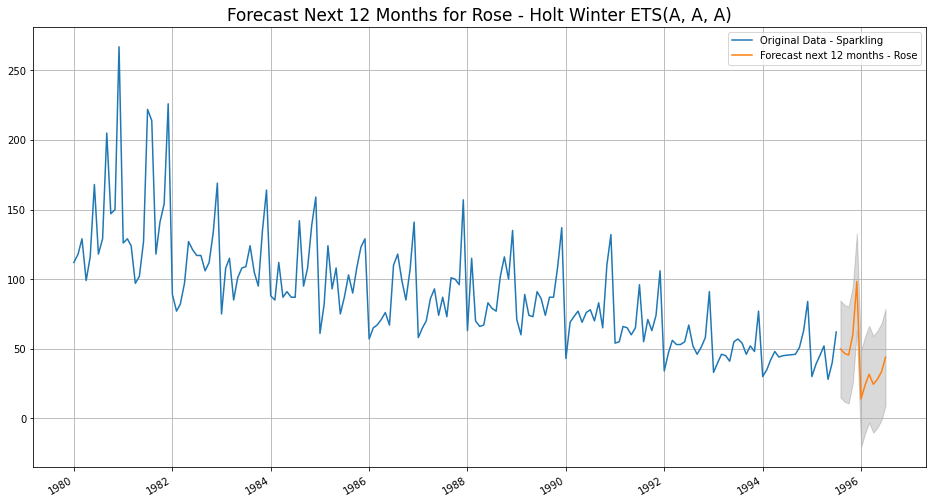

In [342]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(dfr['Rose'], label='Original Data - Sparkling')

ax =TES_predict.plot(label='Forecast next 12 months - Rose')


ax.fill_between(pred_1_df.index,pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)

plt.legend(loc='best')
plt.grid()
plt.title('Forecast Next 12 Months for Rose - Holt Winter ETS(A, A, A)', fontsize=17);

plt.savefig('rose_forecast_tes.jpg', bbox_inches='tight');